In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import datetime as dt

matplotlib.rc('font', family='NanumGothic')
matplotlib.rcParams['axes.unicode_minus'] = False 
pd.options.display.float_format = '{:.2f}'.format
# from tqdm import tqdm
plt.rcParams["figure.figsize"] = (10,10)
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=17) 

from pandas.api.types import is_numeric_dtype, is_integer_dtype, is_float_dtype, is_bool_dtype
from pandas.api.types import is_object_dtype, is_string_dtype, is_categorical_dtype, is_datetime64_dtype

In [250]:
scale = pd.read_csv('SCALE불량.csv', engine = 'python', encoding = 'CP949')
scale.head()
new_scale = pd.read_csv('total_scale.csv', encoding = 'utf-8')

In [3]:
scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PLATE_NO           720 non-null    object 
 1   ROLLING_DATE       720 non-null    object 
 2   SCALE              720 non-null    object 
 3   SPEC               720 non-null    object 
 4   STEEL_KIND         720 non-null    object 
 5   PT_THK             720 non-null    float64
 6   PT_WDTH            720 non-null    int64  
 7   PT_LTH             720 non-null    int64  
 8   PT_WGT             720 non-null    int64  
 9   FUR_NO             720 non-null    object 
 10  FUR_NO_ROW         720 non-null    int64  
 11  FUR_HZ_TEMP        720 non-null    int64  
 12  FUR_HZ_TIME        720 non-null    int64  
 13  FUR_SZ_TEMP        720 non-null    int64  
 14  FUR_SZ_TIME        720 non-null    int64  
 15  FUR_TIME           720 non-null    int64  
 16  FUR_EXTEMP         720 non

##### 잘못된 변수 유형 변경 및 목표변수 값 변경

In [251]:
scale.drop('PLATE_NO', axis =1, inplace =True)
scale.drop('ROLLING_DATE', axis =1, inplace =True)
scale['SCALE'] =scale['SCALE'].apply(lambda x : 1 if x =='불량' else 0)
scale['HSB'] = scale['HSB'].apply(lambda x : 1 if x == '적용' else 0)
scale['FUR_NO_ROW'] = scale['FUR_NO_ROW'].astype('object')
scale['ROLLING_DESCALING'] =scale['ROLLING_DESCALING'].astype('object') 

In [5]:
scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SCALE              720 non-null    int64  
 1   SPEC               720 non-null    object 
 2   STEEL_KIND         720 non-null    object 
 3   PT_THK             720 non-null    float64
 4   PT_WDTH            720 non-null    int64  
 5   PT_LTH             720 non-null    int64  
 6   PT_WGT             720 non-null    int64  
 7   FUR_NO             720 non-null    object 
 8   FUR_NO_ROW         720 non-null    object 
 9   FUR_HZ_TEMP        720 non-null    int64  
 10  FUR_HZ_TIME        720 non-null    int64  
 11  FUR_SZ_TEMP        720 non-null    int64  
 12  FUR_SZ_TIME        720 non-null    int64  
 13  FUR_TIME           720 non-null    int64  
 14  FUR_EXTEMP         720 non-null    int64  
 15  ROLLING_TEMP_T5    720 non-null    int64  
 16  HSB                720 non

### PLATE_NO, ROLLING_DATE 변수는 자재번호와 압연시행 날짜를 말하는 변수이다. 
### 압연시행 날짜는 이전 EDA에서  2008년 8월 1일~2일의 짧은 시계열을 가진 변수로 통계적으로 검증할 Sample의 수가 적기 때문에 제거한다.

## 1. 변수명 확인  

### 순서대로 후판 제조번호, 압연일자, 불량유무, 제품규격, 강종, 두께, 폭, 길이, 중량  

### 가열로호기, 가열로 작업순번, 가열대 온도, 가열대시간, 균열대온도, 균열대시간, 가열로 시간
### 가열대 추출온도, 압연온도, HSB적용여부, 디스케일링 횟수, 작업조 

#### 1-1 관련변수 그룹
#### 생산지시 관련 변수 : 두께, 폭, 길이, 중량  
#### 제품 종류 관련 변수 : 강종, 제품규격
#### 가열로 관련 변수 : 가열로 호기, 가열로 작업 순번 ,추출온도 
#### 가열로 가열대 관련 변수 : 가열대 온도, 가열대 시간
#### 가열로 균열대 관련 변수 : 균열대 온도. 균열대 시간
#### 압연공정 관련 변수 : 압연온도, HSB적용여부, Descaling count
#### 작업자 관련 변수 : 작업조

## 2 EDA 

In [4]:
## 불량
pro = scale[scale['SCALE']== 1]
## 양품
no = scale[scale['SCALE']== 0]
print('불량 갯수 {}'.format(len(pro)))
display(pro.head())
print('양품 갯수 {}'.format(len(no)))
display(no.head())


불량 갯수 0


Empty DataFrame
Columns: [PLATE_NO, ROLLING_DATE, SCALE, SPEC, STEEL_KIND, PT_THK, PT_WDTH, PT_LTH, PT_WGT, FUR_NO, FUR_NO_ROW, FUR_HZ_TEMP, FUR_HZ_TIME, FUR_SZ_TEMP, FUR_SZ_TIME, FUR_TIME, FUR_EXTEMP, ROLLING_TEMP_T5, HSB, ROLLING_DESCALING, WORK_GR]
Index: []

[0 rows x 21 columns]

양품 갯수 0


Empty DataFrame
Columns: [PLATE_NO, ROLLING_DATE, SCALE, SPEC, STEEL_KIND, PT_THK, PT_WDTH, PT_LTH, PT_WGT, FUR_NO, FUR_NO_ROW, FUR_HZ_TEMP, FUR_HZ_TIME, FUR_SZ_TEMP, FUR_SZ_TIME, FUR_TIME, FUR_EXTEMP, ROLLING_TEMP_T5, HSB, ROLLING_DESCALING, WORK_GR]
Index: []

[0 rows x 21 columns]

In [5]:
# 전체적인 불량율 계산을 위한 피보팅
pv_table = scale.groupby('SCALE').size().to_frame(name ='count').reset_index()
pv_table
di_pv = pv_table.pivot_table(index ='SCALE', aggfunc ='sum',margins = True)
di_pv
di_pv['ratio'] = di_pv['count'][1] /di_pv['count']['All']
display(di_pv)

count  ratio
SCALE              
불량       231   0.68
양품       489   0.68
All      720   0.68

In [6]:
new_scale.drop('강판번호', axis =1, inplace =True)
new_scale.drop('작업날짜', axis =1, inplace =True)
new_scale.drop('작업날', axis =1, inplace =True)
new_scale.drop('작업시간', axis =1, inplace =True)
new_scale

SCALE        제품규격  강종    두께     폭     길이     중량   호기  작업순번  가열대온도  가열대시간  \
0        0  AB/EH32-TM  T1 32.25  3707  15109  14180  1호기     1   1144    116   
1        0  AB/EH32-TM  T1 32.25  3707  15109  14180  1호기     2   1144    122   
2        0   NV-E36-TM  T8 33.27  3619  19181  18130  2호기     1   1129    116   
3        0   NV-E36-TM  T8 33.27  3619  19181  18130  2호기     2   1152    125   
4        0  BV-EH36-TM  T8 38.33  3098  13334  12430  3호기     1   1140    134   
..     ...         ...  ..   ...   ...    ...    ...  ...   ...    ...    ...   
715      0      NV-A32  C0 18.11  3260  40586  37620  1호기     1   1174     66   
716      1       NK-KA  C0 20.14  3580  38639  21870  3호기     1   1172     72   
717      0      NV-A32  C0 16.60  3441  43688  19590  2호기     2   1169     65   
718      0        LR-A  C0 18.92  3401  41455  20940  1호기     2   1142     55   
719      0      GL-A32  C0 16.09  3400  54209  69840  3호기     1   1186     82   

     균열대온도  균열대시간  가열로시간  추출온도  압연온도 HSB적용여부  Descaling횟수 WORK_GR  
0     1133     59    282  1133   934      적용            8      2조  
1     1135     53    283  1135   937      적용            8      2조  
2     1121     55    282  1121   889      적용            8      3조  
3     1127     68    316  1127   885      적용            8      3조  
4     1128     48    314  1128   873      적용            8      1조  
..     ...    ...    ...   ...   ...     ...          ...     ...  
715   1160     71    240  1160   965      적용           10      3조  
716   1164     62    245  1164  1005      적용            8      2조  
717   1163     77    247  1163   948      적용           10      4조  
718   1151     86    246  1151   948      적용           10      4조  
719   1169     45    239  1169   957      적용           10      2조  

[720 rows x 19 columns]

In [7]:
new_scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SCALE        720 non-null    int64  
 1   제품규격         720 non-null    object 
 2   강종           720 non-null    object 
 3   두께           720 non-null    float64
 4   폭            720 non-null    int64  
 5   길이           720 non-null    int64  
 6   중량           720 non-null    int64  
 7   호기           720 non-null    object 
 8   작업순번         720 non-null    int64  
 9   가열대온도        720 non-null    int64  
 10  가열대시간        720 non-null    int64  
 11  균열대온도        720 non-null    int64  
 12  균열대시간        720 non-null    int64  
 13  가열로시간        720 non-null    int64  
 14  추출온도         720 non-null    int64  
 15  압연온도         720 non-null    int64  
 16  HSB적용여부      720 non-null    object 
 17  Descaling횟수  720 non-null    int64  
 18  WORK_GR      720 non-null    object 
dtypes: float

### 전체적인 불량율 32 %

In [13]:
def draw_col1(df, steel_kind):
    if steel_kind!= 'All':
        df = df[df['강종']==steel_kind]
    
    numeric_cols = df.select_dtypes(exclude = 'object')
    
    col_sum =len(numeric_cols.columns)
    
    nrows1= (col_sum // 4) + 1
    n = 0
    m = 0
    
    fig, ax = plt.subplots(nrows1 , 4 , figsize = ( 15,15))
    fig.subplots_adjust(top=0.95)
    fig.suptitle('강종 : {} 의 연속변수 확인 '.format(steel_kind))
    for i in numeric_cols.columns:
        pro = numeric_cols[numeric_cols['SCALE']==1]
        no = numeric_cols[numeric_cols['SCALE']==0]
        
#         print(n,m)
        sns.histplot(no[i]  , color = 'blue',label = '양품',ax= ax[n,m])
        sns.histplot(pro[i] , color = 'red',label ='불량' ,ax= ax[n,m])
        ax[n,m].set_xlabel(i)
        ax[n,m].legend(loc ='upper right')
        
        m+=1 
        if m == 4:
            m = 0
            n +=1
        elif n == nrows1:
            break
#     fig.tight_layout() 

In [14]:
    def draw_ot_col(df, col, steel_kind):
        df= df[df['STEEL_KIND'] == steel_kind]
        object_cols = df.select_dtypes('object')
        n1= 0
        m1 = 0
        plt.figure(figsize =(8,5))
        plt.title('강종 : {}'.format(steel_kind))
        sns.countplot(x = col,hue="SCALE", data=df)
        plt.xticks(rotation = 90)
        plt.show()
                

In [15]:
def two_T_test(df, steel_kind):
    df =df[df['강종']== steel_kind]

#### 2 - 강종 별 불량율 확인  --- : 전체 평균 불량율 32.4 %

In [16]:
for i in new_scale.강종.unique():
    sk = new_scale[new_scale['강종']==i ]
    sk1 = sk.SCALE.value_counts().to_frame(name = 'count').T
    if len(sk1.columns) !=2:
        sk1['ratio'] = 'nan'
        print('---강종 : {}--- 제품 수 : {}'.format(i, len(sk)))
        display('불량율 측정불가')
        print()
    else:
        print('---강종 : {}--- 제품 수 : {}'.format(i, len(sk)))
        sk1['ratio'] = (sk1[1]/  (sk1[0]+sk1[1])) * 100
        display('불량율 :', round(sk1['ratio']['count'],3))
        print()
        
    

---강종 : T1--- 제품 수 : 18


'불량율 :'

11.111


---강종 : T8--- 제품 수 : 95


'불량율 :'

5.263


---강종 : T0--- 제품 수 : 16


'불량율 :'

12.5


---강종 : T5--- 제품 수 : 43


'불량율 :'

4.651


---강종 : C0--- 제품 수 : 503


'불량율 :'

42.147


---강종 : C3--- 제품 수 : 7


'불량율 :'

14.286


---강종 : C1--- 제품 수 : 1


'불량율 측정불가'


---강종 : T7--- 제품 수 : 35


'불량율 :'

17.143


---강종 : T3--- 제품 수 : 2


'불량율 측정불가'

#### 2- 강종별 불량율 확인 결과 
#### C0의 불량율이 42.147%로 평균 불량율 32.4% 보다 월등히 높은 것을 확인 할 수 있음
#### 따라서 불량의 상당 수는 C0 강종에서 발생하는 것을 알 수 있다.

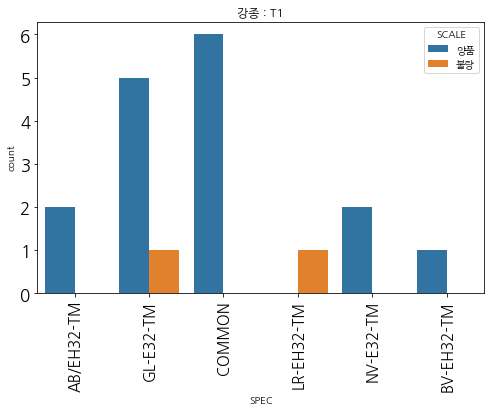

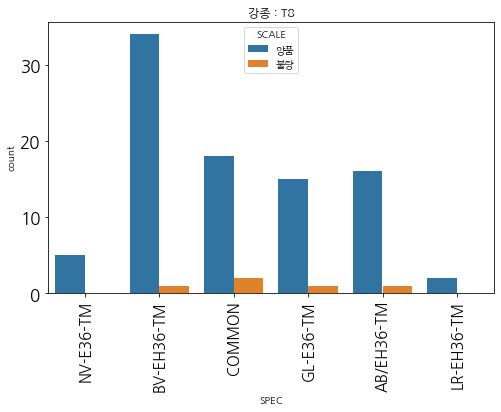

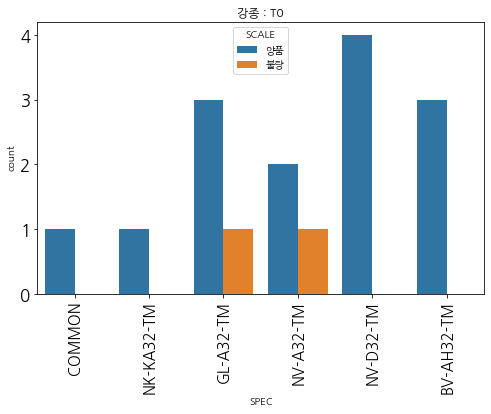

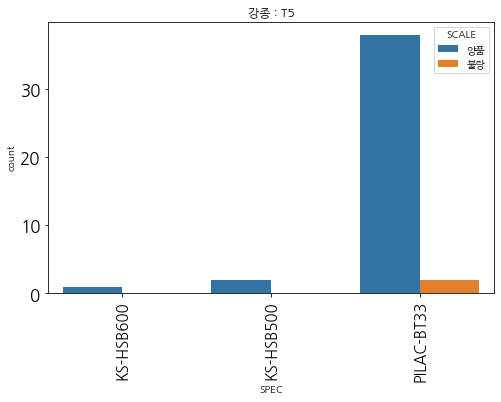

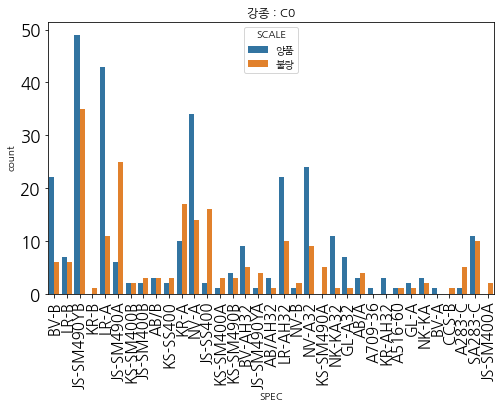

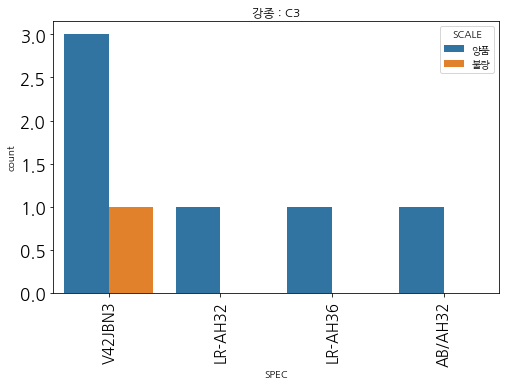

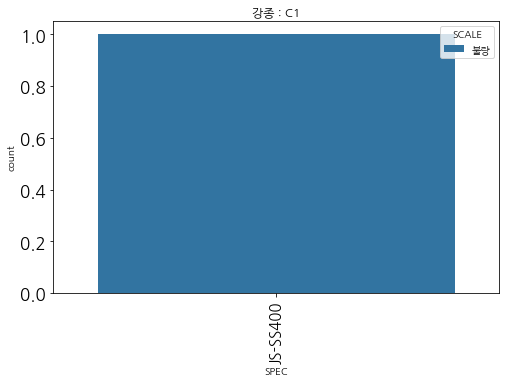

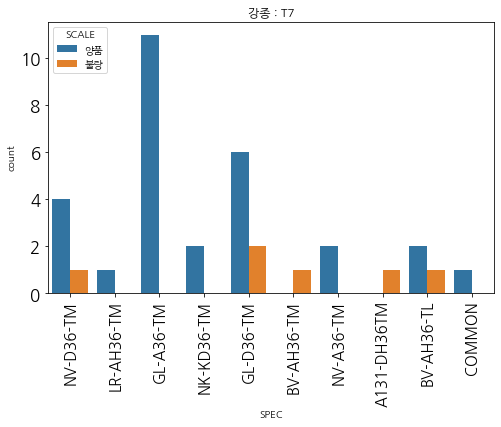

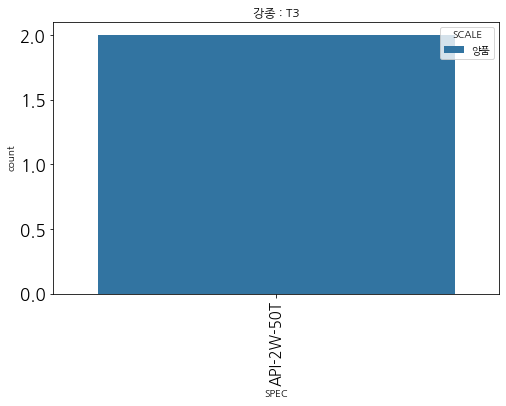

In [12]:
for i in scale['STEEL_KIND'].unique():
    draw_ot_col(scale,'SPEC', i)

#### 강종별로 특정 제품규격에서 불량이 많이 발생하는 것을 알 수있다.

#### 원인분석시 불량판정으로 유효한 변수로 사용할 수 있을 것 같음.

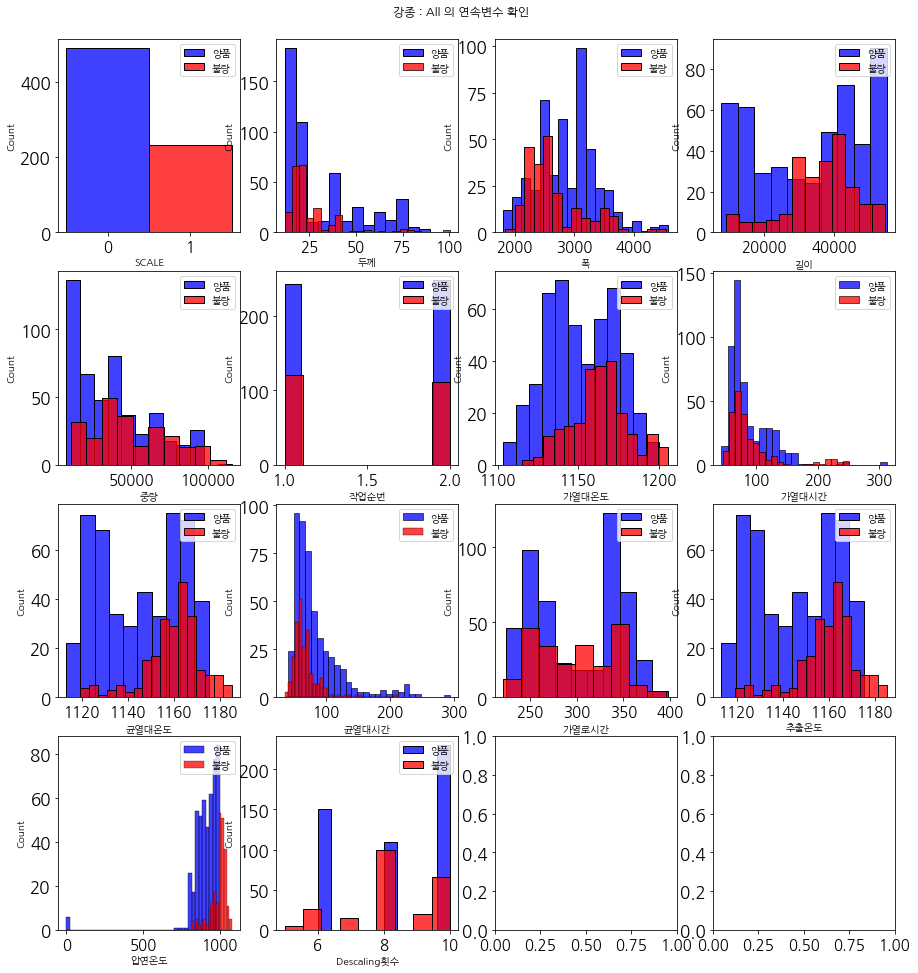

In [17]:
draw_col1(new_scale, 'All')

### 2-1 그룹화 x 전체 연속변수 분포 확인 
#### ------------------------------------------------------------------------------------------------------------------  
PT_TICK  두께 : 지시 두께가 클 수록 불량이 적게 발생하는 경향을 보임

PT_WIDH  폭 : 2000~ 3000mm에서 불량이 많이 발생하는 경향을 보인다.

PT_LETH  플레이트 길이 : 플레이트 길이가 길수록 불량이 많이 발생하는 경향을 보임.

PT_WHIGHT 플레이트 중량 : 중량이 커질수록 불량 %가 증가하는 경향을 보임  

#### ------------------------------------------------------------------------------------------------------------------  

FUR_ROW_NUM : 가열로 작업순서 - 그래프상으로는 불량의 비율이 비슷해보임.

가열로 가열대 온도 : 1160~1180도 구간에서 불량율이 높은 것을 확인 할 수 있다.

가열로 가열대 시간 : 이상치 처럼 보이는 값들이 존재하긴 하지만, 80~100초 사이에서 불량갯수가 확튀는 것을 확인 할 수 있다.

가열로 균열대 온도 : 온도가 증가하면서  불량갯수가 증가하다가 1170도 이후에는 100% 불량을 보인다. 

가열로 균열대 시간 : 시간이 짧은 쪽에서 불량이 발생한다.

가열대 추출온도 : 이 변수는 가열대 균열대 온도와 100% 동일하다. 

-- 가열로 관련 변수들은 가열대, 균열대 둘다 연속공정으로 관련이 있을 확률이 높다.
-- 이 변수들 중 SCALE 불량과 관련된 직관적인 변수를 분석을 통해 추릴 필요가 있다.
#### ----------------------------------------------------------------------------------------------------------------
위의 강종별 불량갯수를 확인 해본 결과 특정 강종에서 특정 제품규격에 불량이 집중되어 있는 것을 확인 할 수 있다.

따라서 강종별로 다시찍어보아야 변수별로 불량과 양품의 차이를 육안으로 명확하게 확인할 수 있을 듯하다 

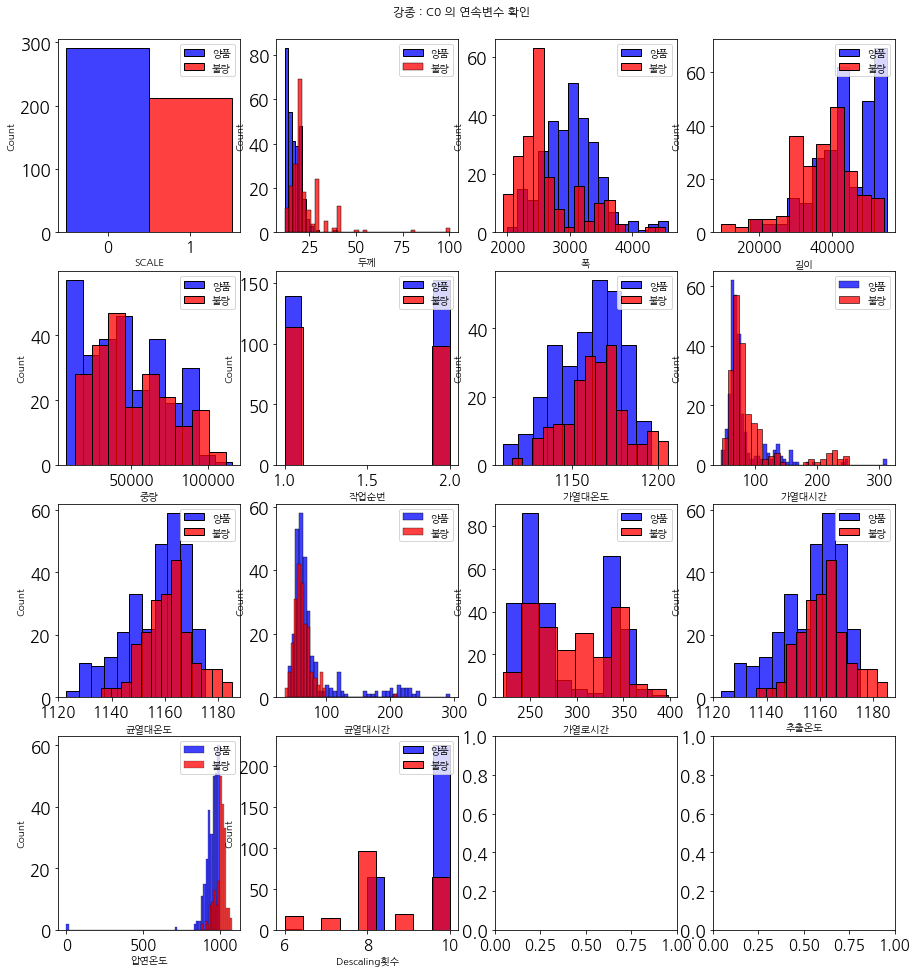

In [18]:
draw_col1(new_scale, 'C0')

C0 강종의 경우 압연온도, 디스케일링 횟수, 추출온도 가열대온도, 균열대 온도변수가 특정 값 이상에서 100% 불량을 보인다.

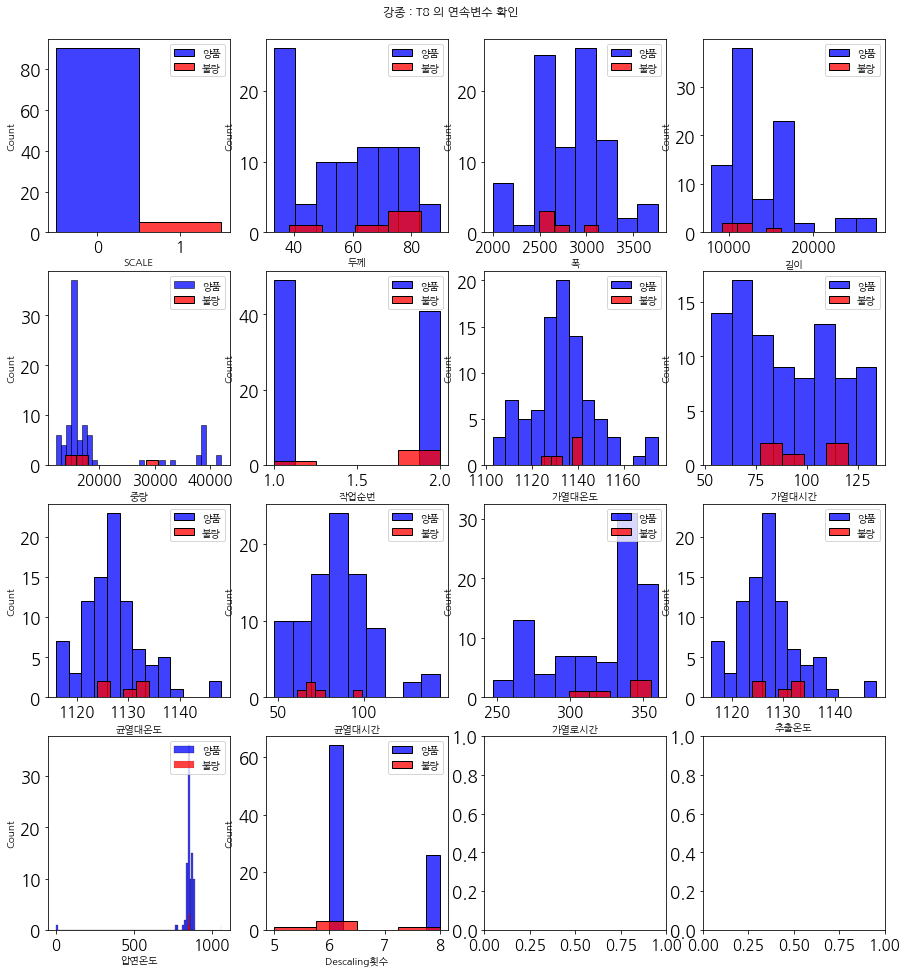

In [19]:
draw_col1(new_scale, 'T8')

T8 강종의 경우 불량의 갯수가 통계적으로 의미가 없을 만큼 수가 적어 명확한 판단이 불가능하다

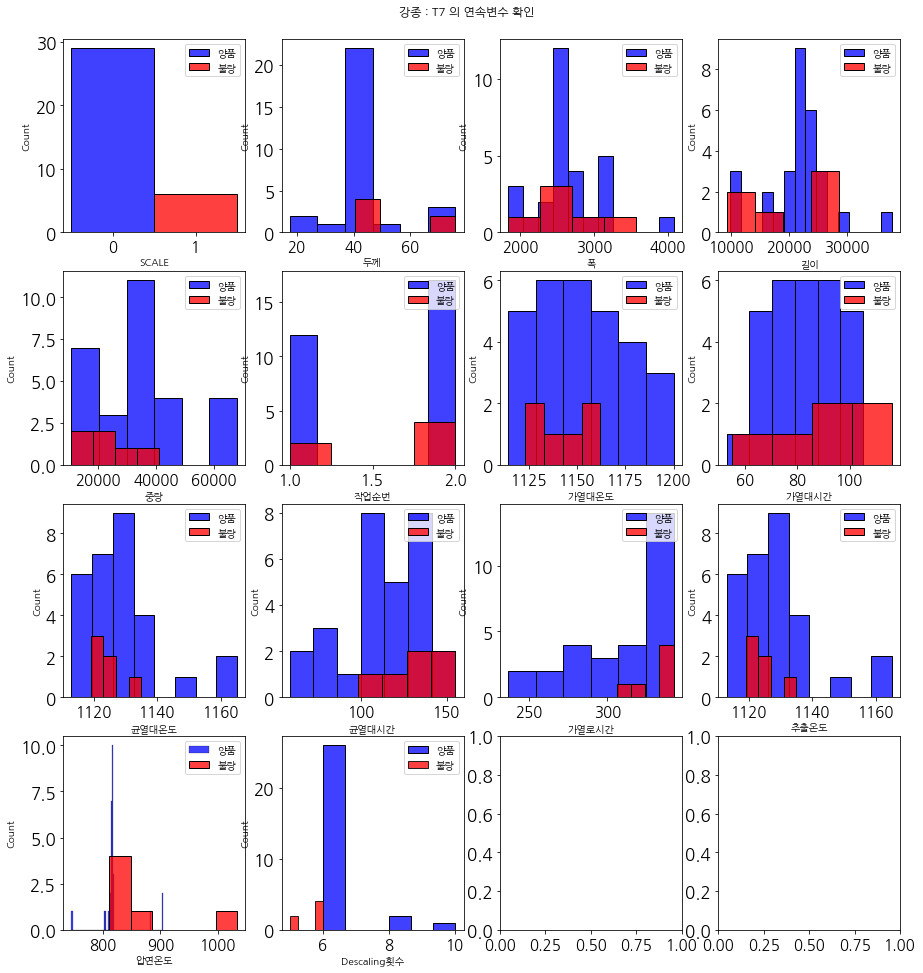

In [20]:
draw_col1(new_scale, 'T7')

T7 강종의 경우 압연온도,  균열대시간, 가열대시간 디스케일링 횟수가 핵심 변수로 보이고, C0강종과 달리 불량에 압연온도를 제외한 다른 온도변수는 크게 영향을 미치는 것 같아 보이진 않는다.  

다만 불량의 수가 적기 때문에 명확한 판단이 어려울 듯하다.

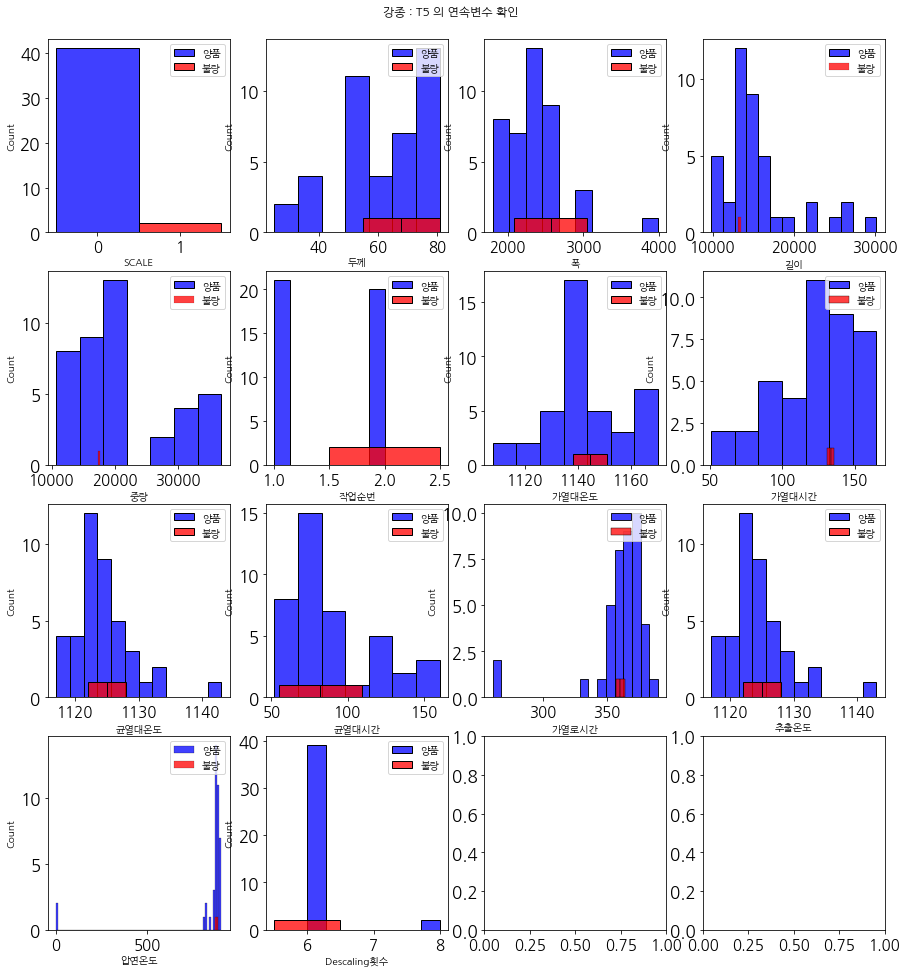

In [21]:
draw_col1(new_scale, 'T5')

T5 강종의 경우 불량의 갯수가 통계적으로 의미가 없을 만큼 수가 적어 명확한 판단이 불가능하다

## 2-2 통계적 검증
### 1. 상관계수를 통한 연관 변수 파악
### 2.양품과 불량품의 연속형 변수 평균값을 2Sample test를 통해 유의한지 검증하겠다.


##### 1. 상관계수를 통한 연관 변수파악

In [22]:
def check_corr(df):
    steel_kind = df['강종'].unique()
    def sk(df, i):
        sk = df[df['강종']== i]
        if len(sk) <10:
            print('데이터 부족')
        else:
            
            print('강종 :  {}  - 변수별 상관계수 '.format(i))
            display(sk.corr())
            print('-------------------------------------------------------------------------------------')
            print()
    

    for i in  steel_kind:
        sk(df, i)
    

In [23]:
check_corr(new_scale)

강종 :  T1  - 변수별 상관계수 


SCALE    두께     폭    길이    중량  작업순번  가열대온도  가열대시간  균열대온도  균열대시간  \
SCALE         1.00 -0.19 -0.03  0.33  0.43 -0.35   0.38   0.07   0.39  -0.23   
두께           -0.19  1.00 -0.43 -0.84 -0.51  0.16  -0.73   0.34  -0.78   0.47   
폭            -0.03 -0.43  1.00 -0.05 -0.12  0.04   0.45   0.20   0.31  -0.72   
길이            0.33 -0.84 -0.05  1.00  0.83 -0.18   0.59  -0.35   0.73  -0.26   
중량            0.43 -0.51 -0.12  0.83  1.00 -0.08   0.47  -0.09   0.58  -0.30   
작업순번         -0.35  0.16  0.04 -0.18 -0.08  1.00   0.11  -0.07   0.05   0.07   
가열대온도         0.38 -0.73  0.45  0.59  0.47  0.11   1.00  -0.24   0.96  -0.36   
가열대시간         0.07  0.34  0.20 -0.35 -0.09 -0.07  -0.24   1.00  -0.34  -0.45   
균열대온도         0.39 -0.78  0.31  0.73  0.58  0.05   0.96  -0.34   1.00  -0.34   
균열대시간        -0.23  0.47 -0.72 -0.26 -0.30  0.07  -0.36  -0.45  -0.34   1.00   
가열로시간        -0.28  0.85 -0.60 -0.70 -0.59  0.05  -0.74   0.18  -0.74   0.65   
추출온도          0.39 -0.78  0.31  0.73  0.58  0.05   0.96  -0.34   1.00  -0.34   
압연온도         -0.41  0.81  0.01 -0.97 -0.86  0.15  -0.69   0.35  -0.81   0.27   
Descaling횟수   0.10 -0.98  0.49  0.81  0.51 -0.11   0.71  -0.27   0.74  -0.52   

             가열로시간  추출온도  압연온도  Descaling횟수  
SCALE        -0.28  0.39 -0.41         0.10  
두께            0.85 -0.78  0.81        -0.98  
폭            -0.60  0.31  0.01         0.49  
길이           -0.70  0.73 -0.97         0.81  
중량           -0.59  0.58 -0.86         0.51  
작업순번          0.05  0.05  0.15        -0.11  
가열대온도        -0.74  0.96 -0.69         0.71  
가열대시간         0.18 -0.34  0.35        -0.27  
균열대온도        -0.74  1.00 -0.81         0.74  
균열대시간         0.65 -0.34  0.27        -0.52  
가열로시간         1.00 -0.74  0.70        -0.89  
추출온도         -0.74  1.00 -0.81         0.74  
압연온도          0.70 -0.81  1.00        -0.77  
Descaling횟수  -0.89  0.74 -0.77         1.00

-------------------------------------------------------------------------------------

강종 :  T8  - 변수별 상관계수 


SCALE    두께     폭    길이    중량  작업순번  가열대온도  가열대시간  균열대온도  균열대시간  \
SCALE         1.00  0.14 -0.09 -0.10 -0.01  0.15   0.05   0.07   0.09  -0.11   
두께            0.14  1.00 -0.45 -0.69 -0.03  0.03  -0.27   0.07  -0.11   0.19   
폭            -0.09 -0.45  1.00 -0.16 -0.21  0.03   0.33   0.03   0.23  -0.11   
길이           -0.10 -0.69 -0.16  1.00  0.50 -0.05  -0.03  -0.04  -0.11  -0.18   
중량           -0.01 -0.03 -0.21  0.50  1.00 -0.04  -0.25   0.08  -0.20  -0.10   
작업순번          0.15  0.03  0.03 -0.05 -0.04  1.00   0.06   0.06   0.07  -0.09   
가열대온도         0.05 -0.27  0.33 -0.03 -0.25  0.06   1.00   0.06   0.79  -0.33   
가열대시간         0.07  0.07  0.03 -0.04  0.08  0.06   0.06   1.00   0.07  -0.69   
균열대온도         0.09 -0.11  0.23 -0.11 -0.20  0.07   0.79   0.07   1.00  -0.29   
균열대시간        -0.11  0.19 -0.11 -0.18 -0.10 -0.09  -0.33  -0.69  -0.29   1.00   
가열로시간         0.08  0.59 -0.32 -0.37  0.14  0.10  -0.39   0.23  -0.17   0.22   
추출온도          0.09 -0.11  0.23 -0.11 -0.20  0.07   0.79   0.07   1.00  -0.29   
압연온도          0.11 -0.15 -0.11  0.13 -0.21 -0.09   0.11  -0.00   0.03  -0.02   
Descaling횟수  -0.09 -0.78  0.50  0.43 -0.24 -0.03   0.41  -0.03   0.18  -0.21   

             가열로시간  추출온도  압연온도  Descaling횟수  
SCALE         0.08  0.09  0.11        -0.09  
두께            0.59 -0.11 -0.15        -0.78  
폭            -0.32  0.23 -0.11         0.50  
길이           -0.37 -0.11  0.13         0.43  
중량            0.14 -0.20 -0.21        -0.24  
작업순번          0.10  0.07 -0.09        -0.03  
가열대온도        -0.39  0.79  0.11         0.41  
가열대시간         0.23  0.07 -0.00        -0.03  
균열대온도        -0.17  1.00  0.03         0.18  
균열대시간         0.22 -0.29 -0.02        -0.21  
가열로시간         1.00 -0.17 -0.18        -0.82  
추출온도         -0.17  1.00  0.03         0.18  
압연온도         -0.18  0.03  1.00         0.24  
Descaling횟수  -0.82  0.18  0.24         1.00

-------------------------------------------------------------------------------------

강종 :  T0  - 변수별 상관계수 


SCALE    두께     폭    길이    중량  작업순번  가열대온도  가열대시간  균열대온도  균열대시간  \
SCALE         1.00 -0.27  0.28  0.17  0.01  0.15   0.38  -0.30   0.46  -0.26   
두께           -0.27  1.00 -0.22 -0.84  0.00 -0.10  -0.13   0.57  -0.54   0.72   
폭             0.28 -0.22  1.00 -0.28 -0.07 -0.14   0.18  -0.40   0.30  -0.13   
길이            0.17 -0.84 -0.28  1.00  0.12  0.25   0.02  -0.43   0.36  -0.57   
중량            0.01  0.00 -0.07  0.12  1.00 -0.05   0.16  -0.13   0.18   0.04   
작업순번          0.15 -0.10 -0.14  0.25 -0.05  1.00  -0.01   0.05  -0.15   0.15   
가열대온도         0.38 -0.13  0.18  0.02  0.16 -0.01   1.00  -0.40   0.81  -0.02   
가열대시간        -0.30  0.57 -0.40 -0.43 -0.13  0.05  -0.40   1.00  -0.56   0.37   
균열대온도         0.46 -0.54  0.30  0.36  0.18 -0.15   0.81  -0.56   1.00  -0.52   
균열대시간        -0.26  0.72 -0.13 -0.57  0.04  0.15  -0.02   0.37  -0.52   1.00   
가열로시간        -0.40  0.78 -0.29 -0.64 -0.12 -0.05  -0.55   0.81  -0.83   0.64   
추출온도          0.46 -0.54  0.30  0.36  0.18 -0.15   0.81  -0.56   1.00  -0.52   
압연온도          0.07 -0.14  0.11  0.13 -0.06  0.20   0.30  -0.18   0.26   0.12   
Descaling횟수   0.03 -0.92  0.24  0.73 -0.29  0.05   0.03  -0.52   0.43  -0.66   

             가열로시간  추출온도  압연온도  Descaling횟수  
SCALE        -0.40  0.46  0.07         0.03  
두께            0.78 -0.54 -0.14        -0.92  
폭            -0.29  0.30  0.11         0.24  
길이           -0.64  0.36  0.13         0.73  
중량           -0.12  0.18 -0.06        -0.29  
작업순번         -0.05 -0.15  0.20         0.05  
가열대온도        -0.55  0.81  0.30         0.03  
가열대시간         0.81 -0.56 -0.18        -0.52  
균열대온도        -0.83  1.00  0.26         0.43  
균열대시간         0.64 -0.52  0.12        -0.66  
가열로시간         1.00 -0.83 -0.39        -0.69  
추출온도         -0.83  1.00  0.26         0.43  
압연온도         -0.39  0.26  1.00         0.18  
Descaling횟수  -0.69  0.43  0.18         1.00

-------------------------------------------------------------------------------------

강종 :  T5  - 변수별 상관계수 


SCALE    두께     폭    길이    중량  작업순번  가열대온도  가열대시간  균열대온도  균열대시간  \
SCALE         1.00  0.10  0.13 -0.11 -0.11  0.22   0.02   0.08   0.02  -0.06   
두께            0.10  1.00 -0.15 -0.59 -0.42 -0.02  -0.55   0.34  -0.38  -0.54   
폭             0.13 -0.15  1.00 -0.39  0.05 -0.21  -0.17   0.10  -0.08   0.14   
길이           -0.11 -0.59 -0.39  1.00  0.66  0.10   0.23  -0.41   0.48   0.11   
중량           -0.11 -0.42  0.05  0.66  1.00  0.11   0.05  -0.27   0.14   0.28   
작업순번          0.22 -0.02 -0.21  0.10  0.11  1.00   0.26   0.02   0.17   0.23   
가열대온도         0.02 -0.55 -0.17  0.23  0.05  0.26   1.00  -0.05   0.23   0.62   
가열대시간         0.08  0.34  0.10 -0.41 -0.27  0.02  -0.05   1.00  -0.23  -0.21   
균열대온도         0.02 -0.38 -0.08  0.48  0.14  0.17   0.23  -0.23   1.00  -0.22   
균열대시간        -0.06 -0.54  0.14  0.11  0.28  0.23   0.62  -0.21  -0.22   1.00   
가열로시간        -0.00  0.71  0.21 -0.73 -0.29 -0.01  -0.30   0.55  -0.61  -0.06   
추출온도          0.02 -0.38 -0.08  0.48  0.14  0.17   0.23  -0.23   1.00  -0.22   
압연온도          0.05 -0.28  0.12  0.10  0.11  0.02   0.23   0.32   0.03   0.28   
Descaling횟수  -0.05 -0.52 -0.25  0.63  0.16 -0.01   0.10  -0.56   0.66  -0.15   

             가열로시간  추출온도  압연온도  Descaling횟수  
SCALE        -0.00  0.02  0.05        -0.05  
두께            0.71 -0.38 -0.28        -0.52  
폭             0.21 -0.08  0.12        -0.25  
길이           -0.73  0.48  0.10         0.63  
중량           -0.29  0.14  0.11         0.16  
작업순번         -0.01  0.17  0.02        -0.01  
가열대온도        -0.30  0.23  0.23         0.10  
가열대시간         0.55 -0.23  0.32        -0.56  
균열대온도        -0.61  1.00  0.03         0.66  
균열대시간        -0.06 -0.22  0.28        -0.15  
가열로시간         1.00 -0.61 -0.04        -0.91  
추출온도         -0.61  1.00  0.03         0.66  
압연온도         -0.04  0.03  1.00        -0.02  
Descaling횟수  -0.91  0.66 -0.02         1.00

-------------------------------------------------------------------------------------

강종 :  C0  - 변수별 상관계수 


SCALE    두께     폭    길이    중량  작업순번  가열대온도  가열대시간  균열대온도  균열대시간  \
SCALE         1.00  0.41 -0.37 -0.35  0.09 -0.06   0.11   0.11   0.21  -0.22   
두께            0.41  1.00 -0.28 -0.67  0.03 -0.01  -0.19   0.05  -0.08  -0.16   
폭            -0.37 -0.28  1.00 -0.02 -0.06  0.02   0.10  -0.09   0.10   0.12   
길이           -0.35 -0.67 -0.02  1.00  0.09 -0.04   0.12   0.08  -0.06   0.20   
중량            0.09  0.03 -0.06  0.09  1.00 -0.03  -0.16   0.10  -0.05  -0.13   
작업순번         -0.06 -0.01  0.02 -0.04 -0.03  1.00  -0.04  -0.02  -0.01   0.05   
가열대온도         0.11 -0.19  0.10  0.12 -0.16 -0.04   1.00  -0.09   0.79  -0.19   
가열대시간         0.11  0.05 -0.09  0.08  0.10 -0.02  -0.09   1.00  -0.18   0.24   
균열대온도         0.21 -0.08  0.10 -0.06 -0.05 -0.01   0.79  -0.18   1.00  -0.52   
균열대시간        -0.22 -0.16  0.12  0.20 -0.13  0.05  -0.19   0.24  -0.52   1.00   
가열로시간         0.09  0.00 -0.36  0.19  0.18  0.02  -0.18   0.45  -0.31   0.44   
추출온도          0.21 -0.08  0.10 -0.06 -0.05 -0.01   0.79  -0.18   1.00  -0.52   
압연온도          0.39  0.38 -0.27 -0.33  0.08 -0.02  -0.03   0.10   0.07  -0.21   
Descaling횟수  -0.46 -0.71  0.27  0.58 -0.19  0.04   0.18  -0.03   0.05   0.17   

             가열로시간  추출온도  압연온도  Descaling횟수  
SCALE         0.09  0.21  0.39        -0.46  
두께            0.00 -0.08  0.38        -0.71  
폭            -0.36  0.10 -0.27         0.27  
길이            0.19 -0.06 -0.33         0.58  
중량            0.18 -0.05  0.08        -0.19  
작업순번          0.02 -0.01 -0.02         0.04  
가열대온도        -0.18  0.79 -0.03         0.18  
가열대시간         0.45 -0.18  0.10        -0.03  
균열대온도        -0.31  1.00  0.07         0.05  
균열대시간         0.44 -0.52 -0.21         0.17  
가열로시간         1.00 -0.31  0.05        -0.01  
추출온도         -0.31  1.00  0.07         0.05  
압연온도          0.05  0.07  1.00        -0.40  
Descaling횟수  -0.01  0.05 -0.40         1.00

-------------------------------------------------------------------------------------

데이터 부족
데이터 부족
강종 :  T7  - 변수별 상관계수 


SCALE    두께     폭    길이    중량  작업순번  가열대온도  가열대시간  균열대온도  균열대시간  \
SCALE         1.00  0.23  0.01 -0.16 -0.24  0.06  -0.15   0.16  -0.15   0.26   
두께            0.23  1.00 -0.50 -0.81 -0.39 -0.06  -0.60   0.02  -0.23   0.71   
폭             0.01 -0.50  1.00  0.14  0.16  0.15   0.34   0.05   0.17  -0.45   
길이           -0.16 -0.81  0.14  1.00  0.48 -0.09   0.58   0.01   0.22  -0.56   
중량           -0.24 -0.39  0.16  0.48  1.00 -0.20   0.35  -0.04   0.01  -0.24   
작업순번          0.06 -0.06  0.15 -0.09 -0.20  1.00   0.10  -0.26   0.20  -0.13   
가열대온도        -0.15 -0.60  0.34  0.58  0.35  0.10   1.00  -0.04   0.64  -0.65   
가열대시간         0.16  0.02  0.05  0.01 -0.04 -0.26  -0.04   1.00  -0.49   0.10   
균열대온도        -0.15 -0.23  0.17  0.22  0.01  0.20   0.64  -0.49   1.00  -0.62   
균열대시간         0.26  0.71 -0.45 -0.56 -0.24 -0.13  -0.65   0.10  -0.62   1.00   
가열로시간         0.24  0.56 -0.32 -0.52 -0.33 -0.19  -0.63   0.54  -0.70   0.79   
추출온도         -0.15 -0.23  0.17  0.22  0.01  0.20   0.64  -0.49   1.00  -0.62   
압연온도          0.32 -0.22  0.23  0.30 -0.12  0.03   0.29   0.06   0.35  -0.45   
Descaling횟수  -0.27 -0.40  0.23  0.40  0.07  0.17   0.51  -0.49   0.73  -0.61   

             가열로시간  추출온도  압연온도  Descaling횟수  
SCALE         0.24 -0.15  0.32        -0.27  
두께            0.56 -0.23 -0.22        -0.40  
폭            -0.32  0.17  0.23         0.23  
길이           -0.52  0.22  0.30         0.40  
중량           -0.33  0.01 -0.12         0.07  
작업순번         -0.19  0.20  0.03         0.17  
가열대온도        -0.63  0.64  0.29         0.51  
가열대시간         0.54 -0.49  0.06        -0.49  
균열대온도        -0.70  1.00  0.35         0.73  
균열대시간         0.79 -0.62 -0.45        -0.61  
가열로시간         1.00 -0.70 -0.33        -0.66  
추출온도         -0.70  1.00  0.35         0.73  
압연온도         -0.33  0.35  1.00         0.45  
Descaling횟수  -0.66  0.73  0.45         1.00

-------------------------------------------------------------------------------------

데이터 부족


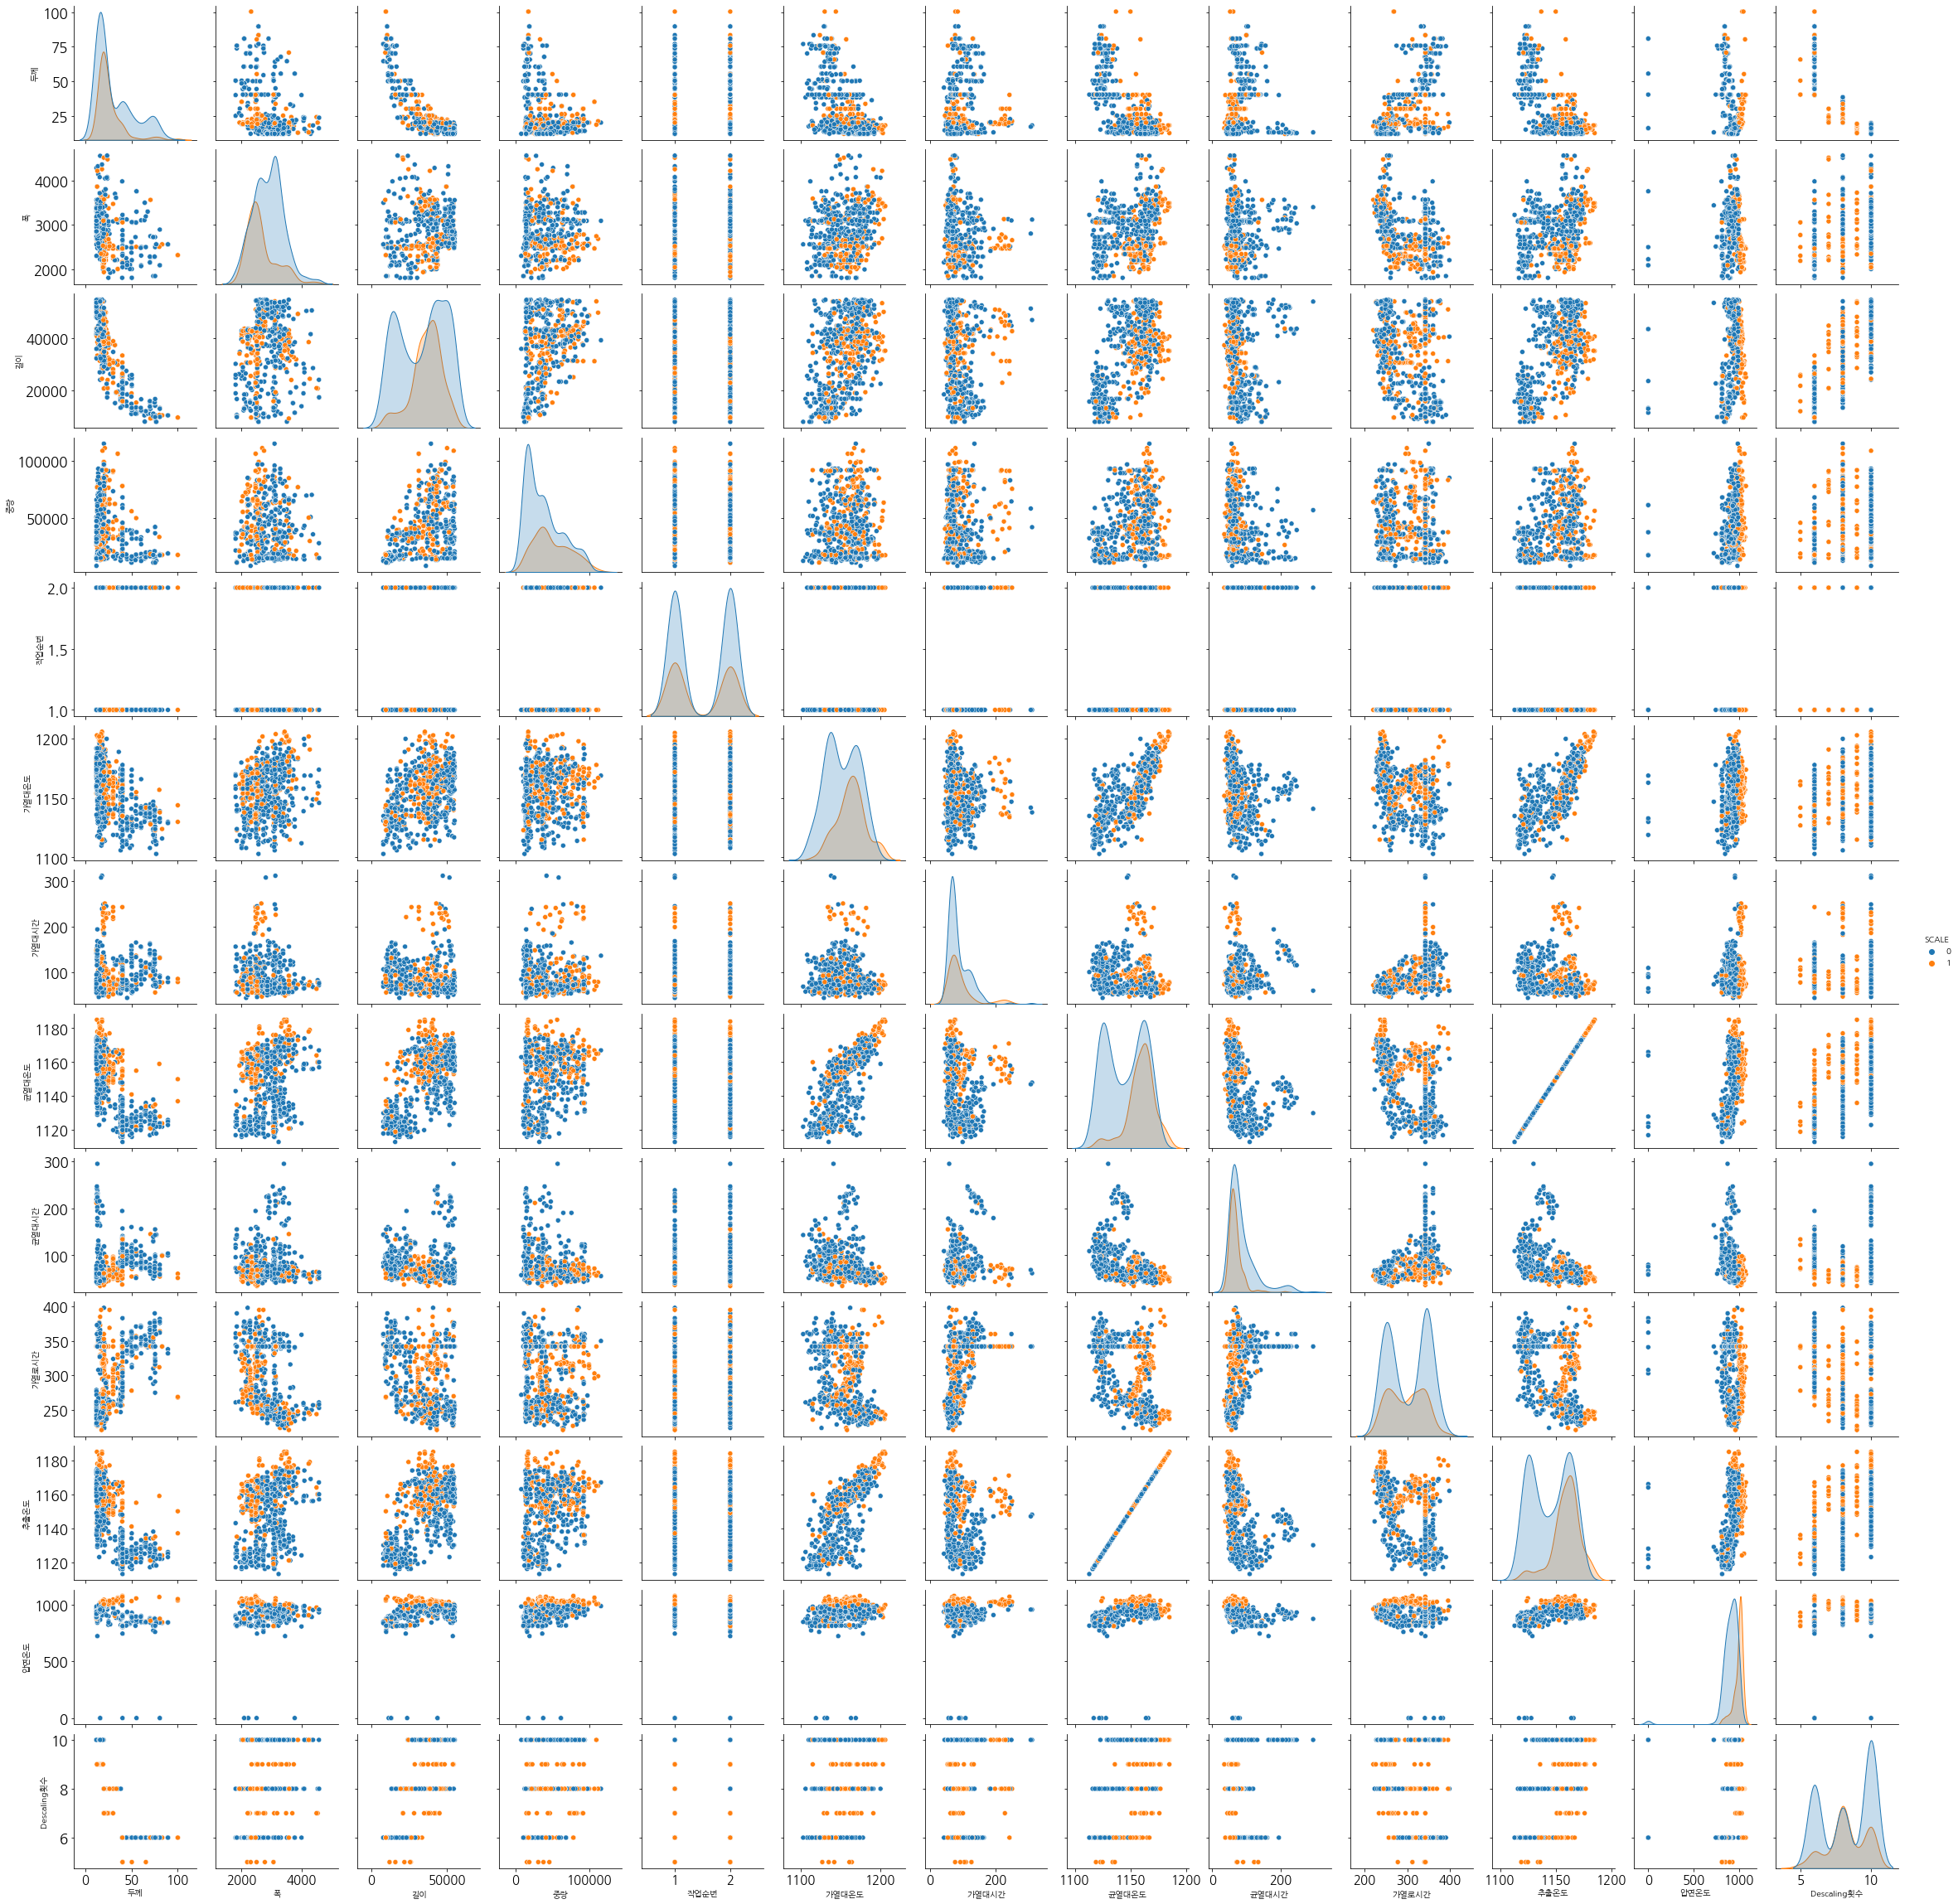

In [171]:
sns.pairplot(new_scale, hue = 'SCALE')

균열대 온도 제거 

####  2. Sample T -test 
##### 양품과 불량의 변수별 평균 비교

##### 2-1 각 변수들 정규성 테스트

In [120]:
scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SCALE              720 non-null    object
 1   SPEC               720 non-null    object
 2   STEEL_KIND         720 non-null    object
 3   PT_THK             720 non-null    int64 
 4   PT_WDTH            720 non-null    int64 
 5   PT_LTH             720 non-null    int64 
 6   PT_WGT             720 non-null    int64 
 7   FUR_NO             720 non-null    object
 8   FUR_NO_ROW         720 non-null    int64 
 9   FUR_HZ_TEMP        720 non-null    int64 
 10  FUR_HZ_TIME        720 non-null    int64 
 11  FUR_SZ_TEMP        720 non-null    int64 
 12  FUR_SZ_TIME        720 non-null    int64 
 13  FUR_TIME           720 non-null    int64 
 14  FUR_EXTEMP         720 non-null    int64 
 15  ROLLING_TEMP_T5    720 non-null    int64 
 16  HSB                720 non-null    object
 1

In [25]:
scale.drop(['PLATE_NO','ROLLING_DATE'], axis = 1, inplace = True)

In [51]:
scale['PT_THK'] = scale['PT_THK'].astype('int64')

In [153]:
scale['PT_THK'].describe()

count   720.00
mean     29.00
std      19.05
min      12.00
25%      16.00
50%      20.00
75%      40.00
max     100.00
Name: PT_THK, dtype: float64

In [254]:
scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SCALE              720 non-null    int64  
 1   SPEC               720 non-null    object 
 2   STEEL_KIND         720 non-null    object 
 3   PT_THK             720 non-null    float64
 4   PT_WDTH            720 non-null    int64  
 5   PT_LTH             720 non-null    int64  
 6   PT_WGT             720 non-null    int64  
 7   FUR_NO             720 non-null    object 
 8   FUR_NO_ROW         720 non-null    object 
 9   FUR_HZ_TEMP        720 non-null    int64  
 10  FUR_HZ_TIME        720 non-null    int64  
 11  FUR_SZ_TEMP        720 non-null    int64  
 12  FUR_SZ_TIME        720 non-null    int64  
 13  FUR_TIME           720 non-null    int64  
 14  FUR_EXTEMP         720 non-null    int64  
 15  ROLLING_TEMP_T5    720 non-null    int64  
 16  HSB                720 non

### IQR을 이용한 이상치 제거 

In [208]:
def del_outlier(df, columns):
    
    des = df[columns].describe()
    iqr =des[6]-des[4]
#     print(des[6])
#     print(des[4])
#     print(iqr)
    high = iqr*1.5 + des[6]
    low = des[4] -iqr*1.5 
#     print(high, low)
    df1 = df[df&(df[columns] > low) & (df[columns] < high)]
    return df1

In [256]:
df = del_outlier(scale, 'PT_THK')
df =  del_outlier(df, 'PT_WDTH')
df =  del_outlier(df, 'PT_LTH')
df =  del_outlier(df, 'PT_WDTH')
df =  del_outlier(df, 'FUR_HZ_TEMP')
df =  del_outlier(df, 'FUR_HZ_TIME')
df =  del_outlier(df, 'FUR_SZ_TEMP')
df =  del_outlier(df, 'FUR_SZ_TIME')
df =  del_outlier(df, 'FUR_TIME')
df =  del_outlier(df, 'FUR_EXTEMP')
sca =  del_outlier(df, 'ROLLING_TEMP_T5')



In [318]:
def check_norm(df,steel_kind, al):
    from scipy.stats import shapiro
    import scipy.stats as stats
    df = df[df['STEEL_KIND']== steel_kind]
    no = df[df['SCALE']== 0]
    pro =df[df['SCALE']== 1] 
    def draw_qqplot(df, i):
        if is_object_dtype(df[i]) == False:
            if al != 'all':
                fig, ax =plt.subplots(2,3, figsize =(20,8))
                sns.histplot(data = no , x = i ,kde=True,color = 'r' ,ax= ax[0,0], label = '양품')
                stats.probplot(no[i], plot = ax[0,1])
                sns.boxplot(no[i] , ax = ax[0,2])


                sns.histplot(data = pro , x = i ,kde=True,color = 'b' ,ax= ax[1,0], label ='불량')
                stats.probplot(pro[i], plot = ax[1,1])
                sns.boxplot(pro[i] , ax = ax[1,2])
                print(fig)
            elif al == 'all':
                fig, ax =plt.subplots(1,3, figsize =(20,8))
                sns.histplot(data = df , x = i ,kde=True,color = 'r' ,ax= ax[0], label = '양품')
                stats.probplot(df[i], plot = ax[1])
                sns.boxplot(df[i] , ax = ax[2])
        
        
    def normal_test(df, i):            
        if is_object_dtype(df[i]) == False:
            stats , pval = shapiro(df[i])
            print(' 샤피로 : 검정 통계량 : {}, p_values : {}'.format(stats, pval))
            if pval < 0.05:
                print(" 샤피로 : P_value : {}로 변수 {}는 정규성을 가지지 않는다.".format(pval,i))

            elif pval > 0.05:
                print(" 샤피로 :  P_value : {}로 변수 {}는 정규성을 가진다.".format(pval,i))
    for i in df.columns:
        draw_qqplot(df, i)
        plt.show()
        normal_test(df, i)
        

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


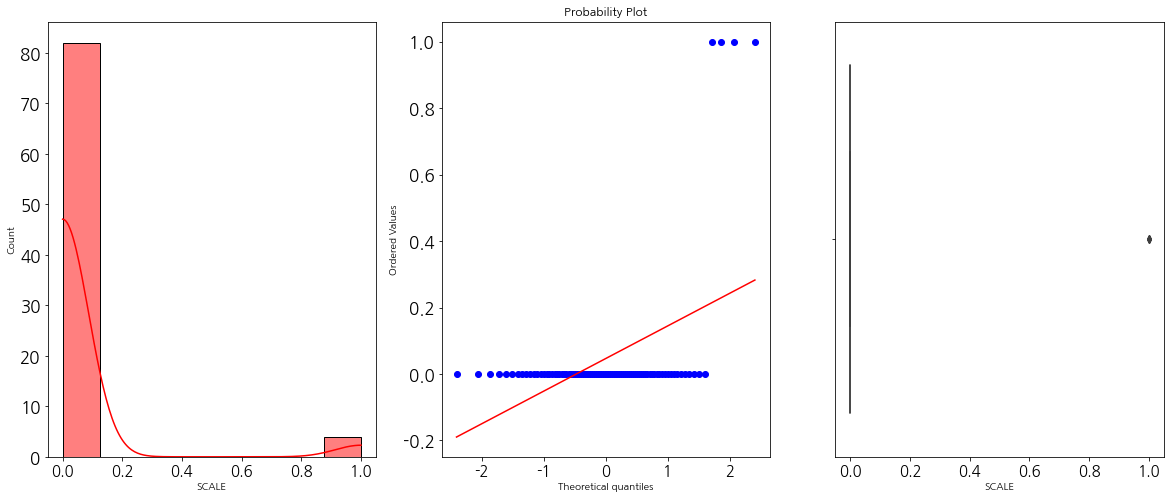

 샤피로 : 검정 통계량 : 0.21526753902435303, p_values : 2.7662411193815255e-19
 샤피로 : P_value : 2.7662411193815255e-19로 변수 SCALE는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


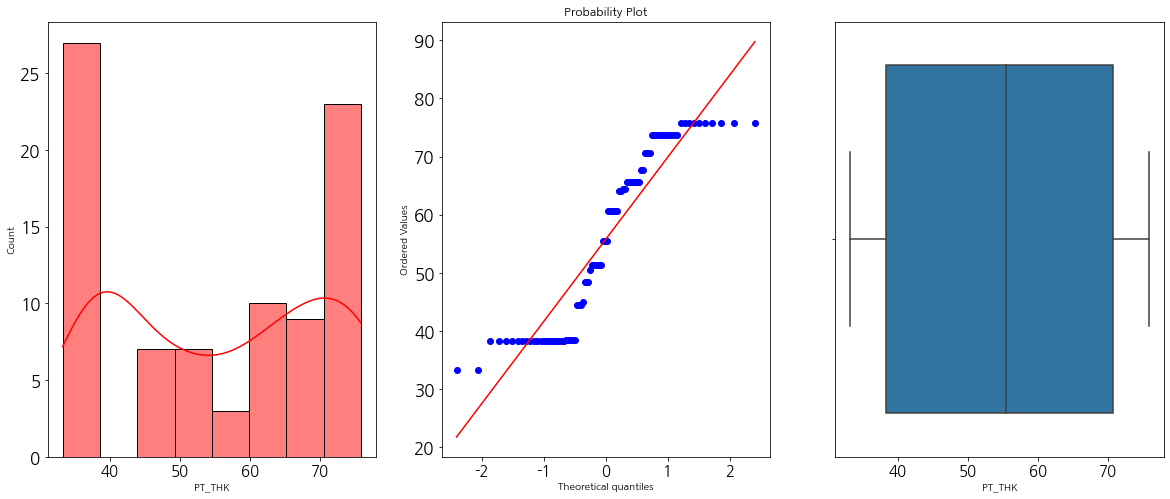

 샤피로 : 검정 통계량 : 0.8653584718704224, p_values : 2.542317645293224e-07
 샤피로 : P_value : 2.542317645293224e-07로 변수 PT_THK는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


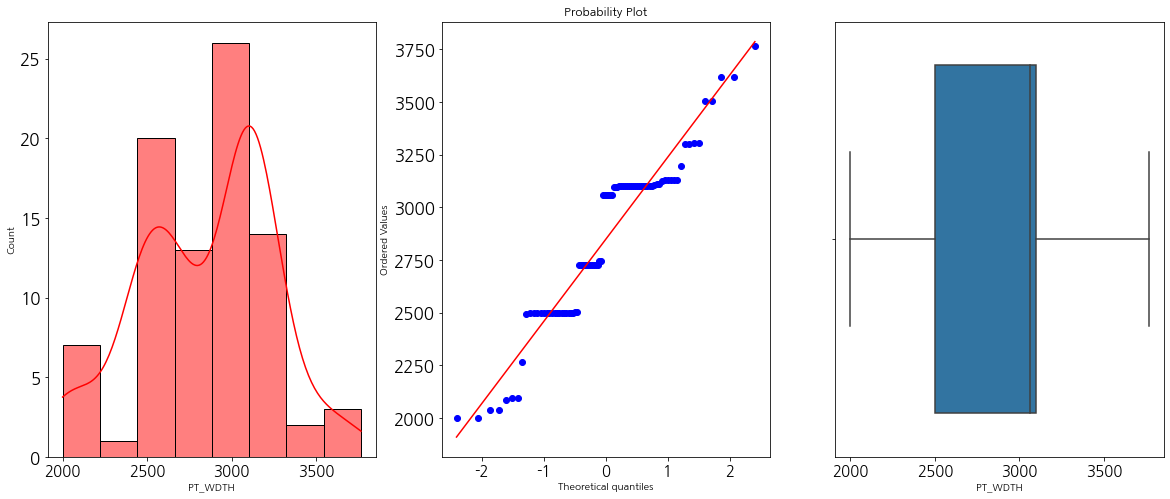

 샤피로 : 검정 통계량 : 0.9238505363464355, p_values : 8.185716433217749e-05
 샤피로 : P_value : 8.185716433217749e-05로 변수 PT_WDTH는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


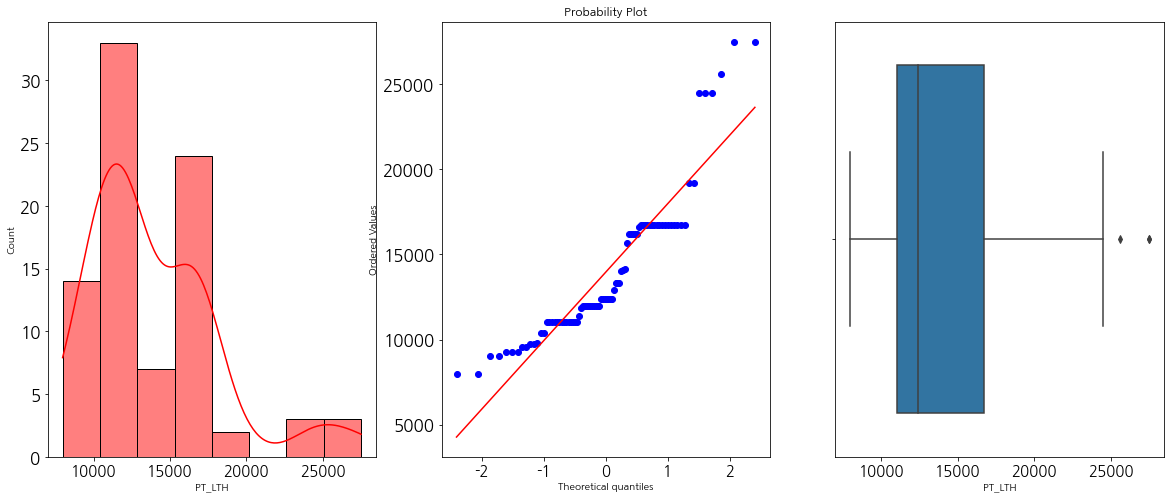

 샤피로 : 검정 통계량 : 0.8576093912124634, p_values : 1.329092356172623e-07
 샤피로 : P_value : 1.329092356172623e-07로 변수 PT_LTH는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


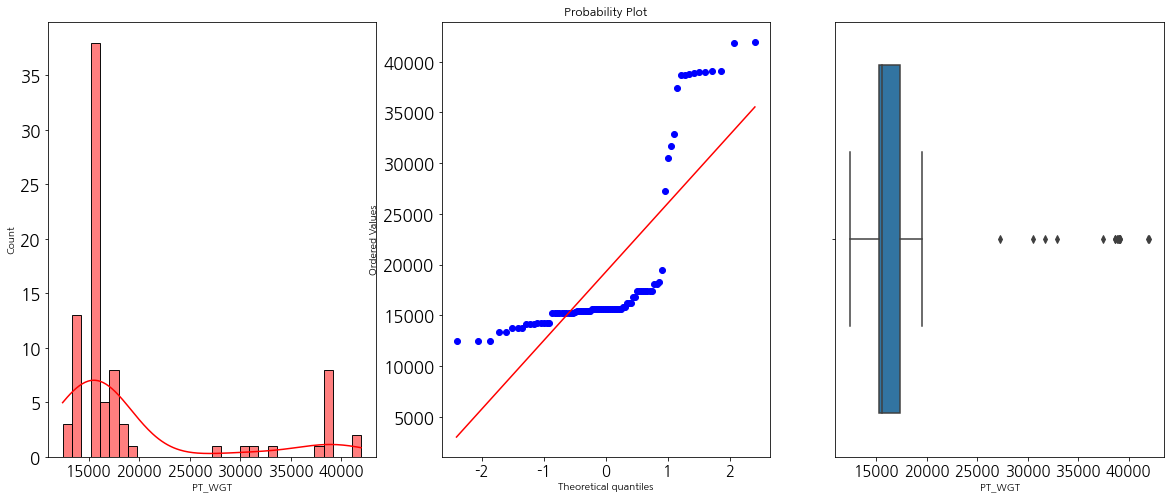

 샤피로 : 검정 통계량 : 0.6131447553634644, p_values : 1.0286540906177463e-13
 샤피로 : P_value : 1.0286540906177463e-13로 변수 PT_WGT는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


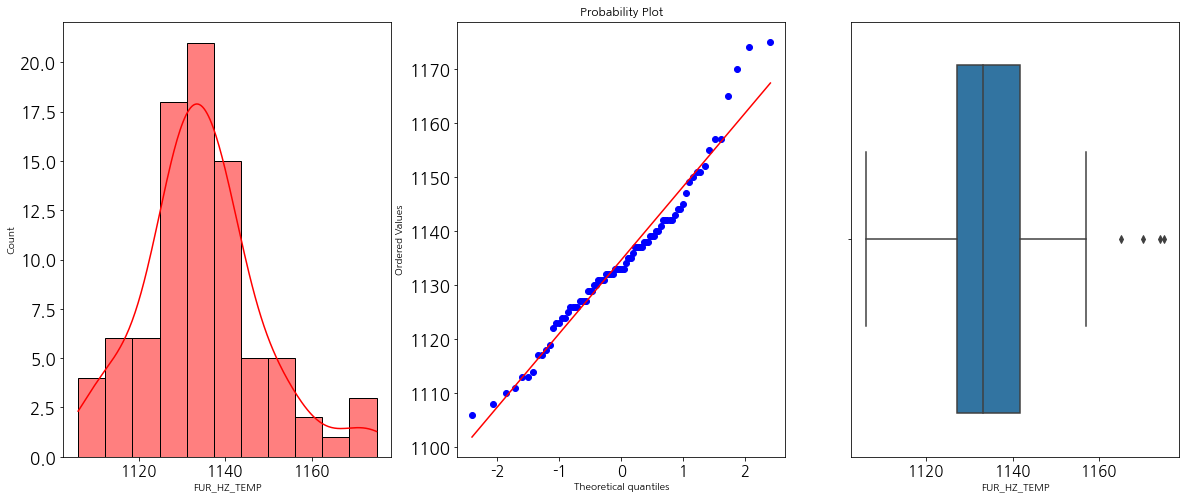

 샤피로 : 검정 통계량 : 0.963252604007721, p_values : 0.015143376775085926
 샤피로 : P_value : 0.015143376775085926로 변수 FUR_HZ_TEMP는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


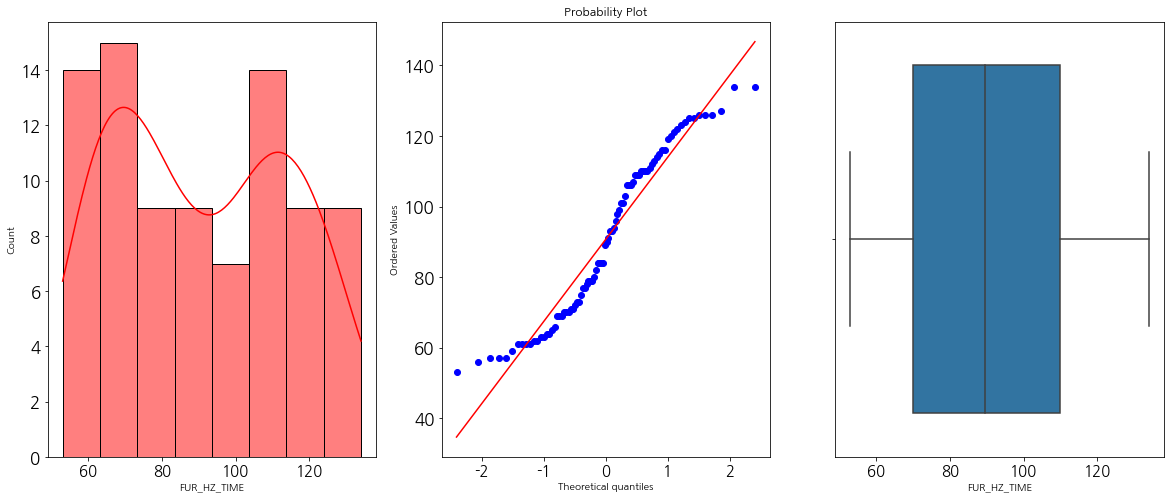

 샤피로 : 검정 통계량 : 0.934269368648529, p_values : 0.00028489751275628805
 샤피로 : P_value : 0.00028489751275628805로 변수 FUR_HZ_TIME는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


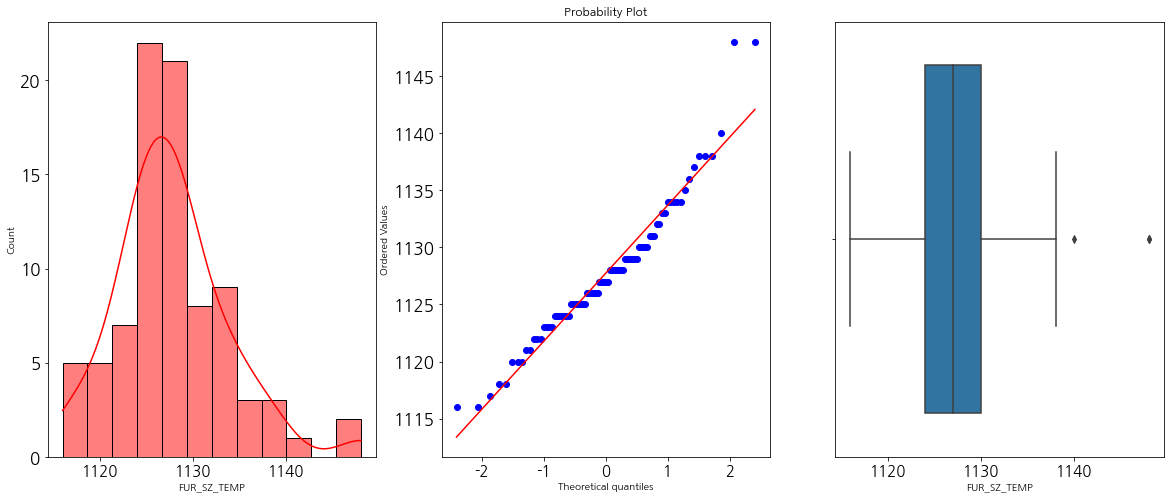

 샤피로 : 검정 통계량 : 0.9508683681488037, p_values : 0.0025137171614915133
 샤피로 : P_value : 0.0025137171614915133로 변수 FUR_SZ_TEMP는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


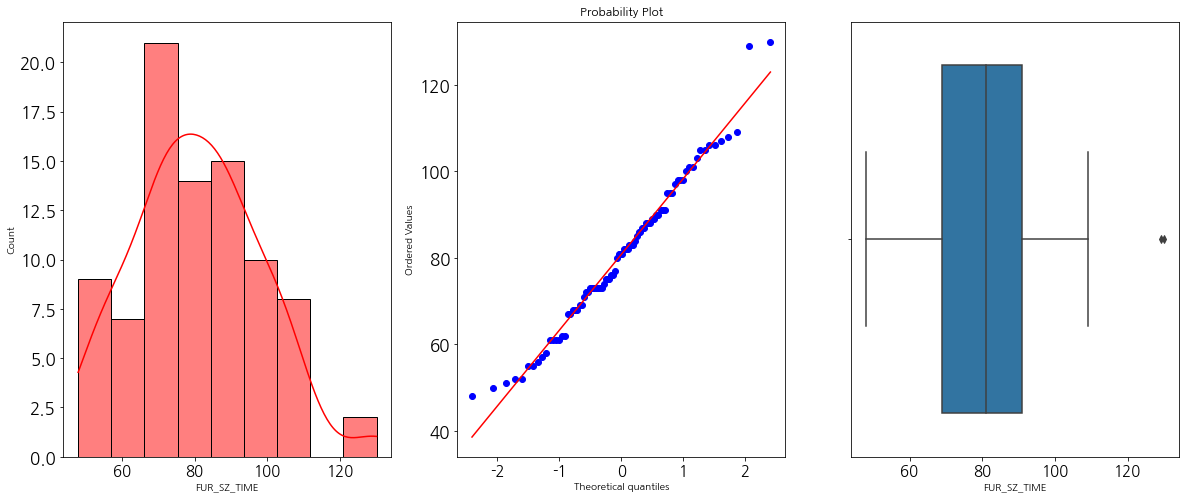

 샤피로 : 검정 통계량 : 0.9803730249404907, p_values : 0.21576298773288727
 샤피로 :  P_value : 0.21576298773288727로 변수 FUR_SZ_TIME는 정규성을 가진다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


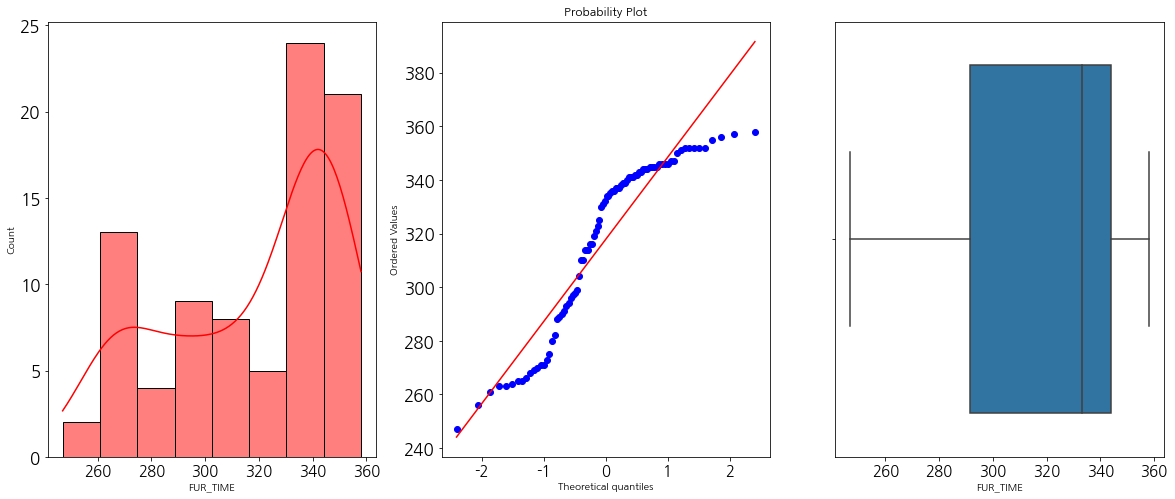

 샤피로 : 검정 통계량 : 0.8803563117980957, p_values : 9.523566859570565e-07
 샤피로 : P_value : 9.523566859570565e-07로 변수 FUR_TIME는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


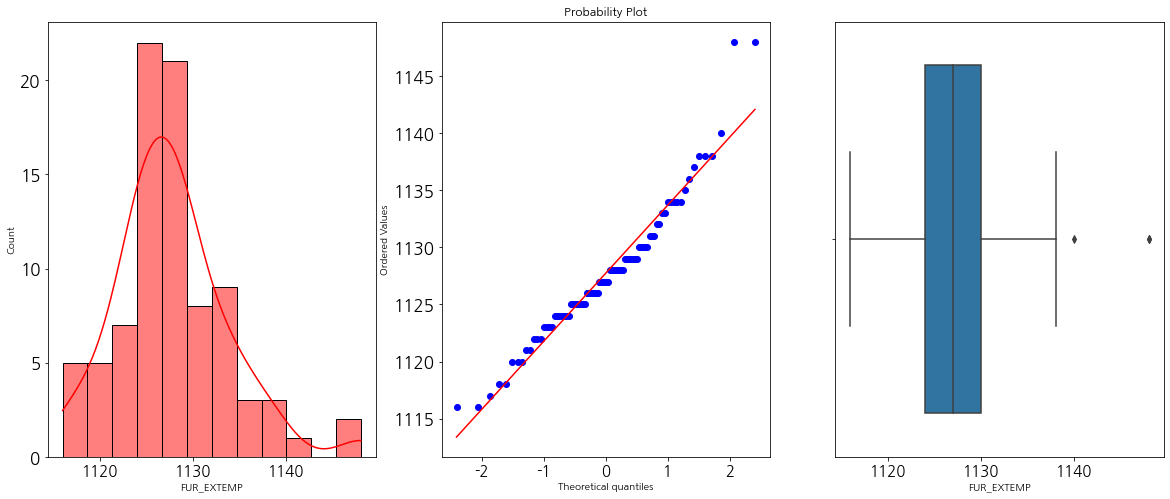

 샤피로 : 검정 통계량 : 0.9508683681488037, p_values : 0.0025137171614915133
 샤피로 : P_value : 0.0025137171614915133로 변수 FUR_EXTEMP는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


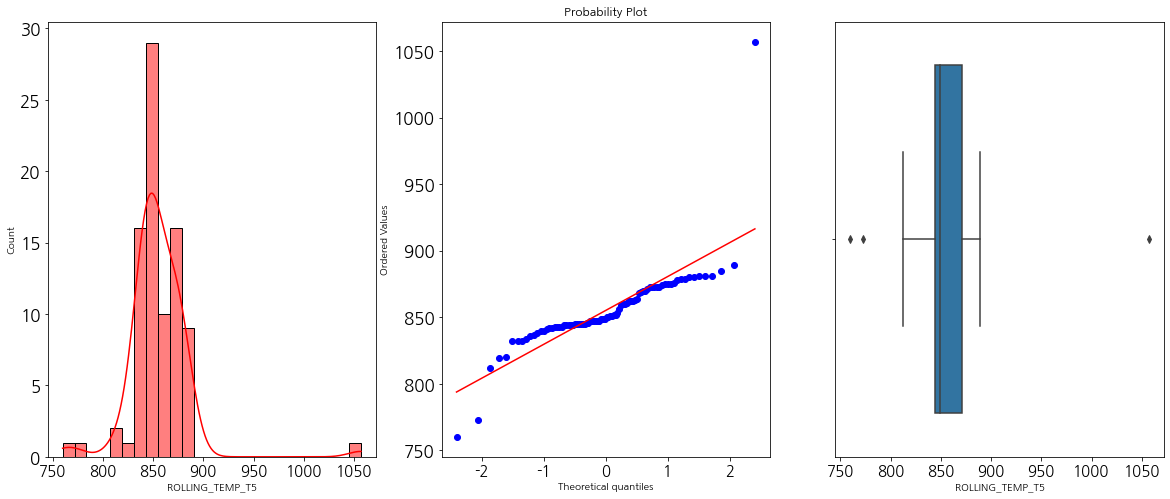

 샤피로 : 검정 통계량 : 0.6964145302772522, p_values : 4.820146885797794e-12
 샤피로 : P_value : 4.820146885797794e-12로 변수 ROLLING_TEMP_T5는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


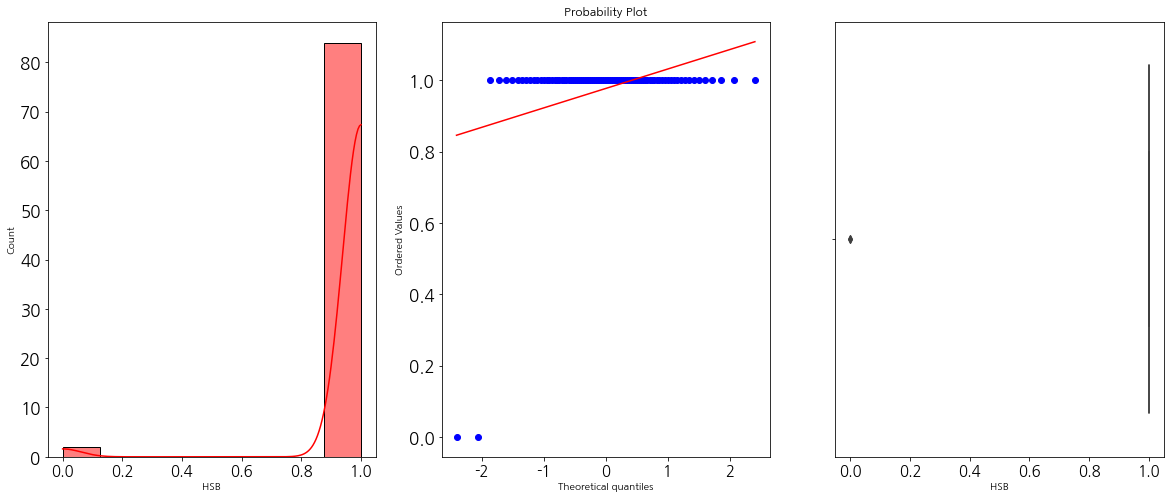

 샤피로 : 검정 통계량 : 0.1365433931350708, p_values : 4.067725931949723e-20
 샤피로 : P_value : 4.067725931949723e-20로 변수 HSB는 정규성을 가지지 않는다.


In [321]:
check_norm(sca, 'T8', 'all')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


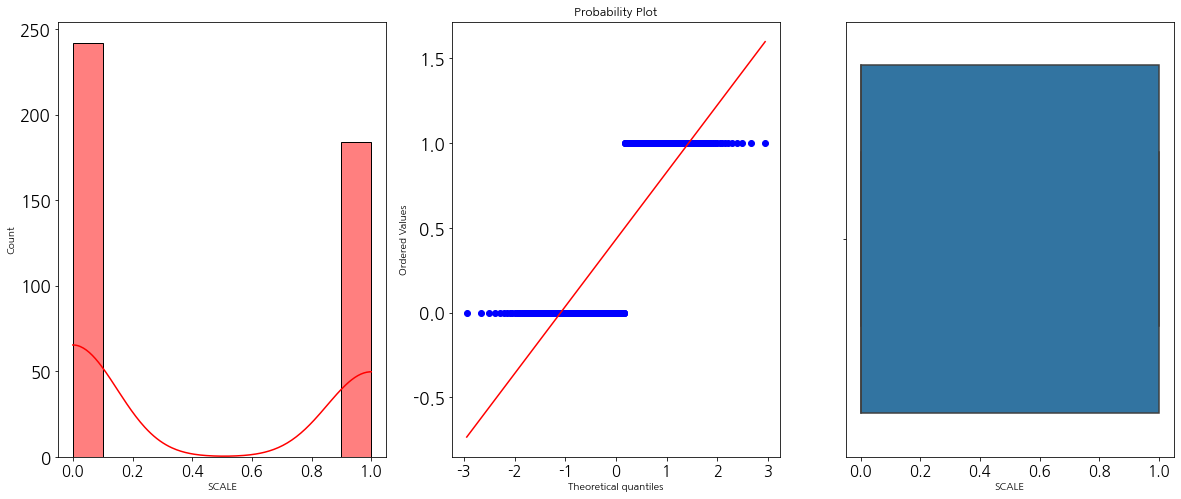

 샤피로 : 검정 통계량 : 0.6297527551651001, p_values : 2.859901244974319e-29
 샤피로 : P_value : 2.859901244974319e-29로 변수 SCALE는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


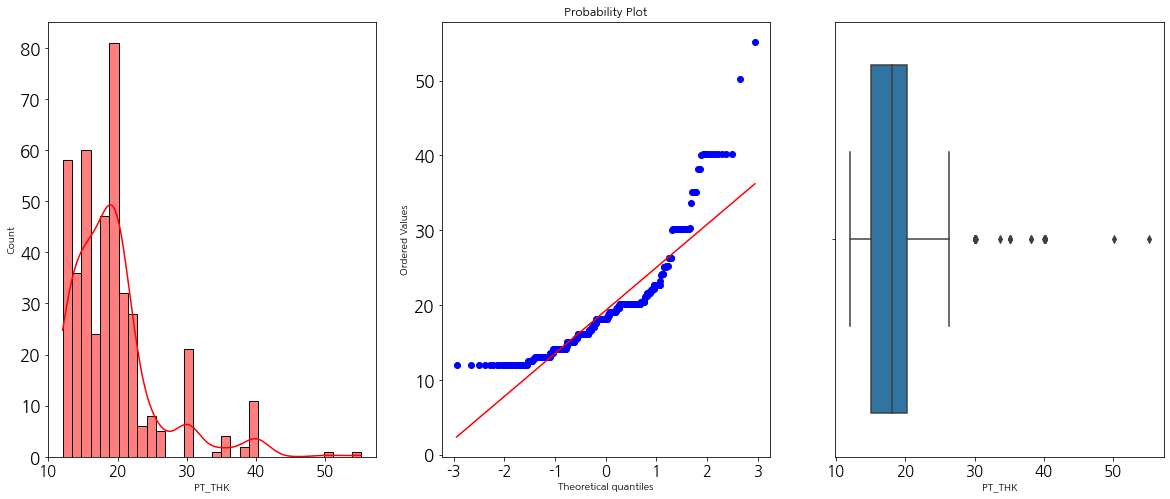

 샤피로 : 검정 통계량 : 0.8181602954864502, p_values : 1.3577426584976359e-21
 샤피로 : P_value : 1.3577426584976359e-21로 변수 PT_THK는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


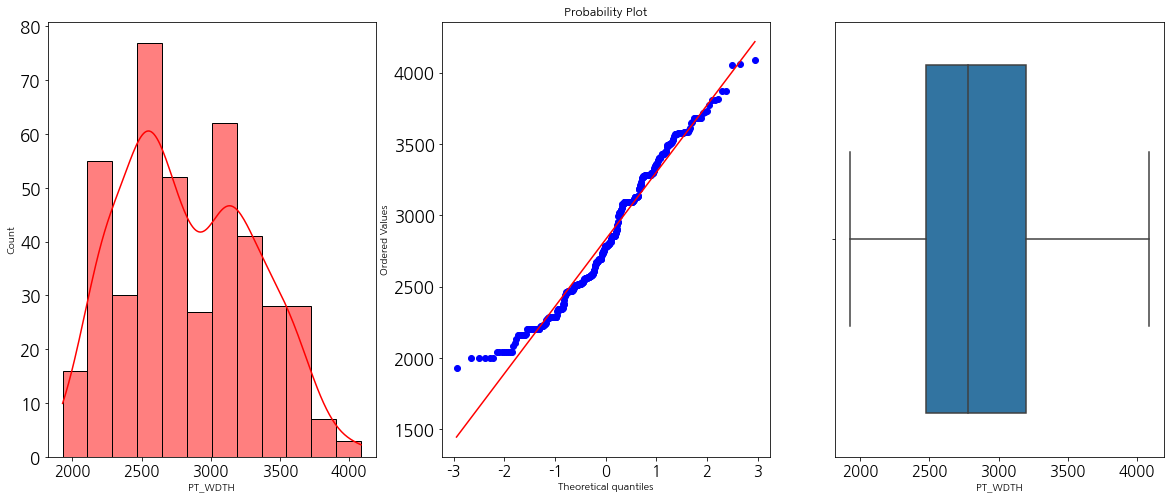

 샤피로 : 검정 통계량 : 0.9703162908554077, p_values : 1.318161650942784e-07
 샤피로 : P_value : 1.318161650942784e-07로 변수 PT_WDTH는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


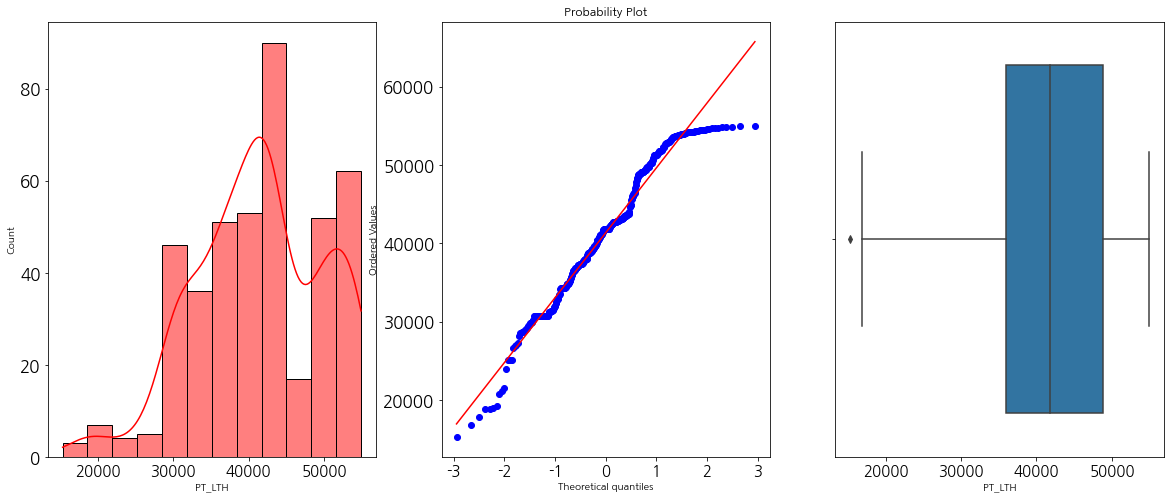

 샤피로 : 검정 통계량 : 0.9696469306945801, p_values : 9.912978526926963e-08
 샤피로 : P_value : 9.912978526926963e-08로 변수 PT_LTH는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


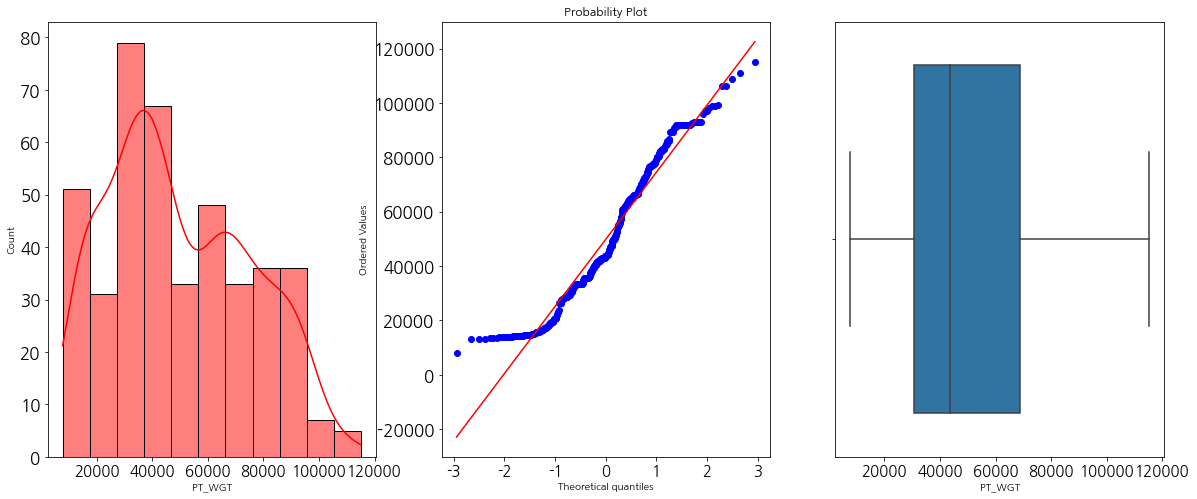

 샤피로 : 검정 통계량 : 0.9530784487724304, p_values : 2.1819430984226784e-10
 샤피로 : P_value : 2.1819430984226784e-10로 변수 PT_WGT는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


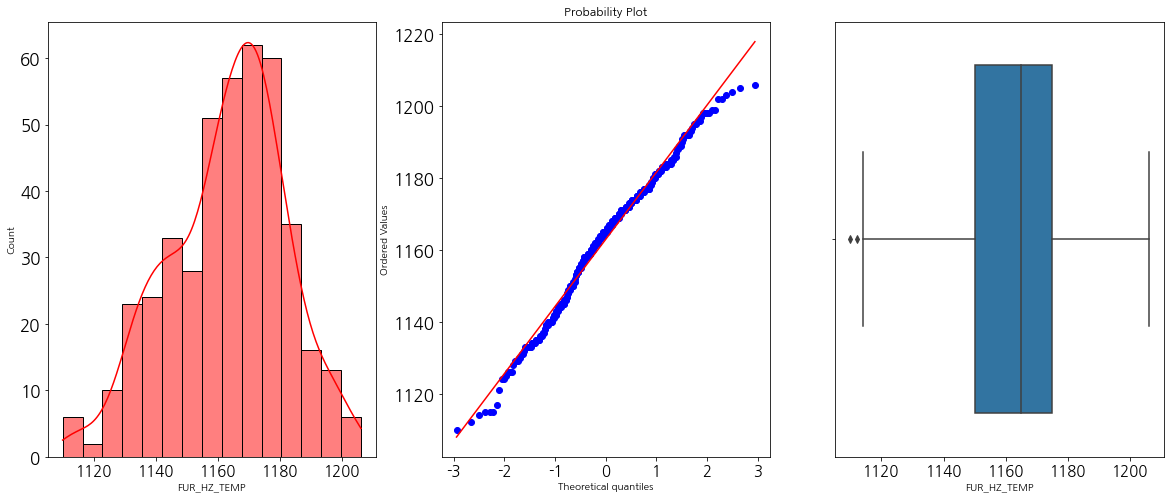

 샤피로 : 검정 통계량 : 0.986432671546936, p_values : 0.0005202034371905029
 샤피로 : P_value : 0.0005202034371905029로 변수 FUR_HZ_TEMP는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


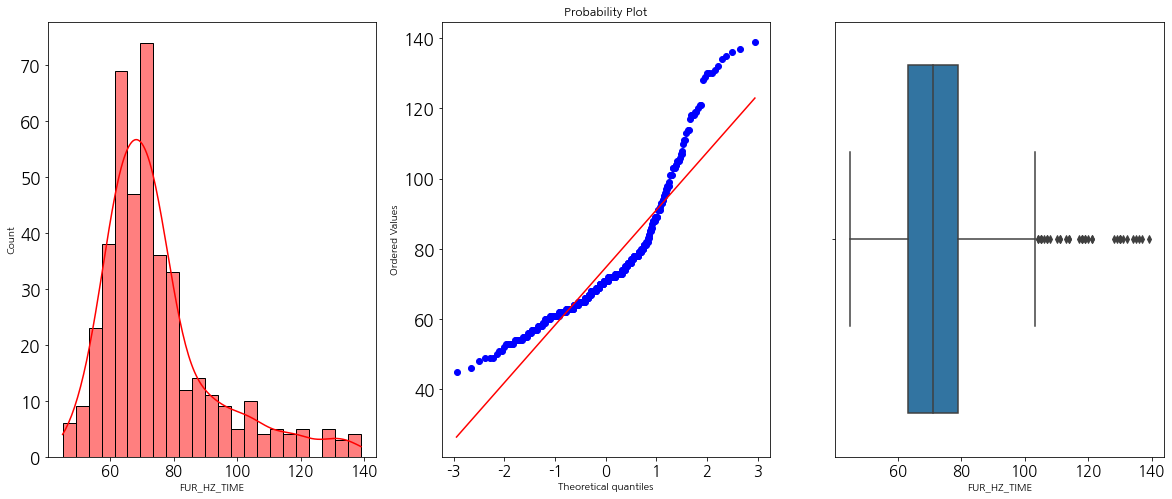

 샤피로 : 검정 통계량 : 0.8631870746612549, p_values : 7.204336782860954e-19
 샤피로 : P_value : 7.204336782860954e-19로 변수 FUR_HZ_TIME는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


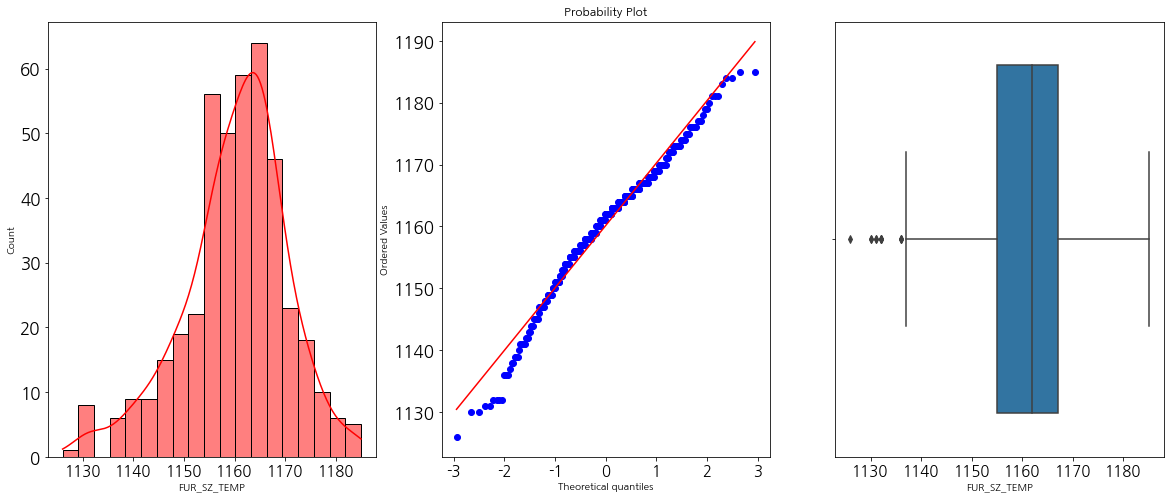

 샤피로 : 검정 통계량 : 0.9749060869216919, p_values : 1.032792056321341e-06
 샤피로 : P_value : 1.032792056321341e-06로 변수 FUR_SZ_TEMP는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


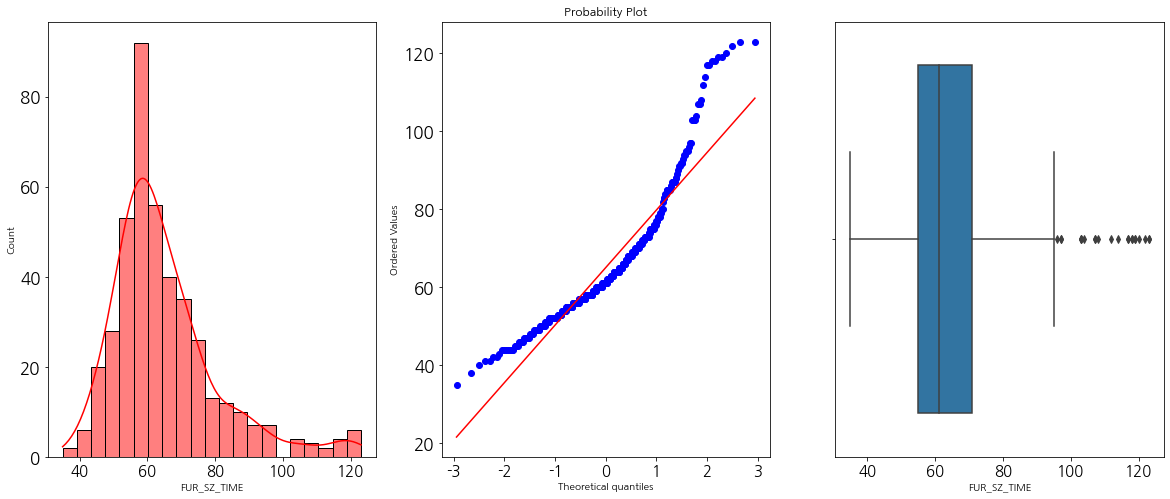

 샤피로 : 검정 통계량 : 0.884343147277832, p_values : 2.3633008358699355e-17
 샤피로 : P_value : 2.3633008358699355e-17로 변수 FUR_SZ_TIME는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


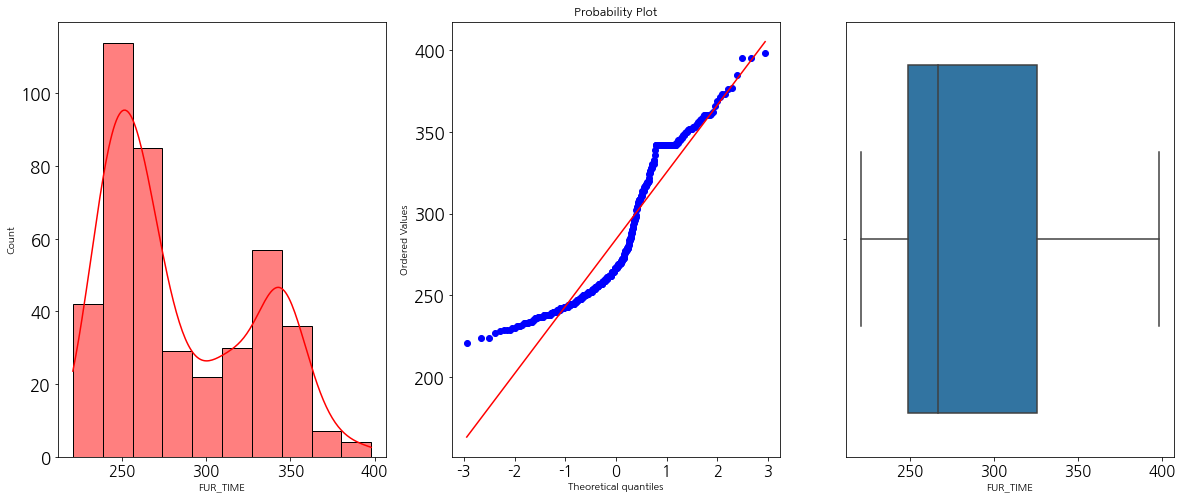

 샤피로 : 검정 통계량 : 0.8916628956794739, p_values : 8.80815003470966e-17
 샤피로 : P_value : 8.80815003470966e-17로 변수 FUR_TIME는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


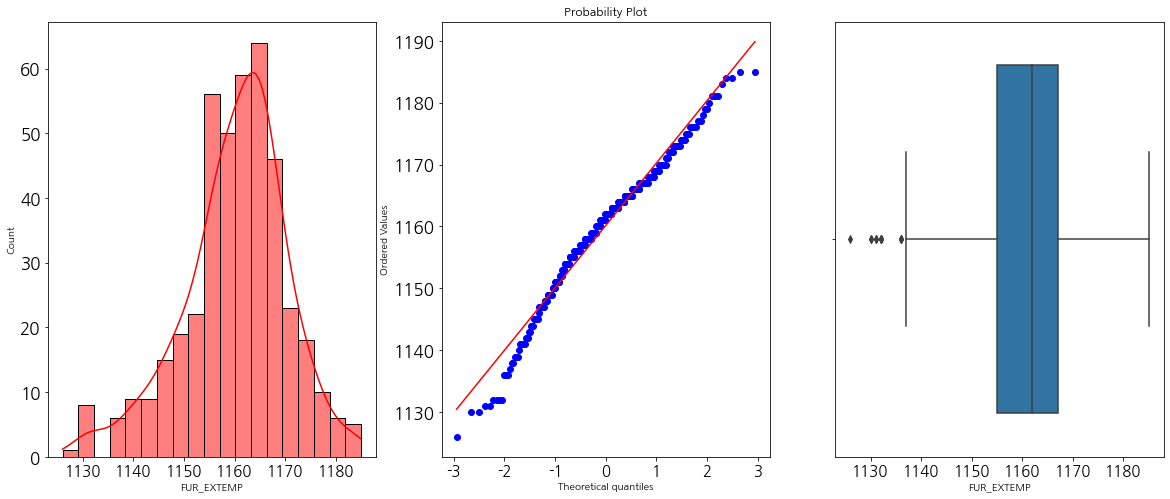

 샤피로 : 검정 통계량 : 0.9749060869216919, p_values : 1.032792056321341e-06
 샤피로 : P_value : 1.032792056321341e-06로 변수 FUR_EXTEMP는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


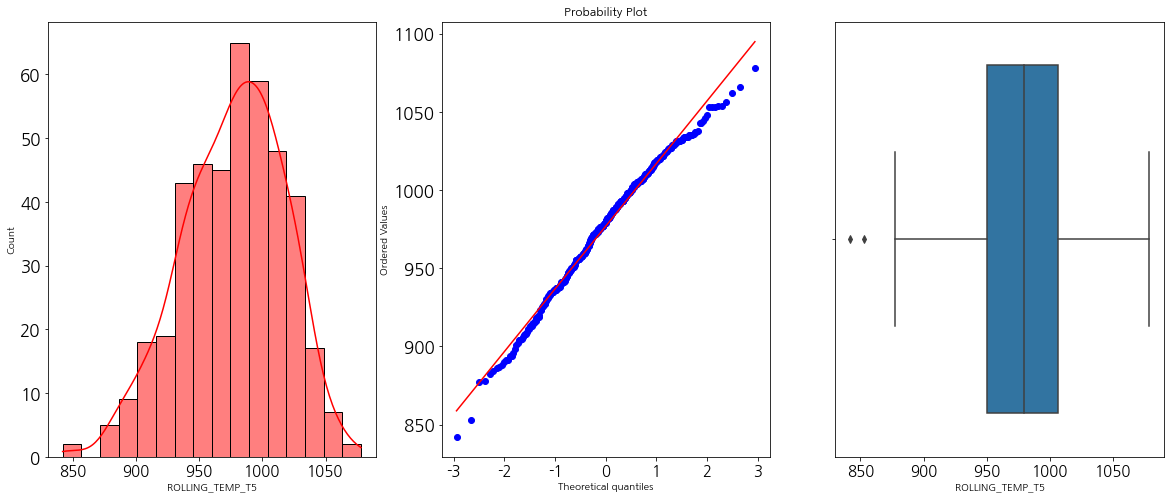

 샤피로 : 검정 통계량 : 0.9895899891853333, p_values : 0.004057867918163538
 샤피로 : P_value : 0.004057867918163538로 변수 ROLLING_TEMP_T5는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


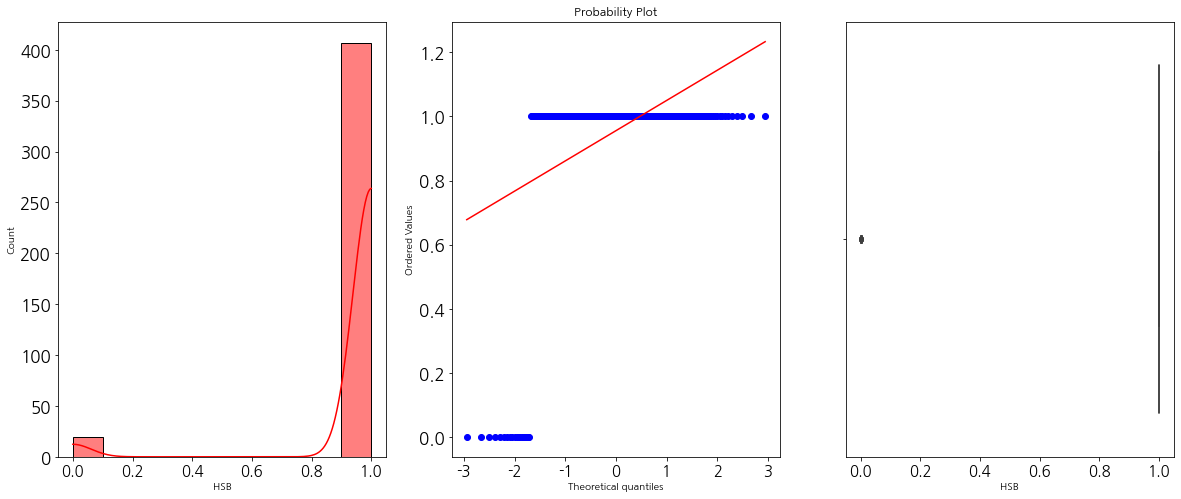

 샤피로 : 검정 통계량 : 0.2078012228012085, p_values : 7.42657077266245e-39
 샤피로 : P_value : 7.42657077266245e-39로 변수 HSB는 정규성을 가지지 않는다.


In [260]:
check_norm(sca, 'C0', 'all')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Figure(1440x576)


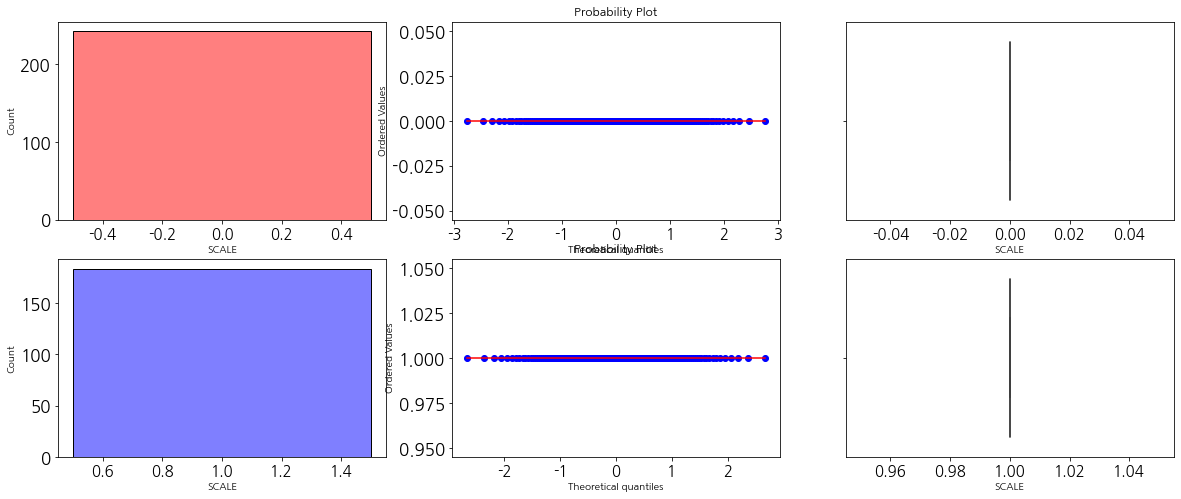

 샤피로 : 검정 통계량 : 0.6297527551651001, p_values : 2.859901244974319e-29
 샤피로 : P_value : 2.859901244974319e-29로 변수 SCALE는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Figure(1440x576)


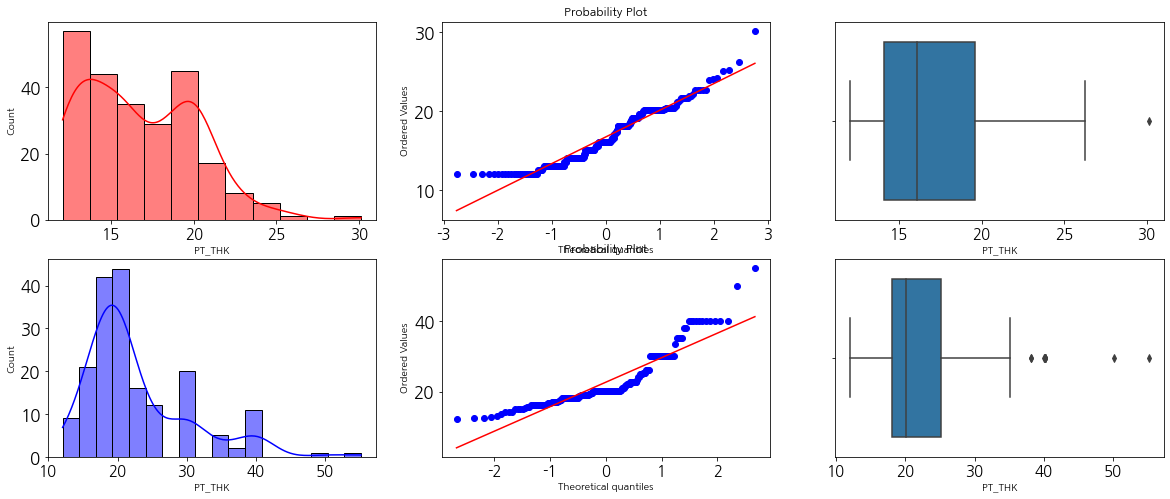

 샤피로 : 검정 통계량 : 0.8181602954864502, p_values : 1.3577426584976359e-21
 샤피로 : P_value : 1.3577426584976359e-21로 변수 PT_THK는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Figure(1440x576)


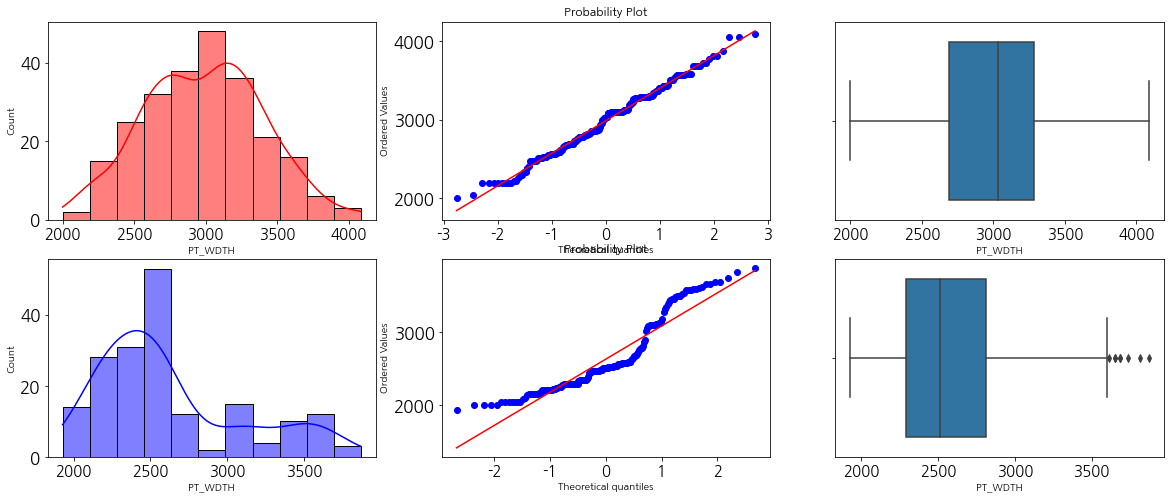

 샤피로 : 검정 통계량 : 0.9703162908554077, p_values : 1.318161650942784e-07
 샤피로 : P_value : 1.318161650942784e-07로 변수 PT_WDTH는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Figure(1440x576)


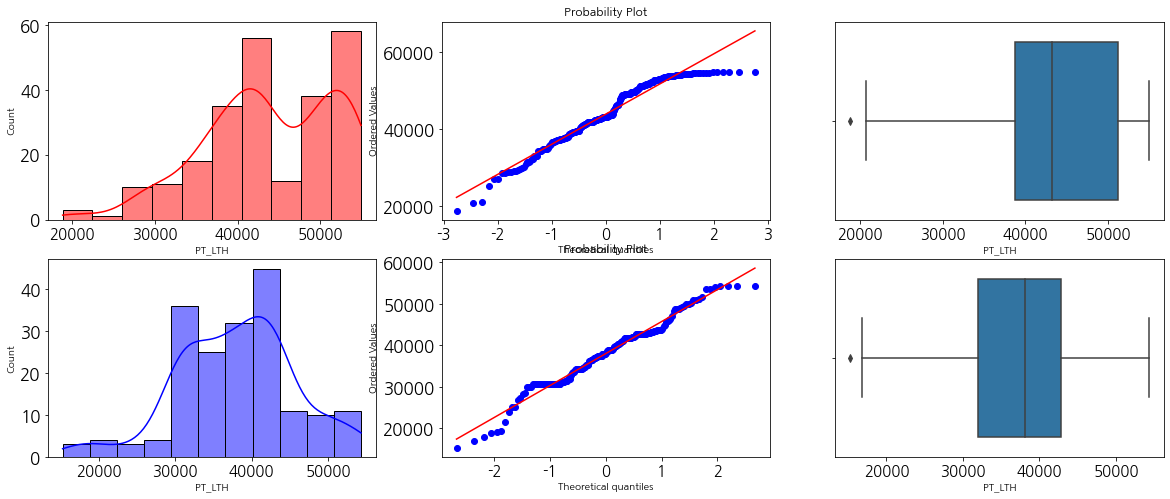

 샤피로 : 검정 통계량 : 0.9696469306945801, p_values : 9.912978526926963e-08
 샤피로 : P_value : 9.912978526926963e-08로 변수 PT_LTH는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Figure(1440x576)


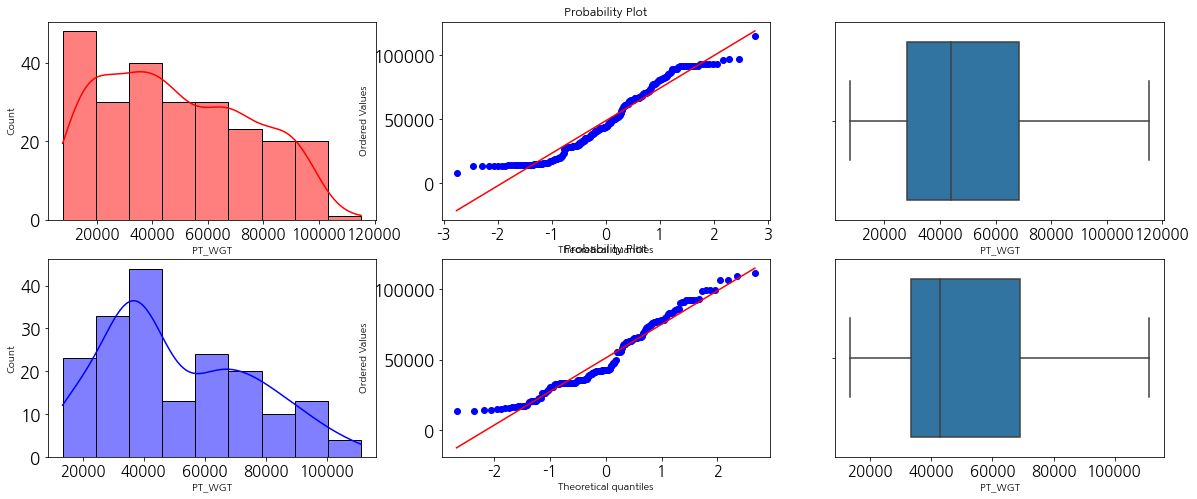

 샤피로 : 검정 통계량 : 0.9530784487724304, p_values : 2.1819430984226784e-10
 샤피로 : P_value : 2.1819430984226784e-10로 변수 PT_WGT는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Figure(1440x576)


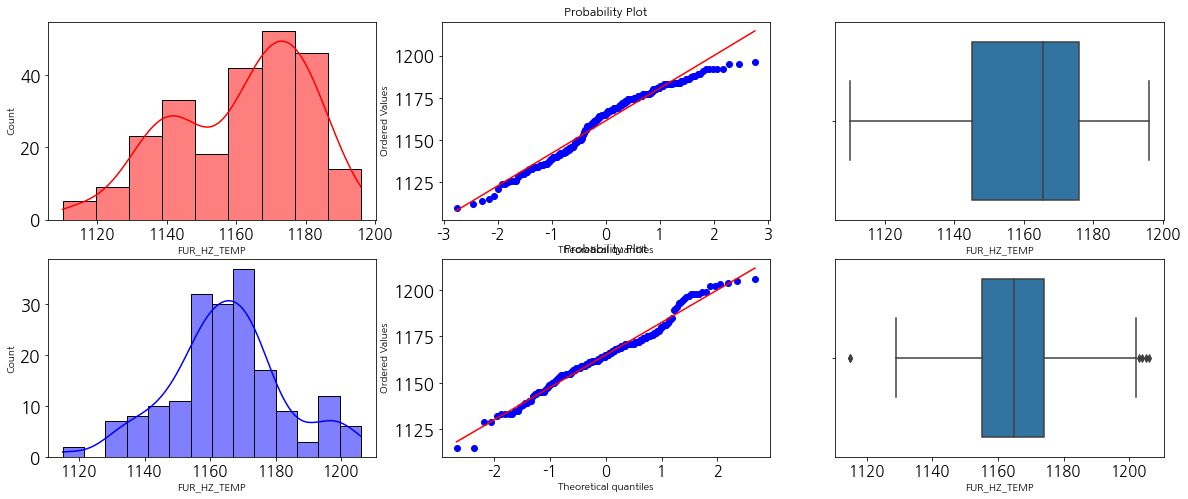

 샤피로 : 검정 통계량 : 0.986432671546936, p_values : 0.0005202034371905029
 샤피로 : P_value : 0.0005202034371905029로 변수 FUR_HZ_TEMP는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Figure(1440x576)


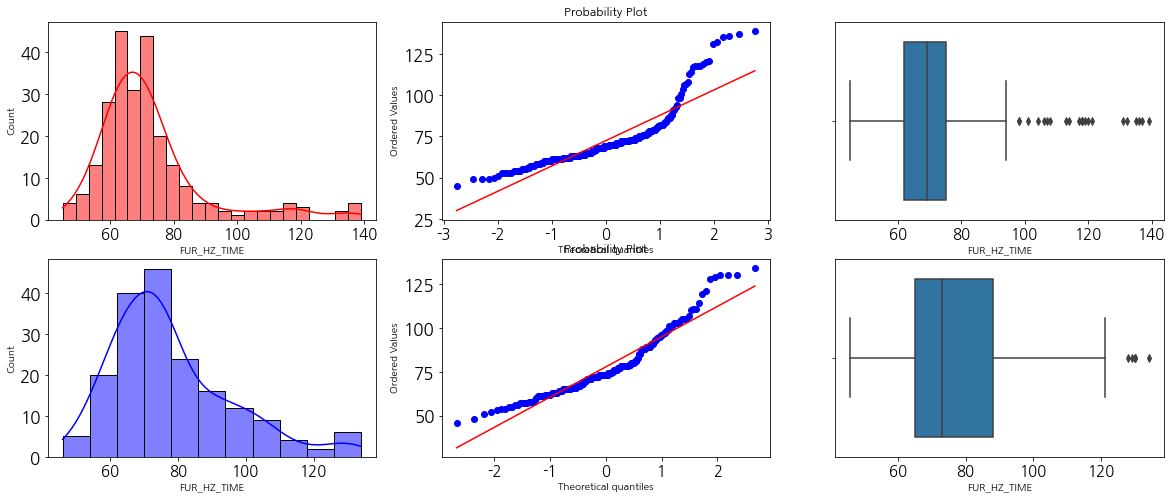

 샤피로 : 검정 통계량 : 0.8631870746612549, p_values : 7.204336782860954e-19
 샤피로 : P_value : 7.204336782860954e-19로 변수 FUR_HZ_TIME는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Figure(1440x576)


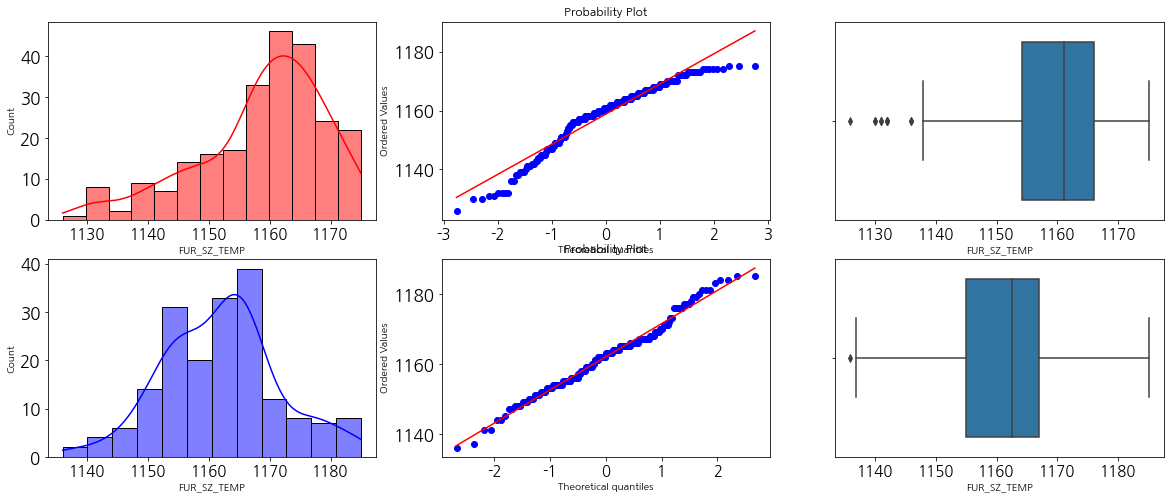

 샤피로 : 검정 통계량 : 0.9749060869216919, p_values : 1.032792056321341e-06
 샤피로 : P_value : 1.032792056321341e-06로 변수 FUR_SZ_TEMP는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Figure(1440x576)


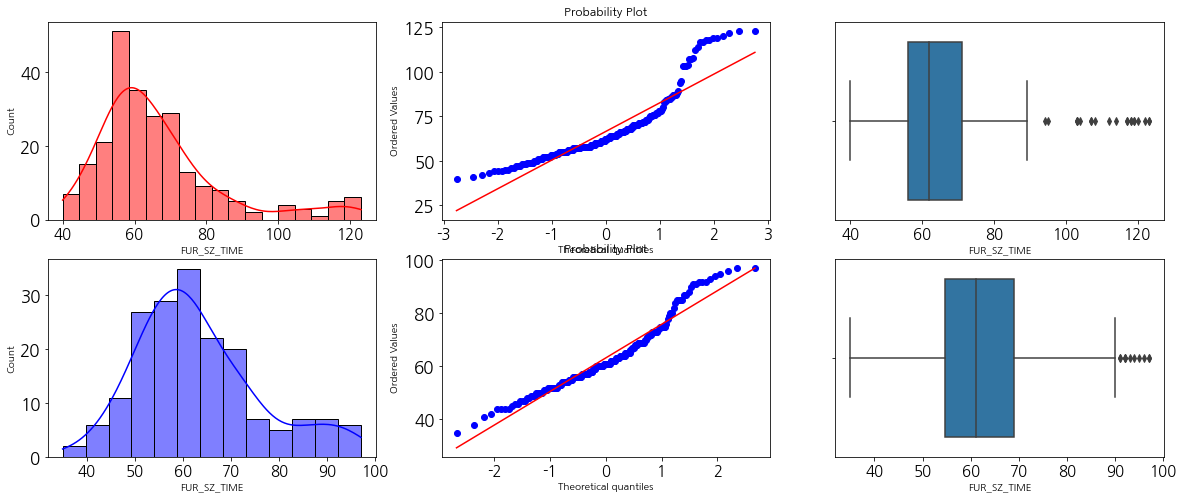

 샤피로 : 검정 통계량 : 0.884343147277832, p_values : 2.3633008358699355e-17
 샤피로 : P_value : 2.3633008358699355e-17로 변수 FUR_SZ_TIME는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Figure(1440x576)


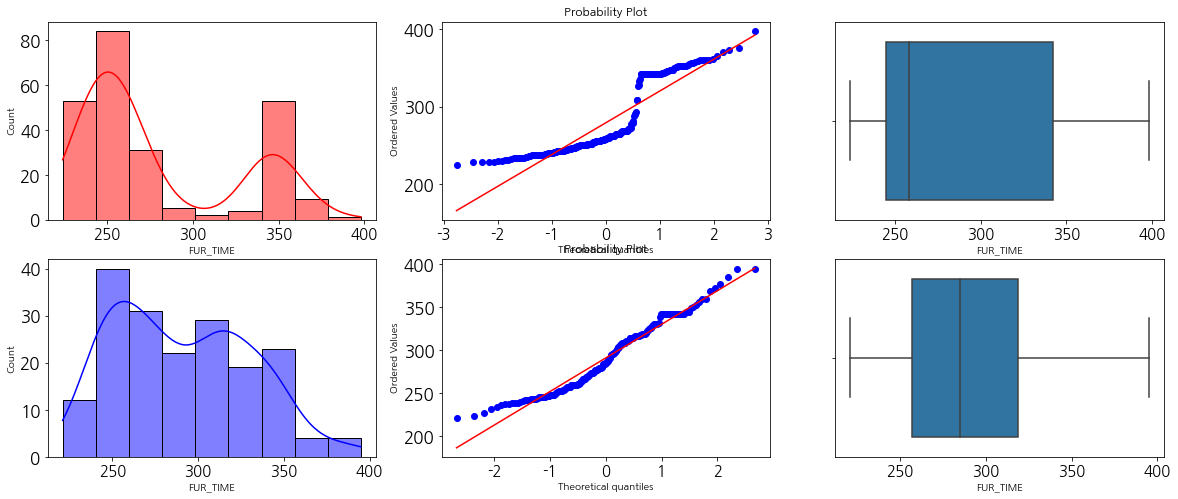

 샤피로 : 검정 통계량 : 0.8916628956794739, p_values : 8.80815003470966e-17
 샤피로 : P_value : 8.80815003470966e-17로 변수 FUR_TIME는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Figure(1440x576)


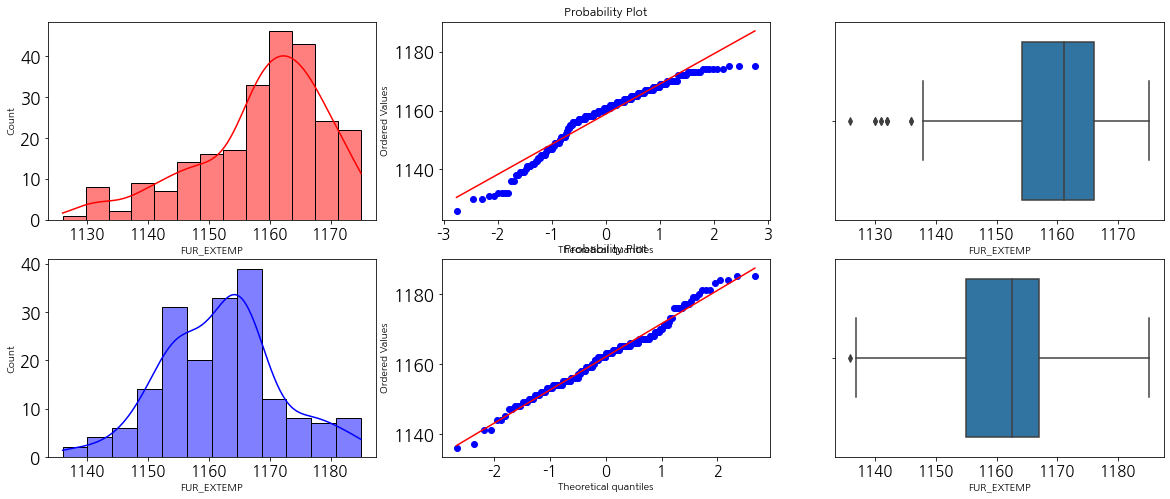

 샤피로 : 검정 통계량 : 0.9749060869216919, p_values : 1.032792056321341e-06
 샤피로 : P_value : 1.032792056321341e-06로 변수 FUR_EXTEMP는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Figure(1440x576)


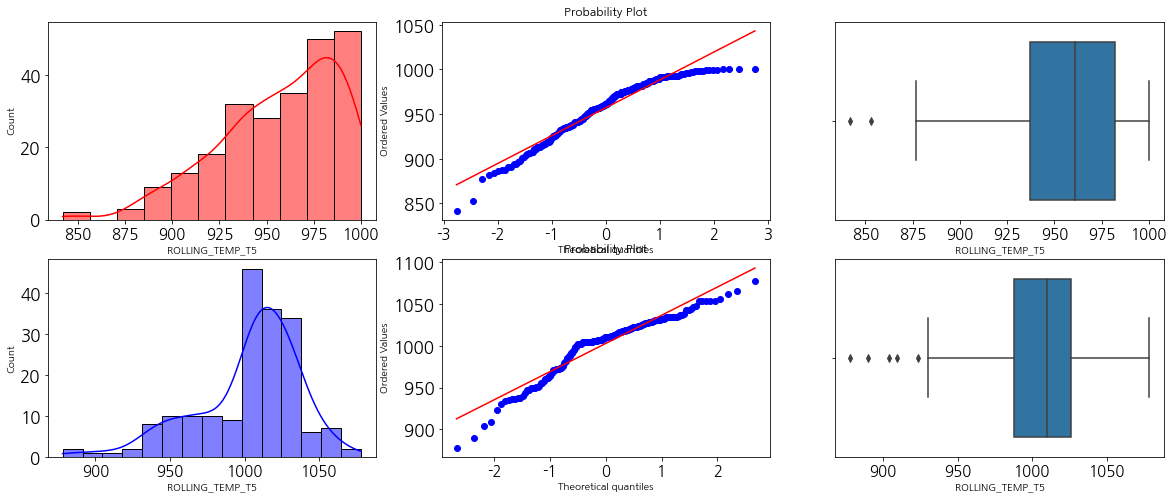

 샤피로 : 검정 통계량 : 0.9895899891853333, p_values : 0.004057867918163538
 샤피로 : P_value : 0.004057867918163538로 변수 ROLLING_TEMP_T5는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Figure(1440x576)


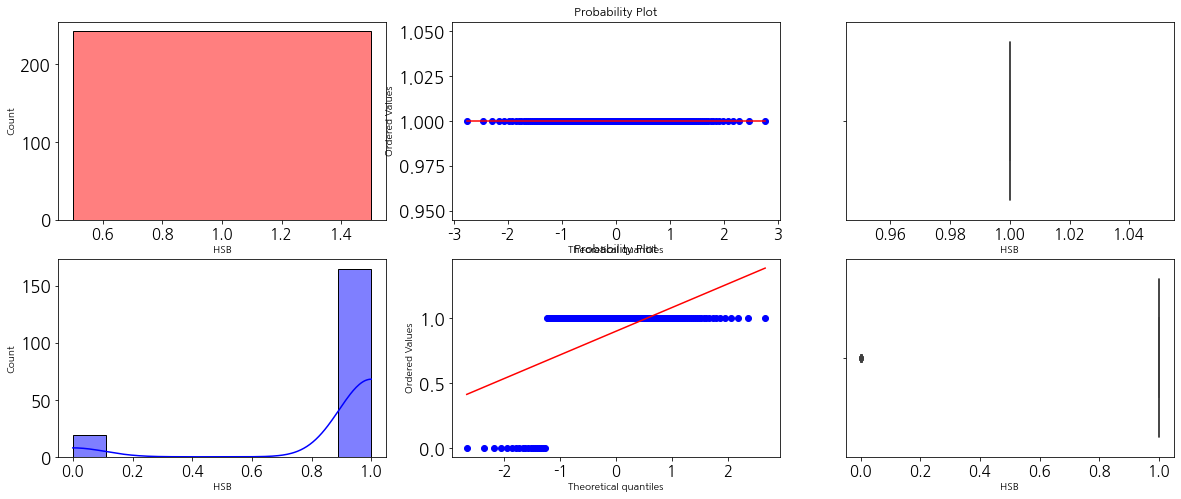

 샤피로 : 검정 통계량 : 0.2078012228012085, p_values : 7.42657077266245e-39
 샤피로 : P_value : 7.42657077266245e-39로 변수 HSB는 정규성을 가지지 않는다.


In [268]:
check_norm(sca, 'C0', 'd')

In [315]:
def t_test(df):
    from scipy import stats
#     df['두께'] = df['두께'].astype('int32')
#     df.drop('폭',axis = 1 , inplace =True)
#     df.drop('길이',axis = 1 , inplace =True)
    col = df.select_dtypes(exclude ='object').columns
    col_list = []
    for i in col:
        if i =='SCALE':
            continue
        else:
            pro = df[df['SCALE']== 1][i]
            no = df[df['SCALE']== 0][i]
#             print(i)
#             display(df.info())
            t_result = stats.ttest_ind(pro, no)
            print('--------------------- 2 Sample T-test result ----------------------------')
            print()
            df.boxplot(column = i ,by = 'SCALE' ,figsize = (7,7))
            plt.show()
            print()
            print('귀무 가설 : 변수 {}의 불량과 양품 평균의 차이는 유의하지 않다'.format(i))
            print('대립 가설 : 변수 {}의 불량과 양품 평균의 차이는 유의하다.'.format(i))
            print()
            pval = t_result.pvalue
            print(' P-value : {}'.format(pval))
            print()
            if pval< 0.05:
                print('{}는 유의수준 0.05에서 유의한 차이를 가진다.'.format(i))
                print()
                col_list.append(i)
            elif pval > 0.05:
                print('{}는 유의수준 0.05에서 유의한 차이를 가지지 않는다.'.format(i))
                print()
    print(col_list)
            



--------------------- 2 Sample T-test result ----------------------------



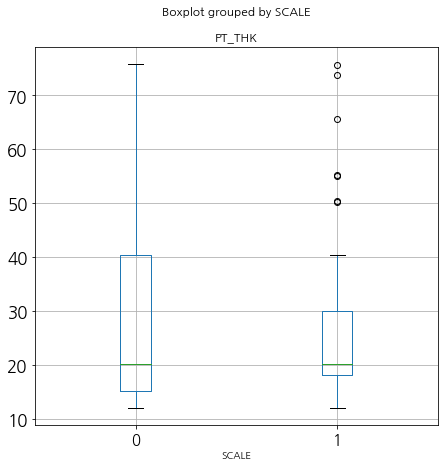


귀무 가설 : 변수 PT_THK의 불량과 양품 평균의 차이는 유의하지 않다
대립 가설 : 변수 PT_THK의 불량과 양품 평균의 차이는 유의하다.

 P-value : 2.1346915018479784e-05

PT_THK는 유의수준 0.05에서 유의한 차이를 가진다.

--------------------- 2 Sample T-test result ----------------------------



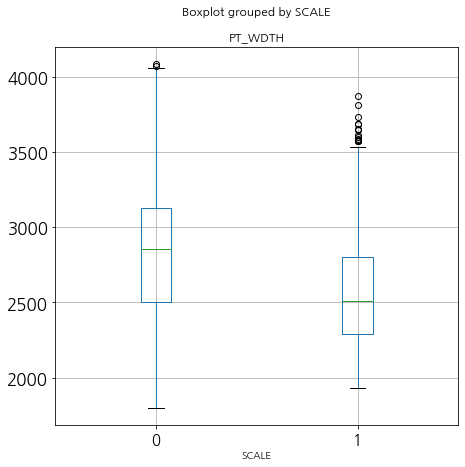


귀무 가설 : 변수 PT_WDTH의 불량과 양품 평균의 차이는 유의하지 않다
대립 가설 : 변수 PT_WDTH의 불량과 양품 평균의 차이는 유의하다.

 P-value : 1.5322731200544647e-08

PT_WDTH는 유의수준 0.05에서 유의한 차이를 가진다.

--------------------- 2 Sample T-test result ----------------------------



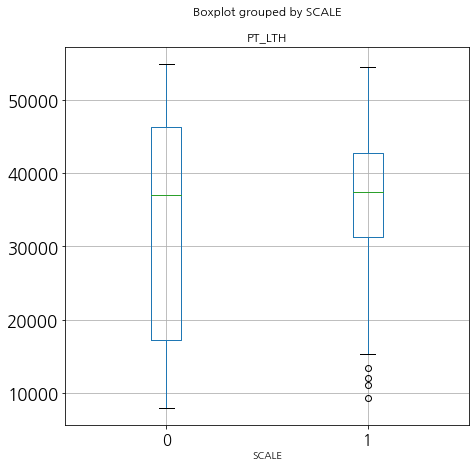


귀무 가설 : 변수 PT_LTH의 불량과 양품 평균의 차이는 유의하지 않다
대립 가설 : 변수 PT_LTH의 불량과 양품 평균의 차이는 유의하다.

 P-value : 0.0011056953174679277

PT_LTH는 유의수준 0.05에서 유의한 차이를 가진다.

--------------------- 2 Sample T-test result ----------------------------



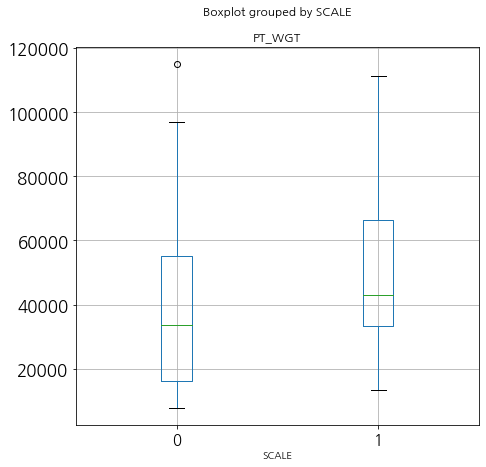


귀무 가설 : 변수 PT_WGT의 불량과 양품 평균의 차이는 유의하지 않다
대립 가설 : 변수 PT_WGT의 불량과 양품 평균의 차이는 유의하다.

 P-value : 3.2589759699139107e-07

PT_WGT는 유의수준 0.05에서 유의한 차이를 가진다.

--------------------- 2 Sample T-test result ----------------------------



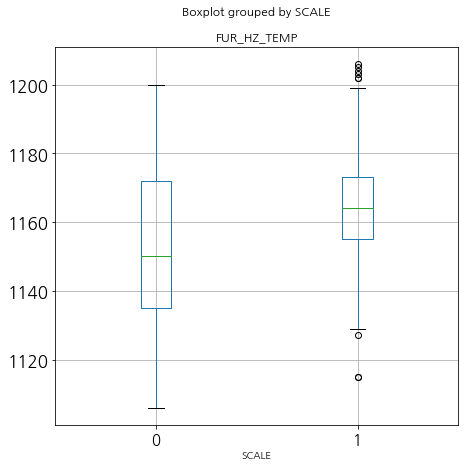


귀무 가설 : 변수 FUR_HZ_TEMP의 불량과 양품 평균의 차이는 유의하지 않다
대립 가설 : 변수 FUR_HZ_TEMP의 불량과 양품 평균의 차이는 유의하다.

 P-value : 3.684484557853379e-11

FUR_HZ_TEMP는 유의수준 0.05에서 유의한 차이를 가진다.

--------------------- 2 Sample T-test result ----------------------------



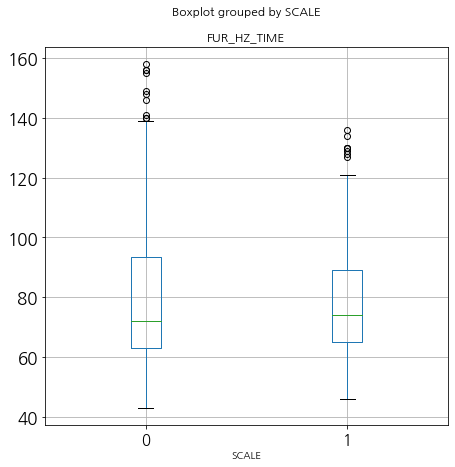


귀무 가설 : 변수 FUR_HZ_TIME의 불량과 양품 평균의 차이는 유의하지 않다
대립 가설 : 변수 FUR_HZ_TIME의 불량과 양품 평균의 차이는 유의하다.

 P-value : 0.25230926444571733

FUR_HZ_TIME는 유의수준 0.05에서 유의한 차이를 가지지 않는다.

--------------------- 2 Sample T-test result ----------------------------



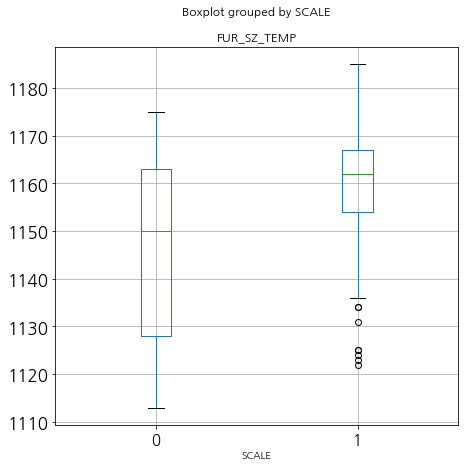


귀무 가설 : 변수 FUR_SZ_TEMP의 불량과 양품 평균의 차이는 유의하지 않다
대립 가설 : 변수 FUR_SZ_TEMP의 불량과 양품 평균의 차이는 유의하다.

 P-value : 1.2649677596047324e-21

FUR_SZ_TEMP는 유의수준 0.05에서 유의한 차이를 가진다.

--------------------- 2 Sample T-test result ----------------------------



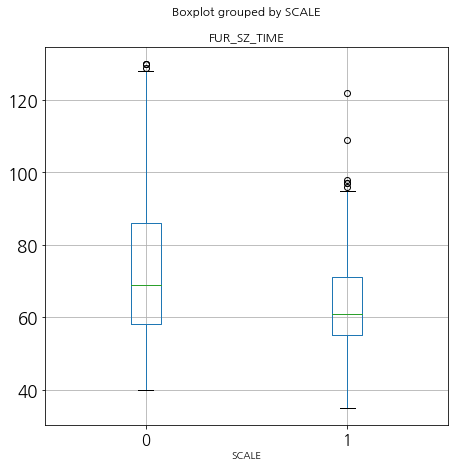


귀무 가설 : 변수 FUR_SZ_TIME의 불량과 양품 평균의 차이는 유의하지 않다
대립 가설 : 변수 FUR_SZ_TIME의 불량과 양품 평균의 차이는 유의하다.

 P-value : 1.7069850208347798e-09

FUR_SZ_TIME는 유의수준 0.05에서 유의한 차이를 가진다.

--------------------- 2 Sample T-test result ----------------------------



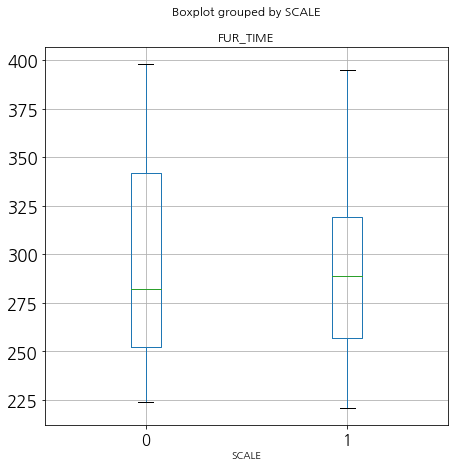


귀무 가설 : 변수 FUR_TIME의 불량과 양품 평균의 차이는 유의하지 않다
대립 가설 : 변수 FUR_TIME의 불량과 양품 평균의 차이는 유의하다.

 P-value : 0.3839563865271389

FUR_TIME는 유의수준 0.05에서 유의한 차이를 가지지 않는다.

--------------------- 2 Sample T-test result ----------------------------



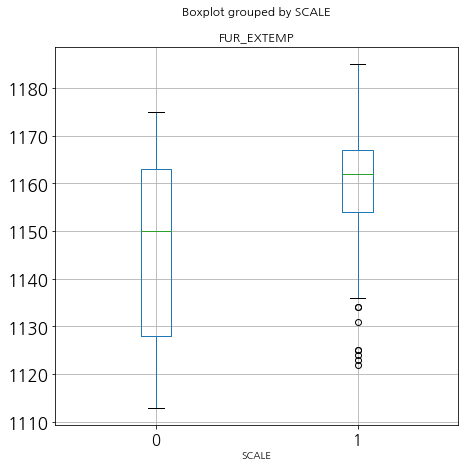


귀무 가설 : 변수 FUR_EXTEMP의 불량과 양품 평균의 차이는 유의하지 않다
대립 가설 : 변수 FUR_EXTEMP의 불량과 양품 평균의 차이는 유의하다.

 P-value : 1.2649677596047324e-21

FUR_EXTEMP는 유의수준 0.05에서 유의한 차이를 가진다.

--------------------- 2 Sample T-test result ----------------------------



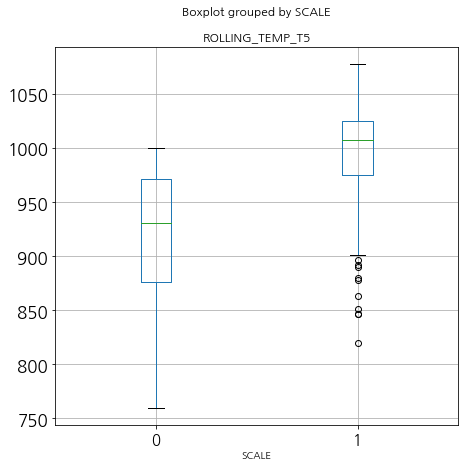


귀무 가설 : 변수 ROLLING_TEMP_T5의 불량과 양품 평균의 차이는 유의하지 않다
대립 가설 : 변수 ROLLING_TEMP_T5의 불량과 양품 평균의 차이는 유의하다.

 P-value : 4.493756999304558e-52

ROLLING_TEMP_T5는 유의수준 0.05에서 유의한 차이를 가진다.

--------------------- 2 Sample T-test result ----------------------------



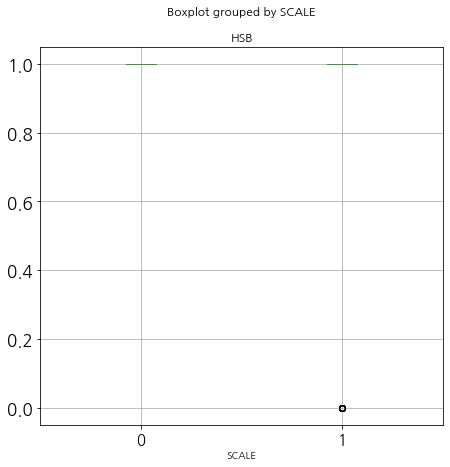


귀무 가설 : 변수 HSB의 불량과 양품 평균의 차이는 유의하지 않다
대립 가설 : 변수 HSB의 불량과 양품 평균의 차이는 유의하다.

 P-value : 4.951960761859429e-14

HSB는 유의수준 0.05에서 유의한 차이를 가진다.

['PT_THK', 'PT_WDTH', 'PT_LTH', 'PT_WGT', 'FUR_HZ_TEMP', 'FUR_SZ_TEMP', 'FUR_SZ_TIME', 'FUR_EXTEMP', 'ROLLING_TEMP_T5', 'HSB']


In [316]:
t_test(sca)

In [ ]:
def draw_col(df, steel_kind, spec, num):
    df = df[df['강종']==steel_kind]
    df= df[df['제품규격'] ==spec]
    
    if len(df) <= num:
        print('규격 :{} 분석에 필요한 데이터 수보다 작습니다.'.format(spec))
        print('제품 총갯수 : {}'.format(len(df)))
    else:
        print('제품 총갯수 : {}'.format(len(df)))
        numeric_cols = df.select_dtypes(exclude = 'object')

        col_sum =len(numeric_cols.columns)

        nrows1= (col_sum // 4) + 1
        n = 0
        m = 0
        print('불량 갯수 : {}'.format(len(numeric_cols[numeric_cols['SCALE']==1])))
        fig, ax = plt.subplots(nrows1 , 4 , figsize = ( 20,15))
        plt.suptitle('강종: {}, 제품규격 : {}'.format(steel_kind, spec))
        fig.subplots_adjust(top=0.95)
        for i in numeric_cols.columns:
            pro = numeric_cols[numeric_cols['SCALE']==1]
            
            no = numeric_cols[numeric_cols['SCALE']==0]

    #         print(n,m)
            ax[n,m].hist(no[i]  , color = 'blue',label = '양품', alpha = 0.5)
            ax[n,m].hist(pro[i] , color = 'red',label ='불량' ,alpha =0.5)
            ax[n,m].set_xlabel(i)
            ax[n,m].legend(loc ='upper right')
    
            m+=1 
            if m == 4:
                m = 0
                n +=1
            elif n == nrows1:
                break
        

In [61]:
def spec_draw(df, steel_kind, num):
    df = df[df['강종']== steel_kind]
    
    for i in df['제품규격'].unique():
        print('강종: {}, 제품규격 : {}'.format(steel_kind, i))
        print()
        draw_col(new_scale, steel_kind, i, num)
        print()

강종: C0, 제품규격 : BV-B

제품 총갯수 : 28
불량 갯수 : 6
강종: C0, 제품규격 : JS-SM490YB

제품 총갯수 : 84
불량 갯수 : 35
강종: C0, 제품규격 : LR-B

제품 총갯수 : 13
불량 갯수 : 6
강종: C0, 제품규격 : KR-B

규격 :KR-B 분석에 필요한 데이터 수보다 작습니다.
제품 총갯수 : 1
강종: C0, 제품규격 : LR-A

제품 총갯수 : 54
불량 갯수 : 11
강종: C0, 제품규격 : JS-SM490A

제품 총갯수 : 31
불량 갯수 : 25
강종: C0, 제품규격 : KS-SM400B

규격 :KS-SM400B 분석에 필요한 데이터 수보다 작습니다.
제품 총갯수 : 4
강종: C0, 제품규격 : JS-SM400B

규격 :JS-SM400B 분석에 필요한 데이터 수보다 작습니다.
제품 총갯수 : 5
강종: C0, 제품규격 : AB/B

규격 :AB/B 분석에 필요한 데이터 수보다 작습니다.
제품 총갯수 : 6
강종: C0, 제품규격 : KS-SS400

규격 :KS-SS400 분석에 필요한 데이터 수보다 작습니다.
제품 총갯수 : 5
강종: C0, 제품규격 : NV-A

제품 총갯수 : 48
불량 갯수 : 14
강종: C0, 제품규격 : KR-A

제품 총갯수 : 27
불량 갯수 : 17
강종: C0, 제품규격 : KS-SM400A

규격 :KS-SM400A 분석에 필요한 데이터 수보다 작습니다.
제품 총갯수 : 4
강종: C0, 제품규격 : JS-SS400

제품 총갯수 : 18
불량 갯수 : 16
강종: C0, 제품규격 : KS-SM490B

규격 :KS-SM490B 분석에 필요한 데이터 수보다 작습니다.
제품 총갯수 : 7
강종: C0, 제품규격 : JS-SM490YA

규격 :JS-SM490YA 분석에 필요한 데이터 수보다 작습니다.
제품 총갯수 : 5
강종: C0, 제품규격 : BV-AH32

제품 총갯수 : 14
불량 갯수 : 5
강종: C0, 제품규격 : AB/AH32

규

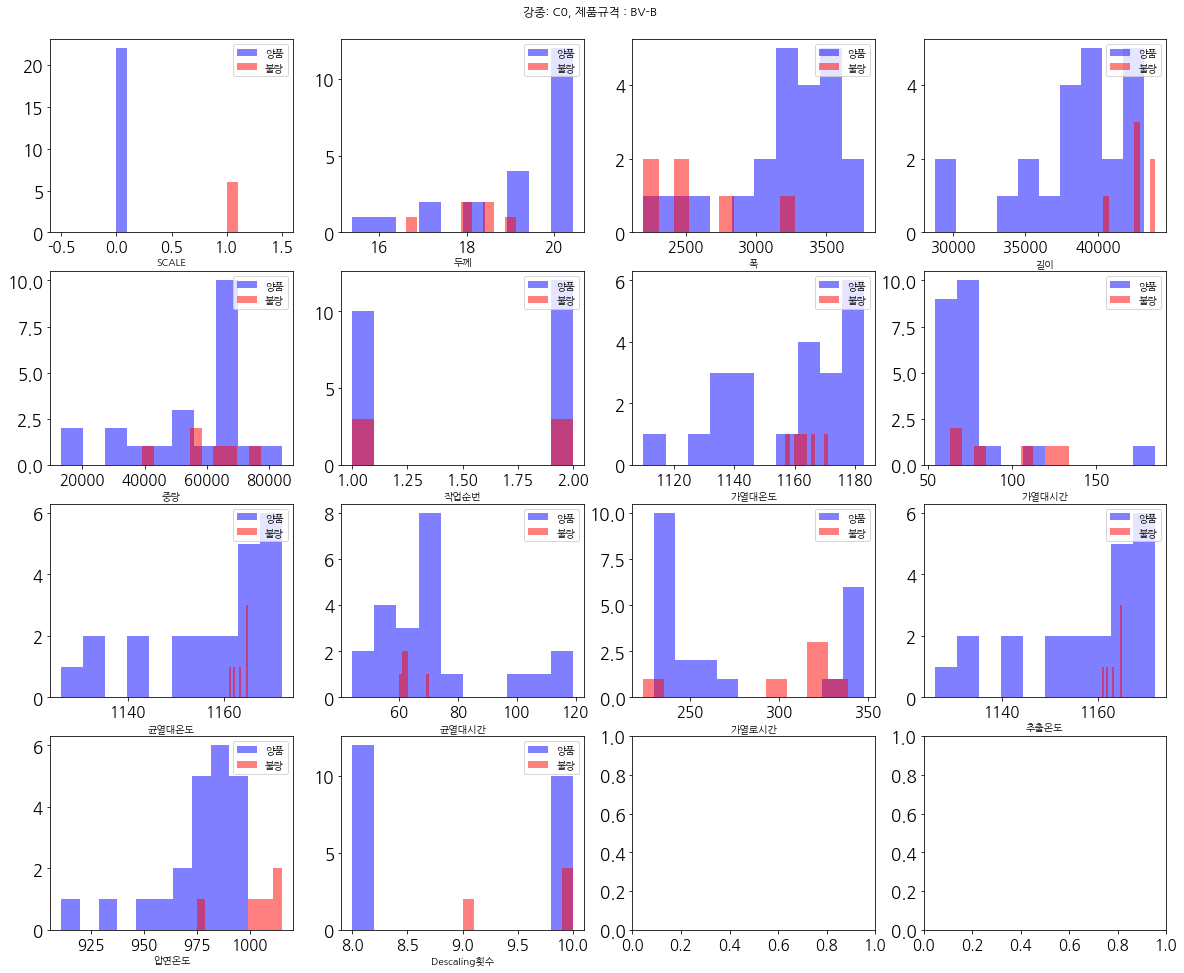

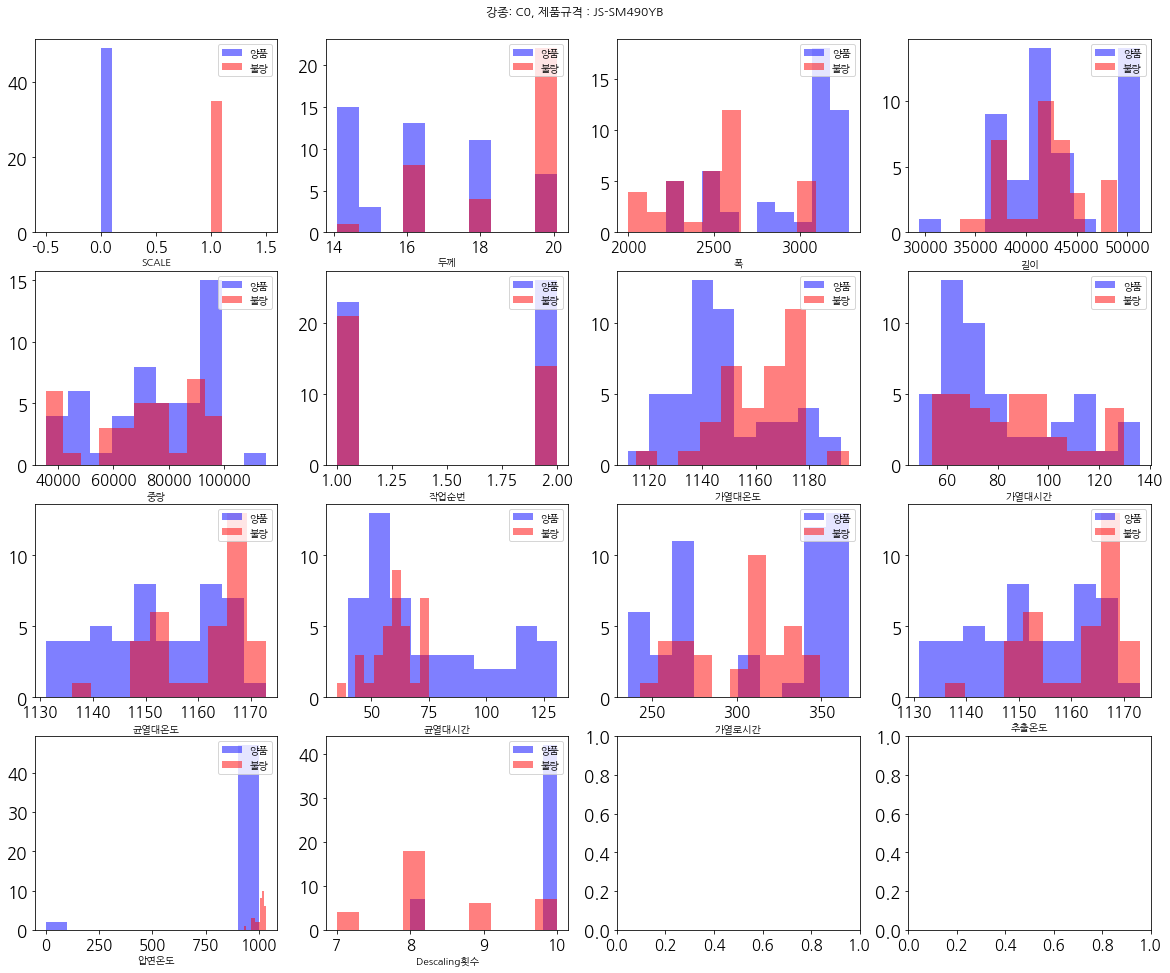

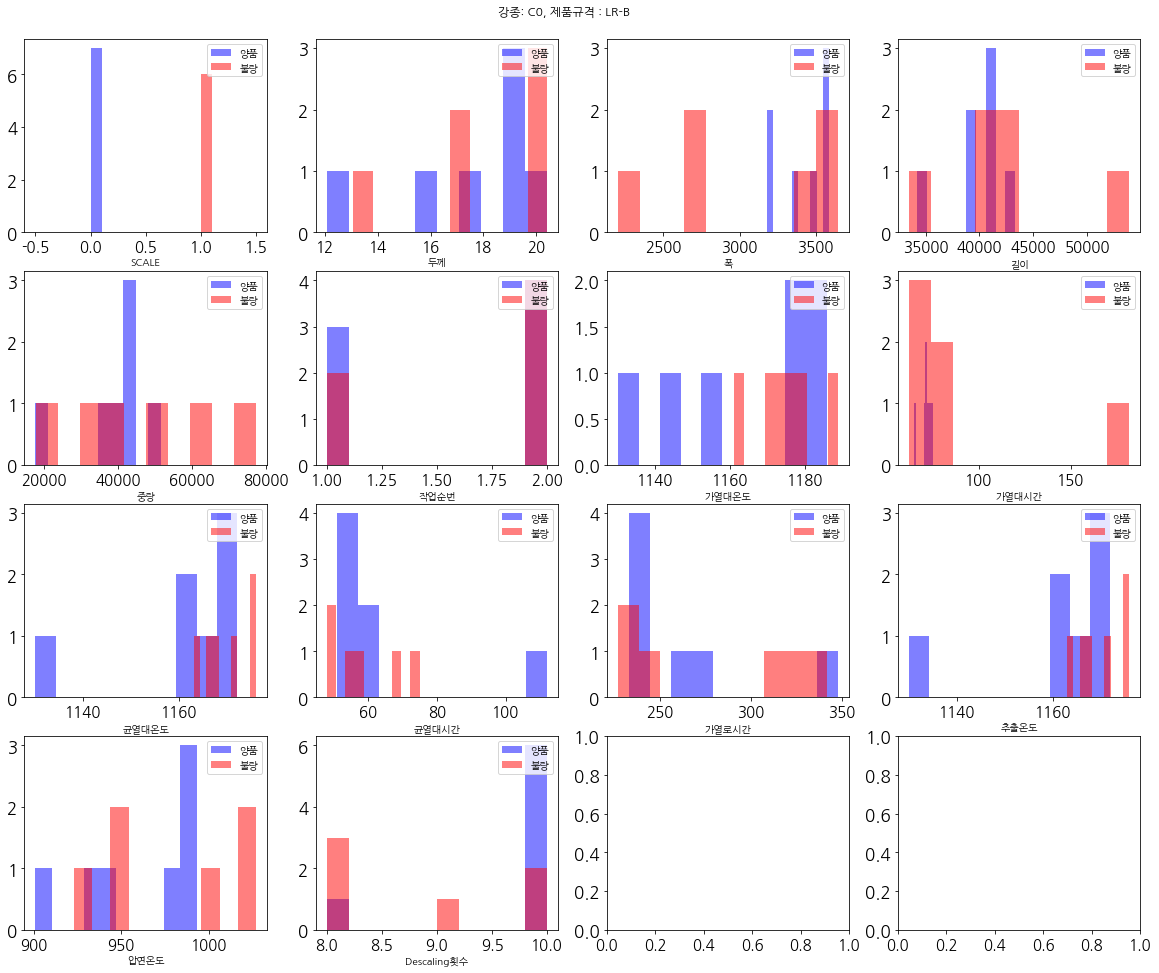

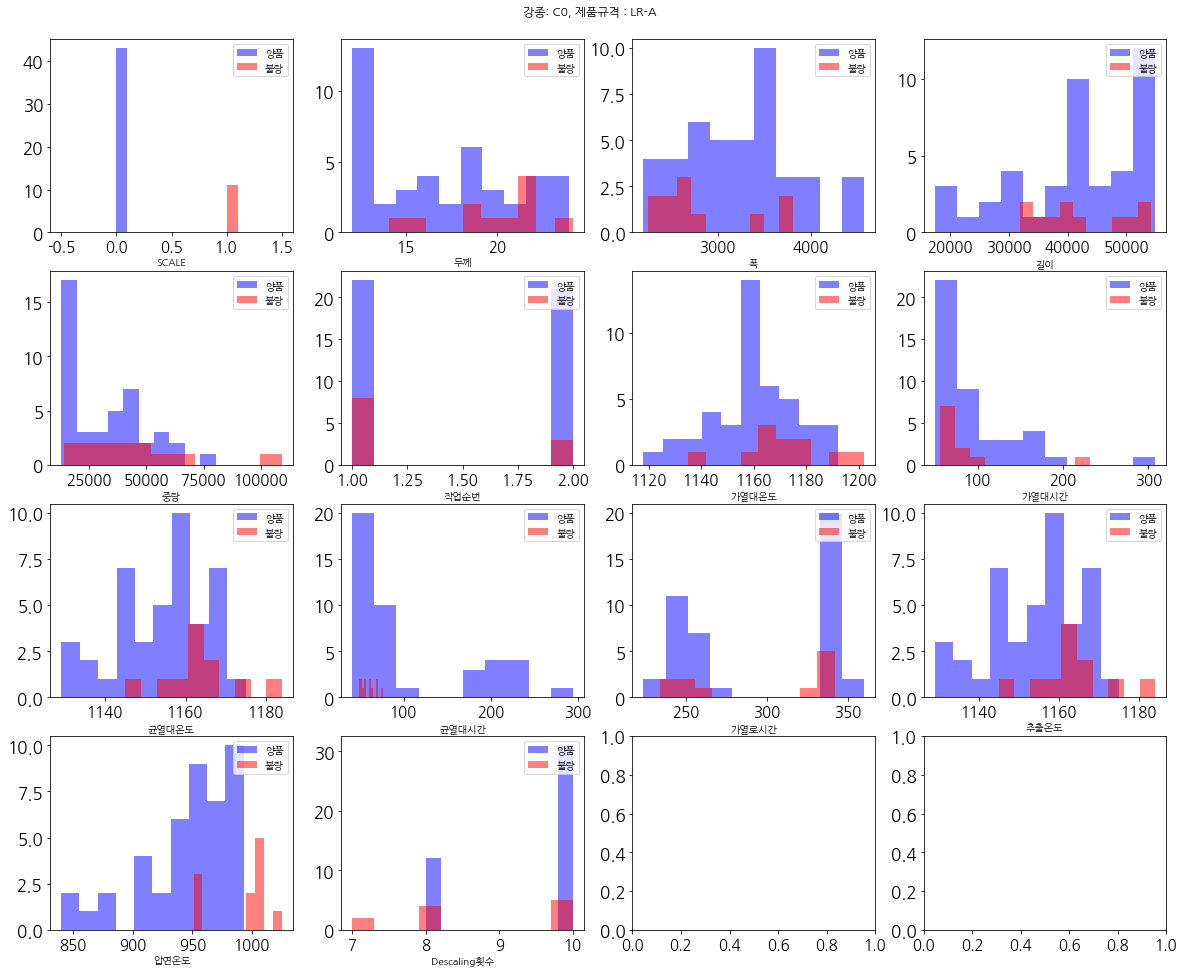

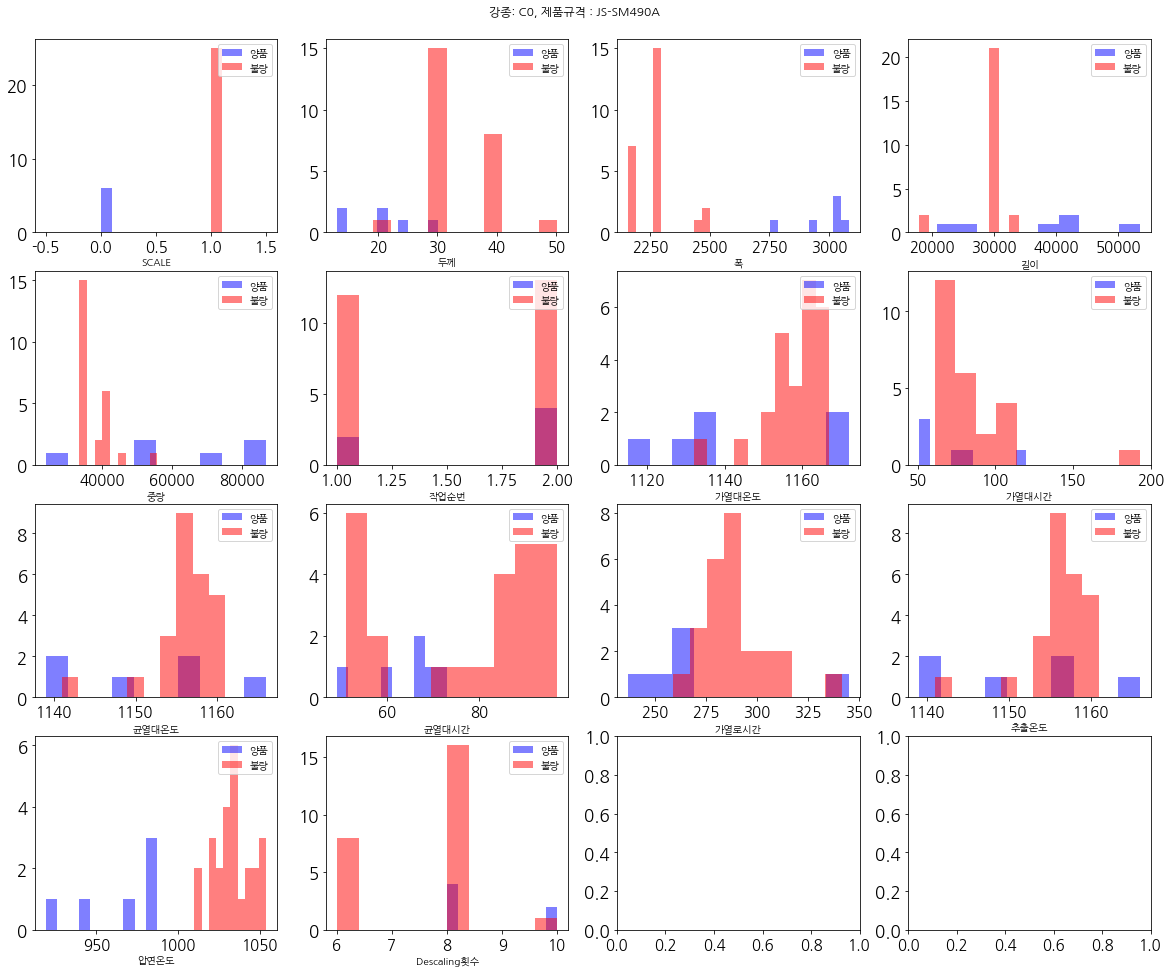

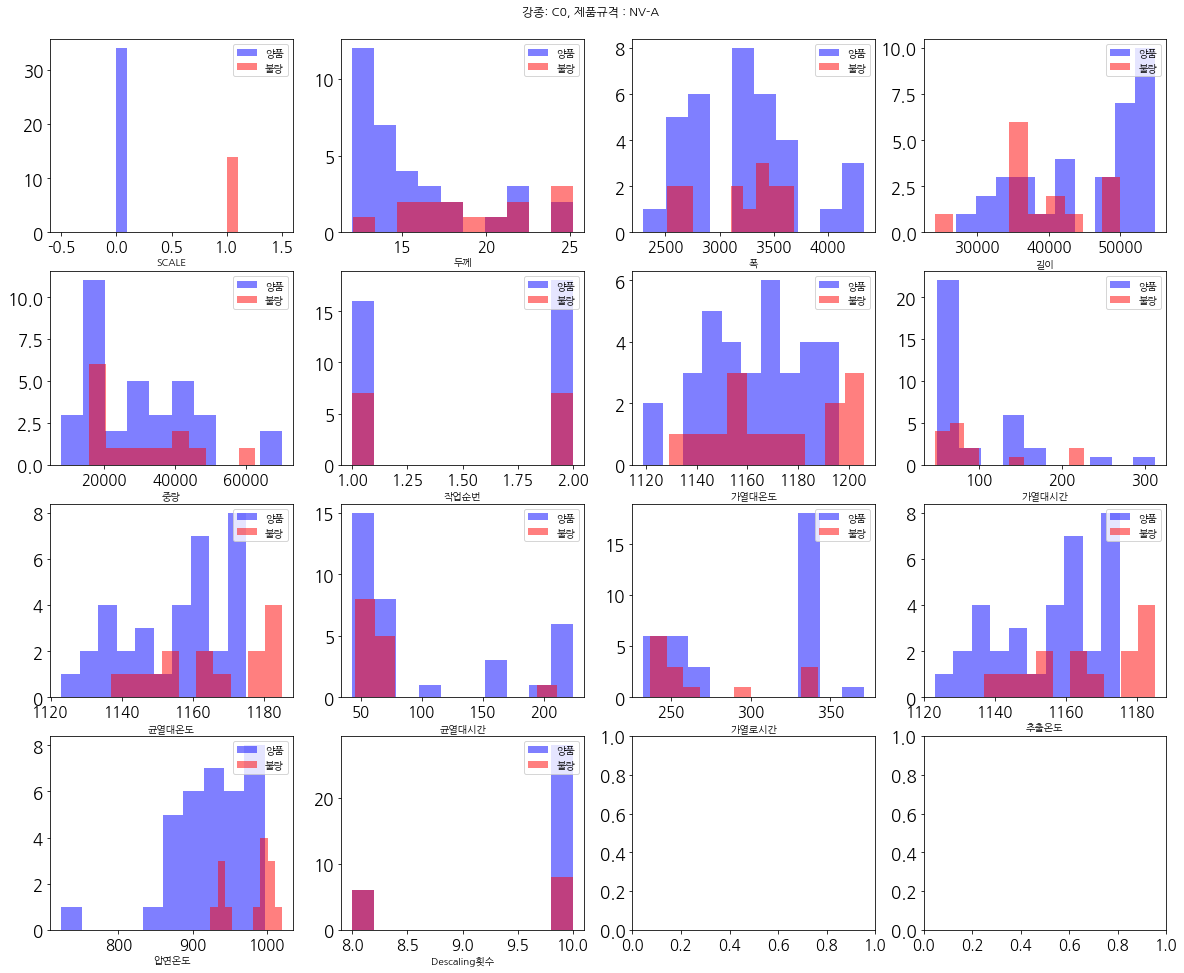

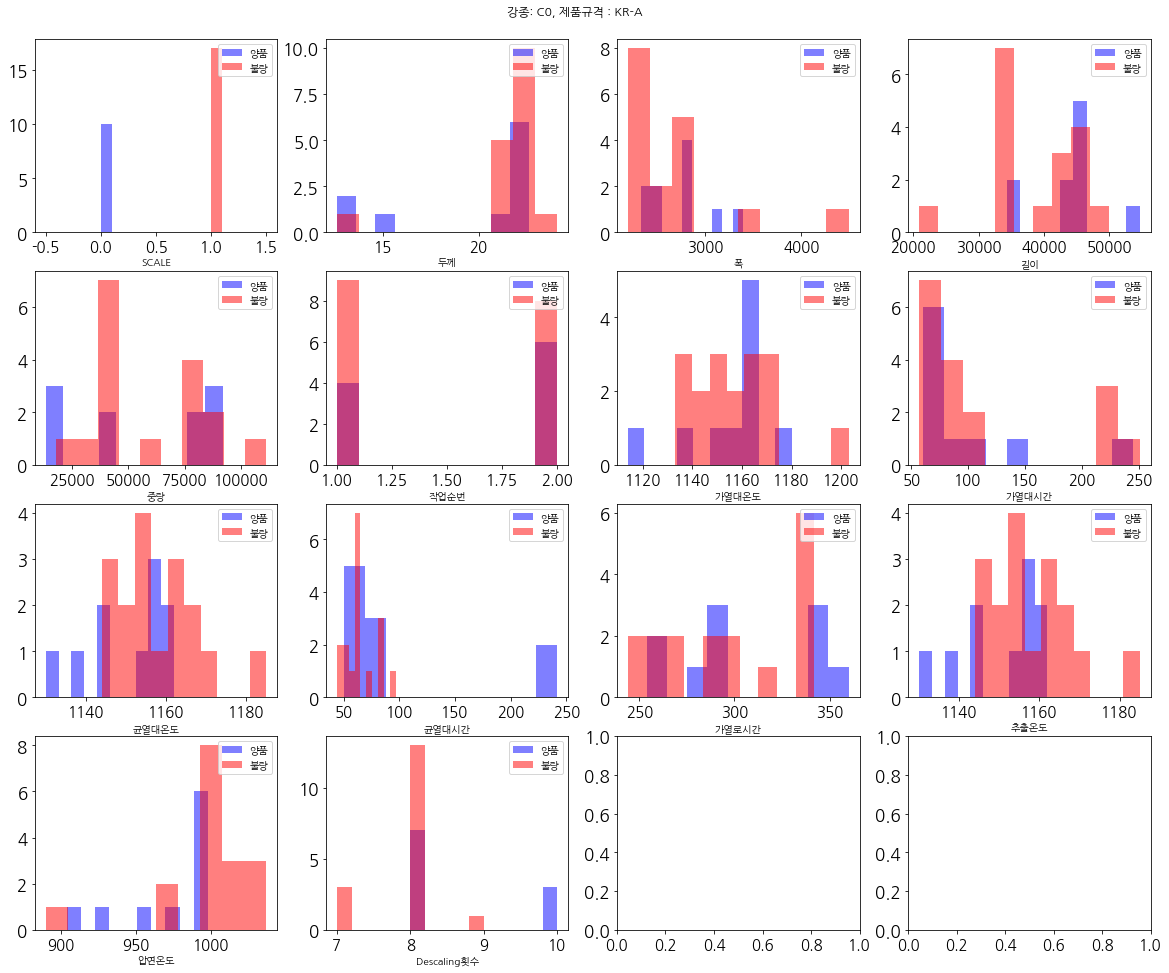

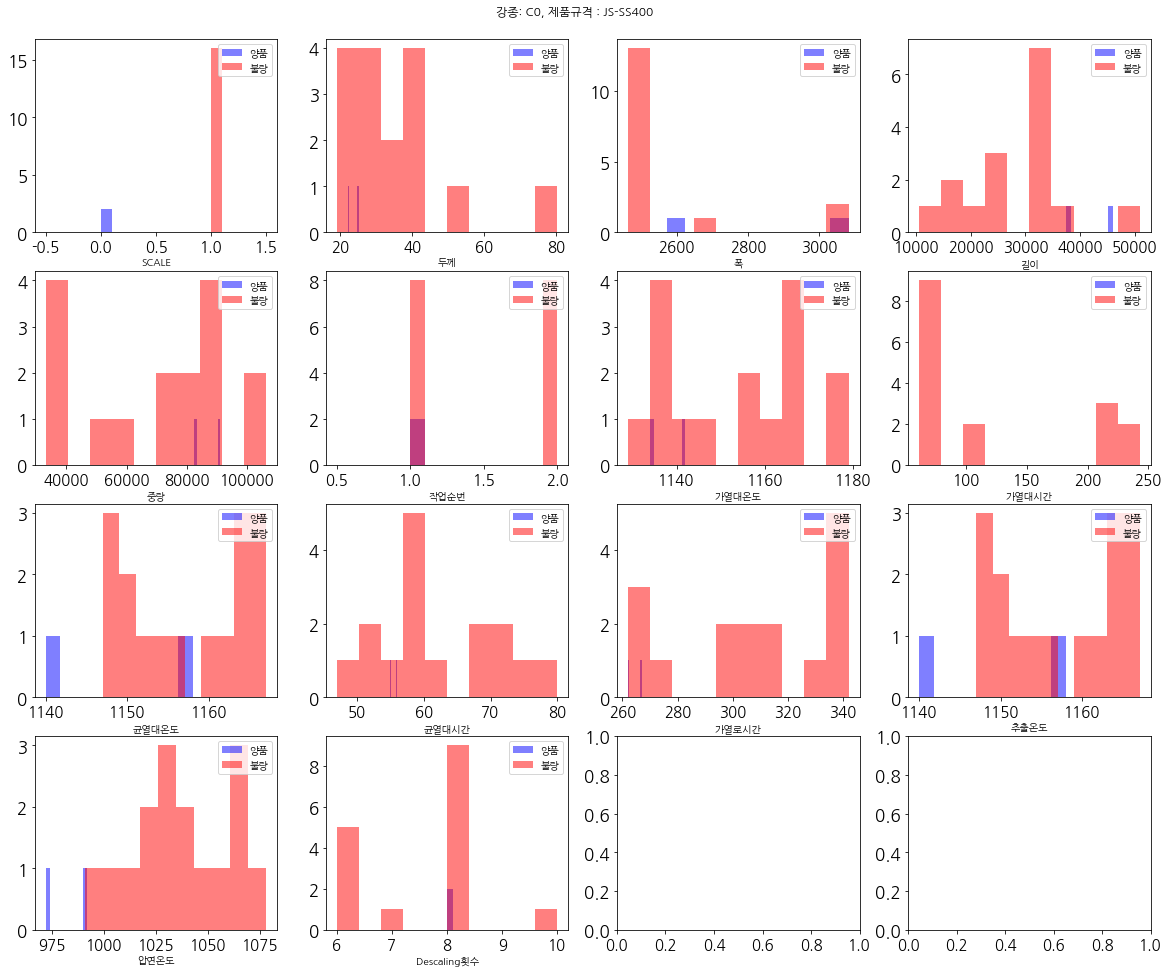

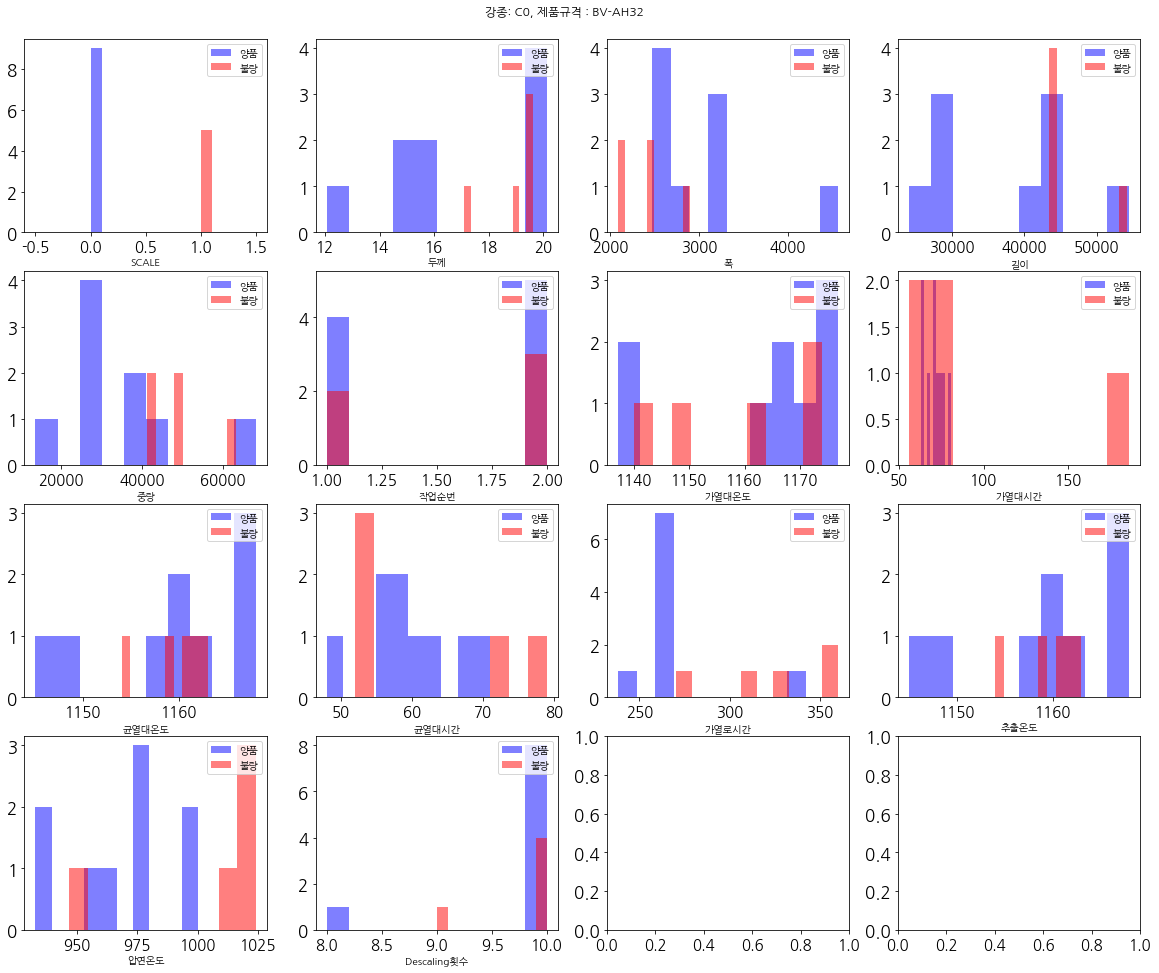

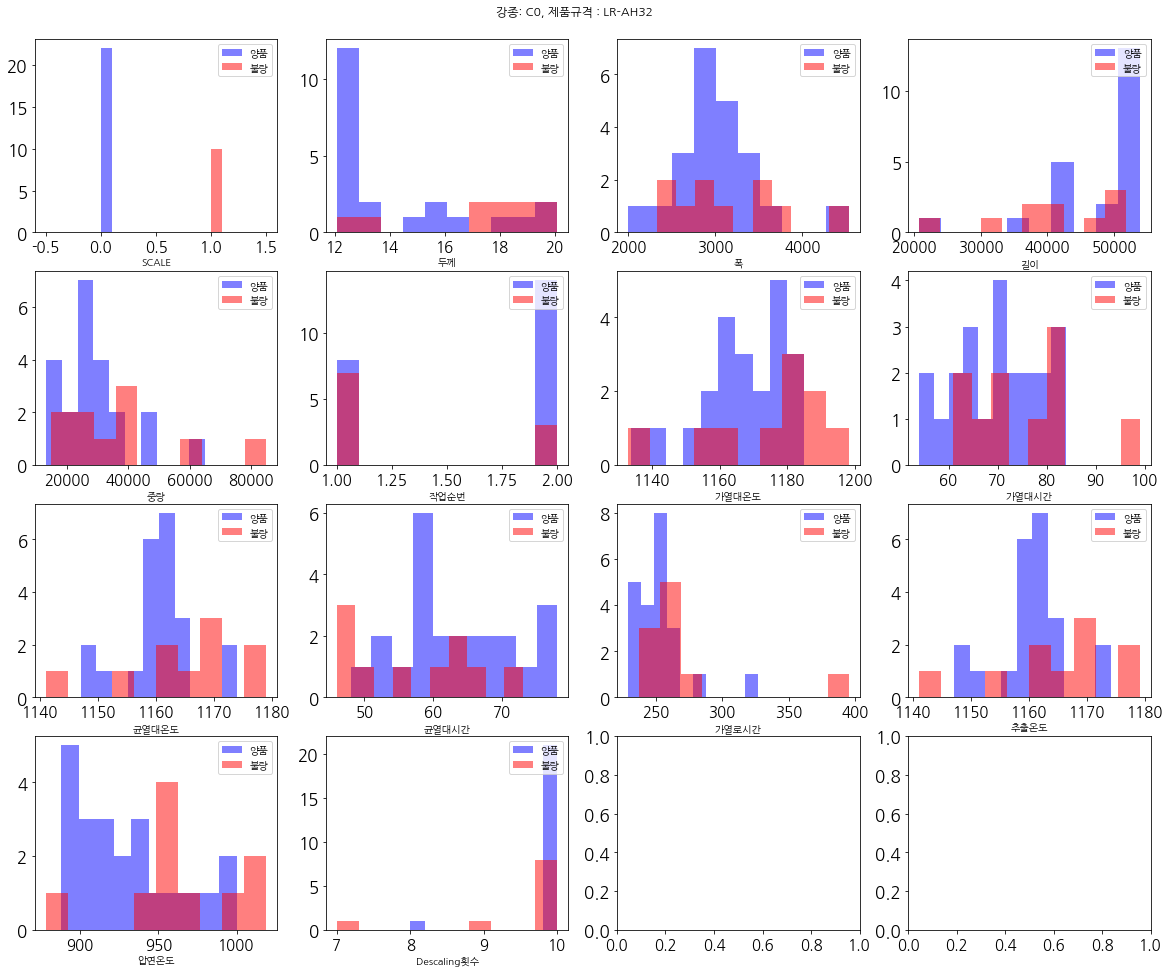

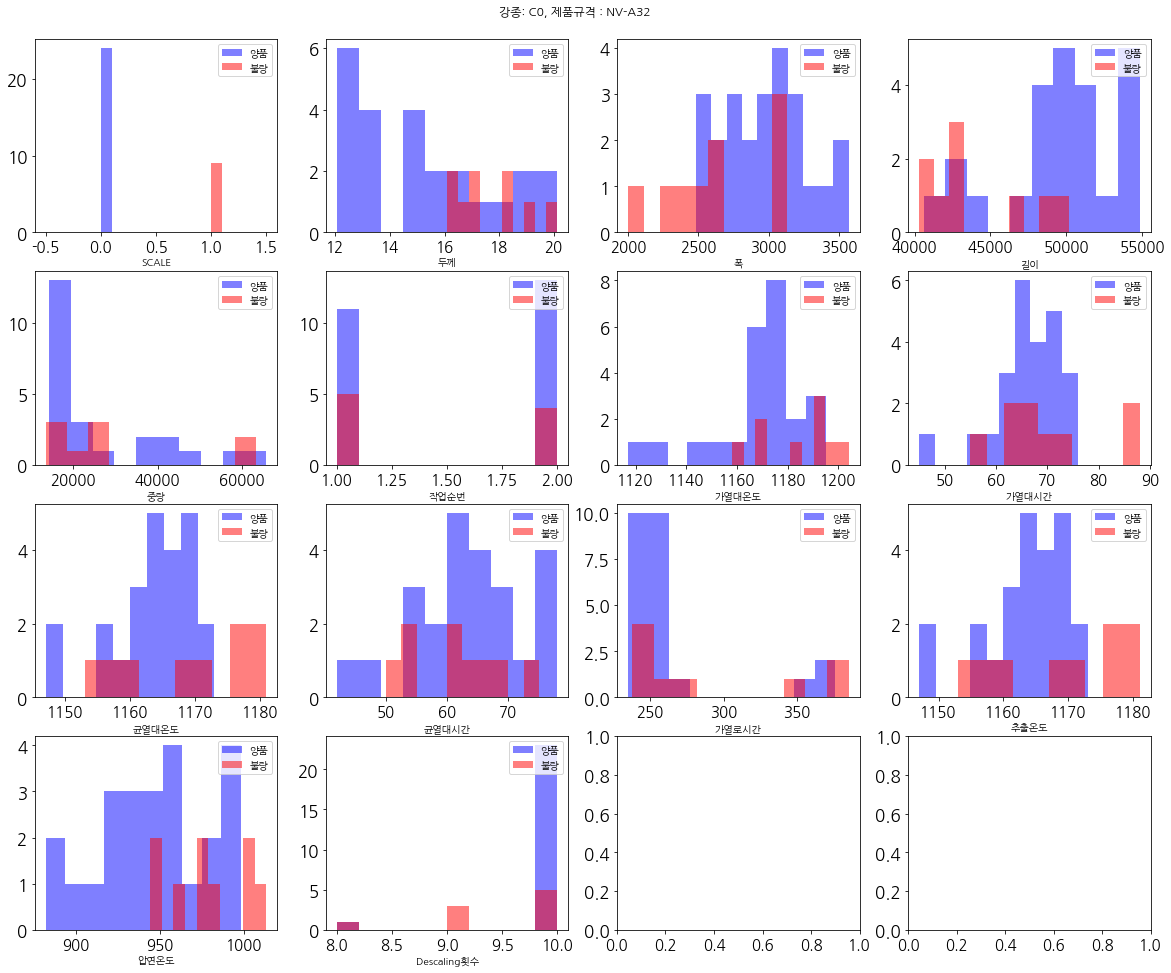

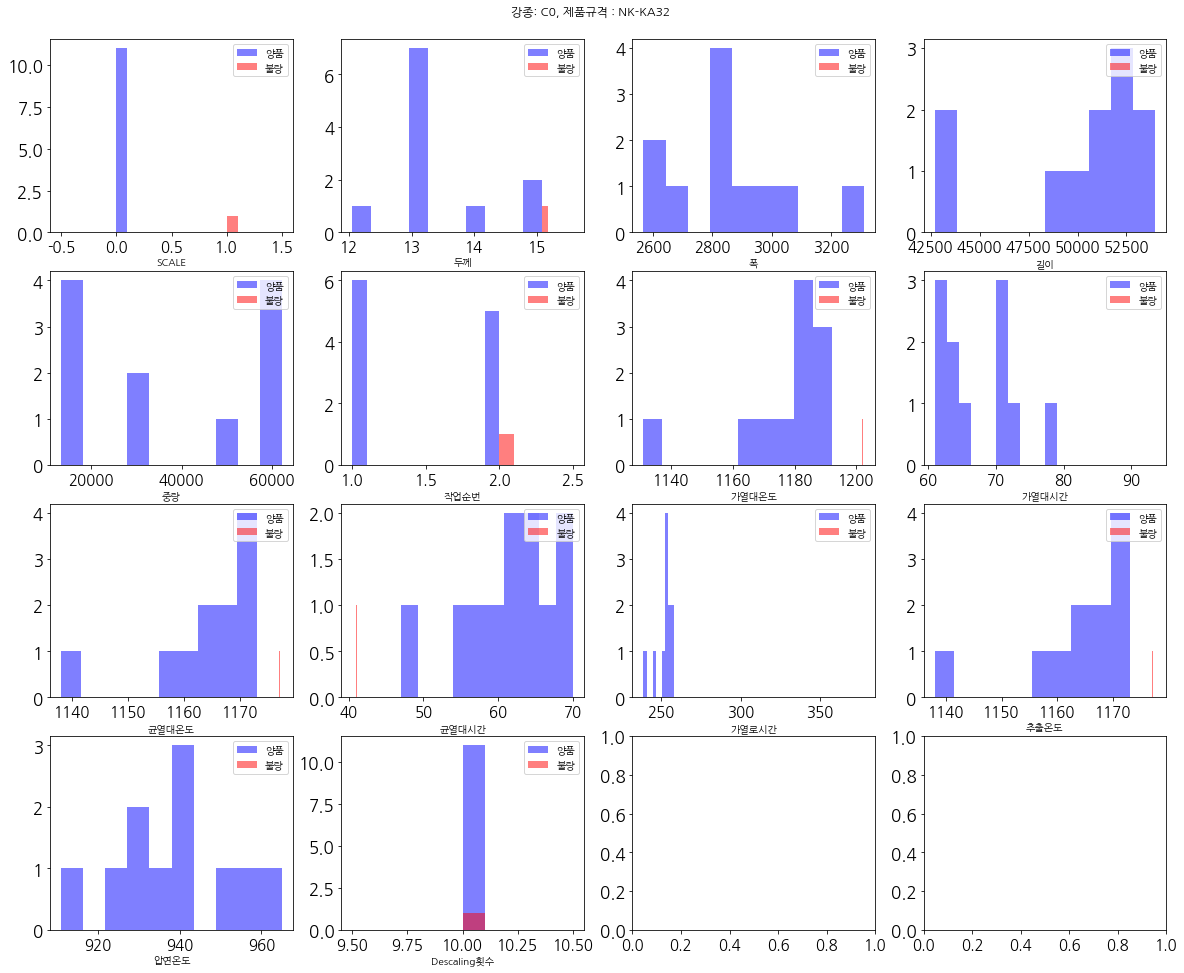

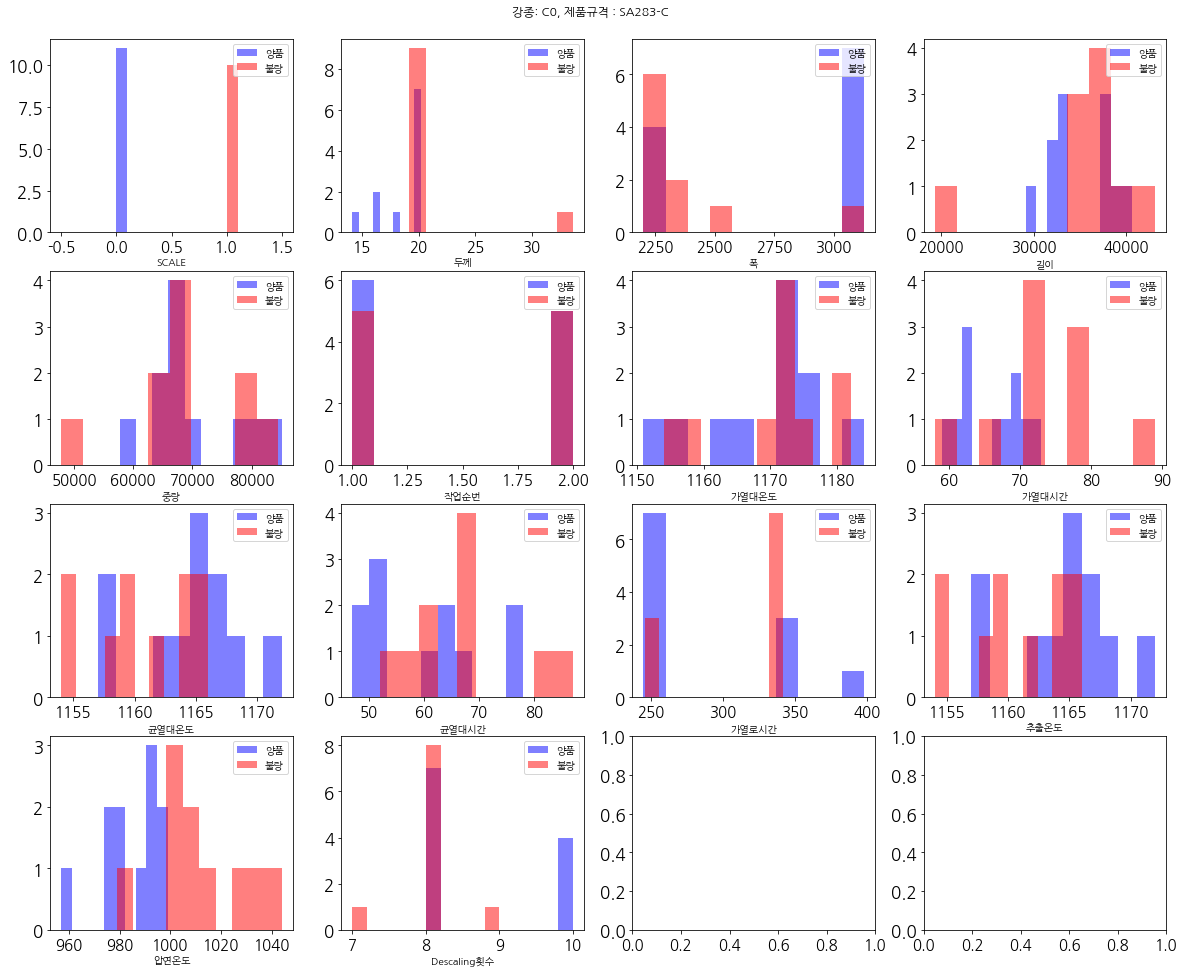

In [62]:
spec_draw(new_scale, 'C0',8)

강종: T5, 제품규격 : KS-HSB600

규격 :KS-HSB600 분석에 필요한 데이터 수보다 작습니다.
제품 총갯수 : 1
강종: T5, 제품규격 : KS-HSB500

규격 :KS-HSB500 분석에 필요한 데이터 수보다 작습니다.
제품 총갯수 : 2
강종: T5, 제품규격 : PILAC-BT33

제품 총갯수 : 40
불량 갯수 : 2


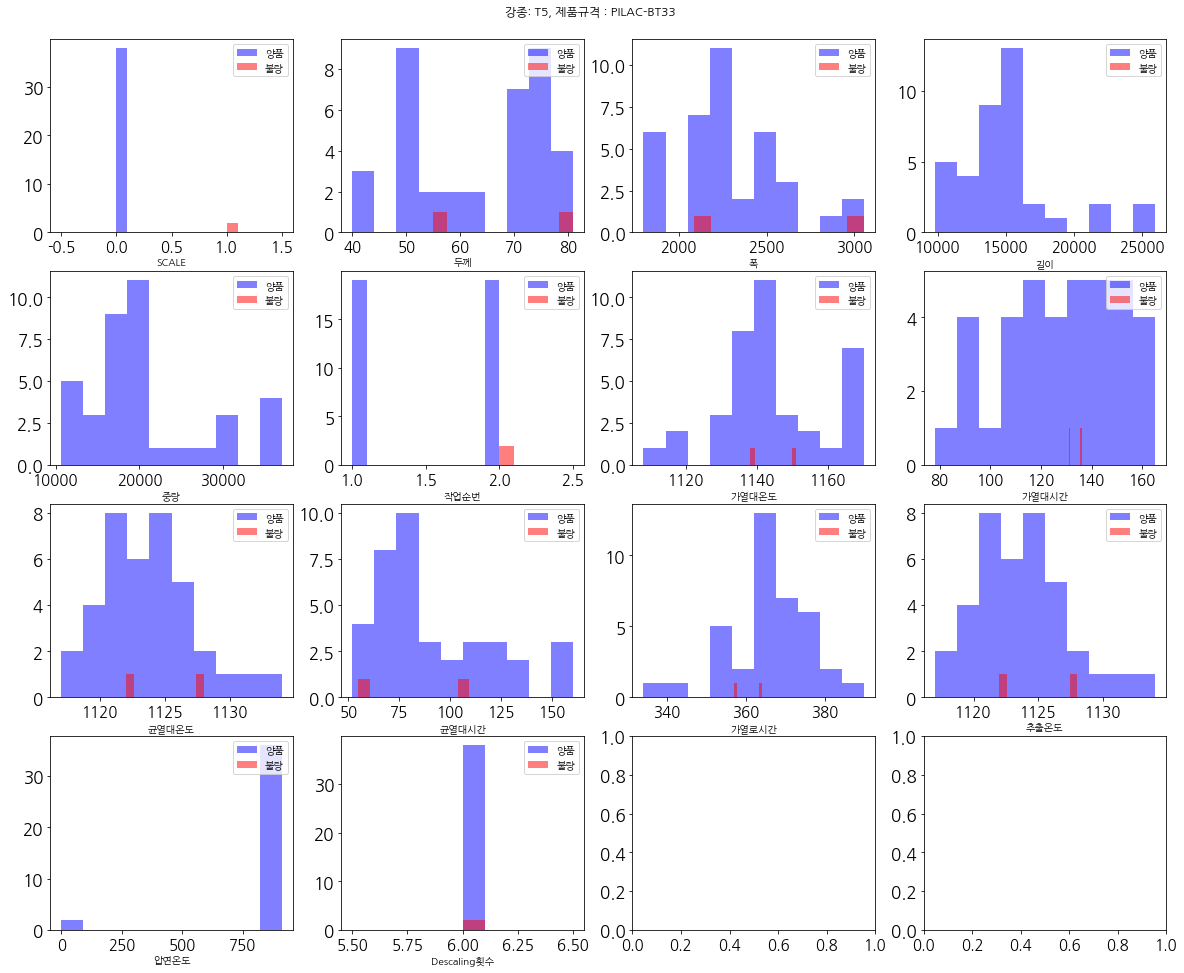

In [94]:
spec_draw(new_scale, 'T5', 5)

강종: T7, 제품규격 : NV-D36-TM

규격 :NV-D36-TM 분석에 필요한 데이터 수보다 작습니다.
제품 총갯수 : 5
강종: T7, 제품규격 : LR-AH36-TM

규격 :LR-AH36-TM 분석에 필요한 데이터 수보다 작습니다.
제품 총갯수 : 1
강종: T7, 제품규격 : GL-A36-TM

제품 총갯수 : 11
강종: T7, 제품규격 : NK-KD36-TM

규격 :NK-KD36-TM 분석에 필요한 데이터 수보다 작습니다.
제품 총갯수 : 2
강종: T7, 제품규격 : GL-D36-TM

규격 :GL-D36-TM 분석에 필요한 데이터 수보다 작습니다.
제품 총갯수 : 8
강종: T7, 제품규격 : NV-A36-TM

규격 :NV-A36-TM 분석에 필요한 데이터 수보다 작습니다.
제품 총갯수 : 2
강종: T7, 제품규격 : BV-AH36-TM

규격 :BV-AH36-TM 분석에 필요한 데이터 수보다 작습니다.
제품 총갯수 : 1
강종: T7, 제품규격 : A131-DH36TM

규격 :A131-DH36TM 분석에 필요한 데이터 수보다 작습니다.
제품 총갯수 : 1
강종: T7, 제품규격 : BV-AH36-TL

규격 :BV-AH36-TL 분석에 필요한 데이터 수보다 작습니다.
제품 총갯수 : 3
강종: T7, 제품규격 : COMMON

규격 :COMMON 분석에 필요한 데이터 수보다 작습니다.
제품 총갯수 : 1


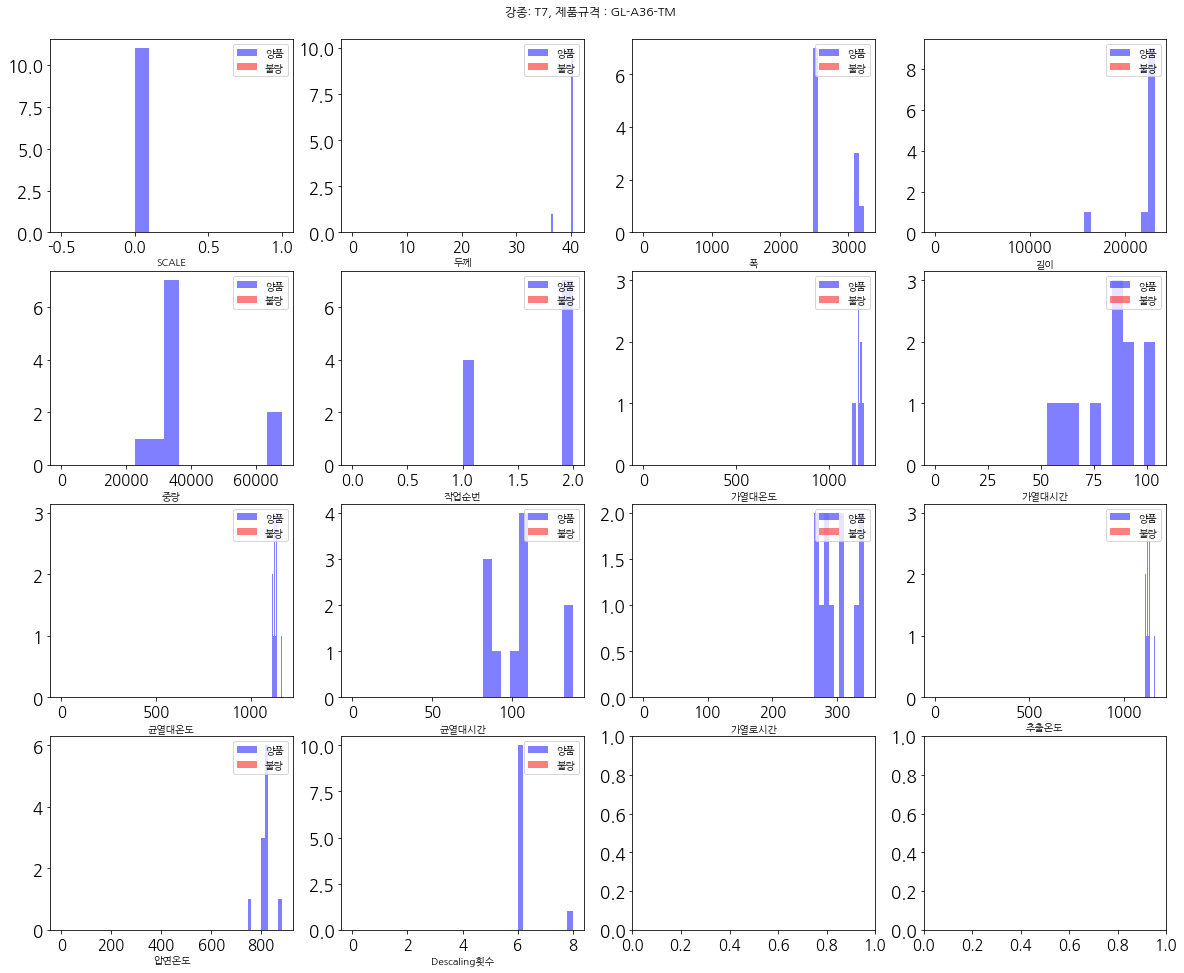

In [40]:
spec_draw(new_scale, 'T7')

강종: T8, 제품규격 : NV-E36-TM

규격 :NV-E36-TM 분석에 필요한 데이터 수보다 작습니다.
제품 총갯수 : 5
강종: T8, 제품규격 : BV-EH36-TM

제품 총갯수 : 35
강종: T8, 제품규격 : COMMON

제품 총갯수 : 20
강종: T8, 제품규격 : GL-E36-TM

제품 총갯수 : 16
강종: T8, 제품규격 : AB/EH36-TM

제품 총갯수 : 17
강종: T8, 제품규격 : LR-EH36-TM

규격 :LR-EH36-TM 분석에 필요한 데이터 수보다 작습니다.
제품 총갯수 : 2


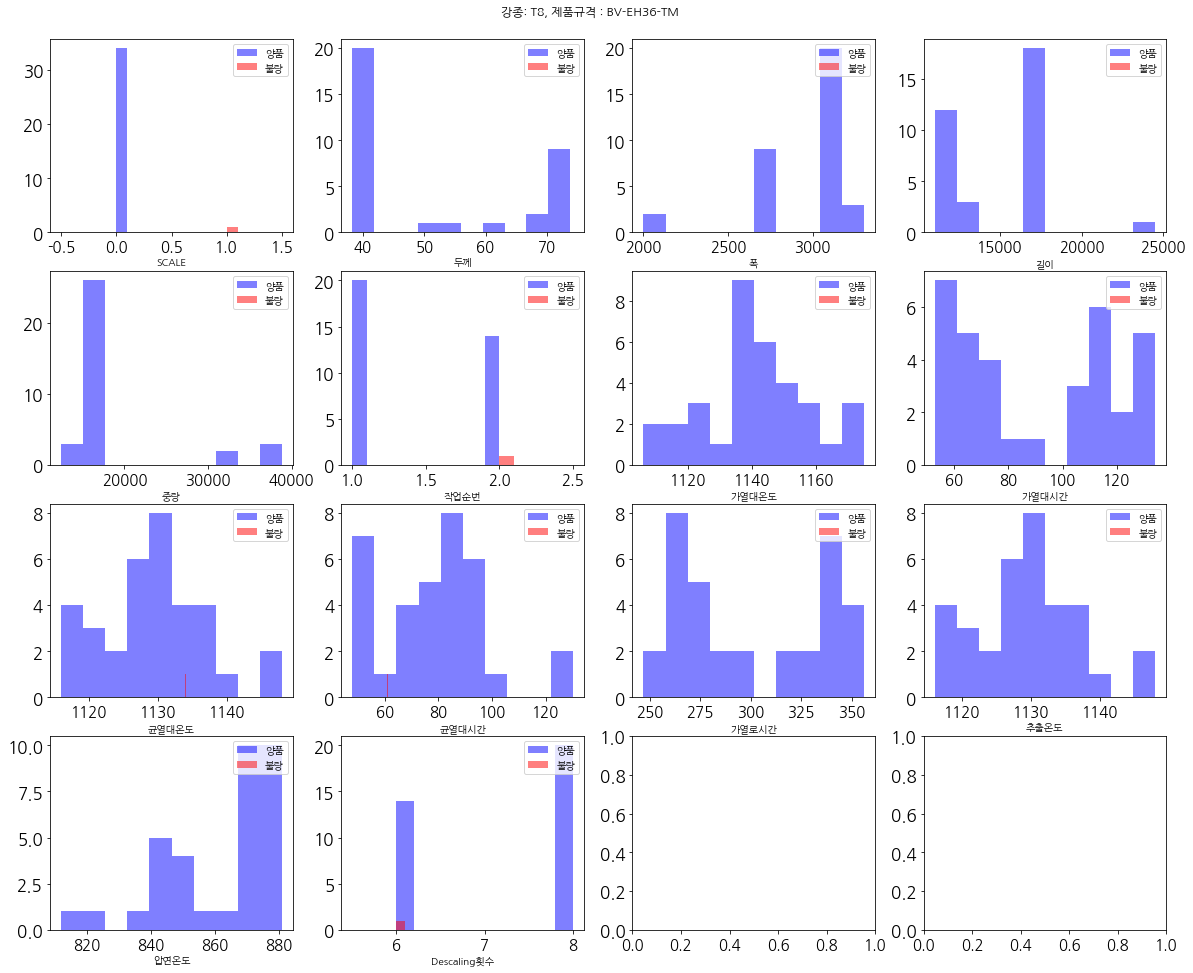

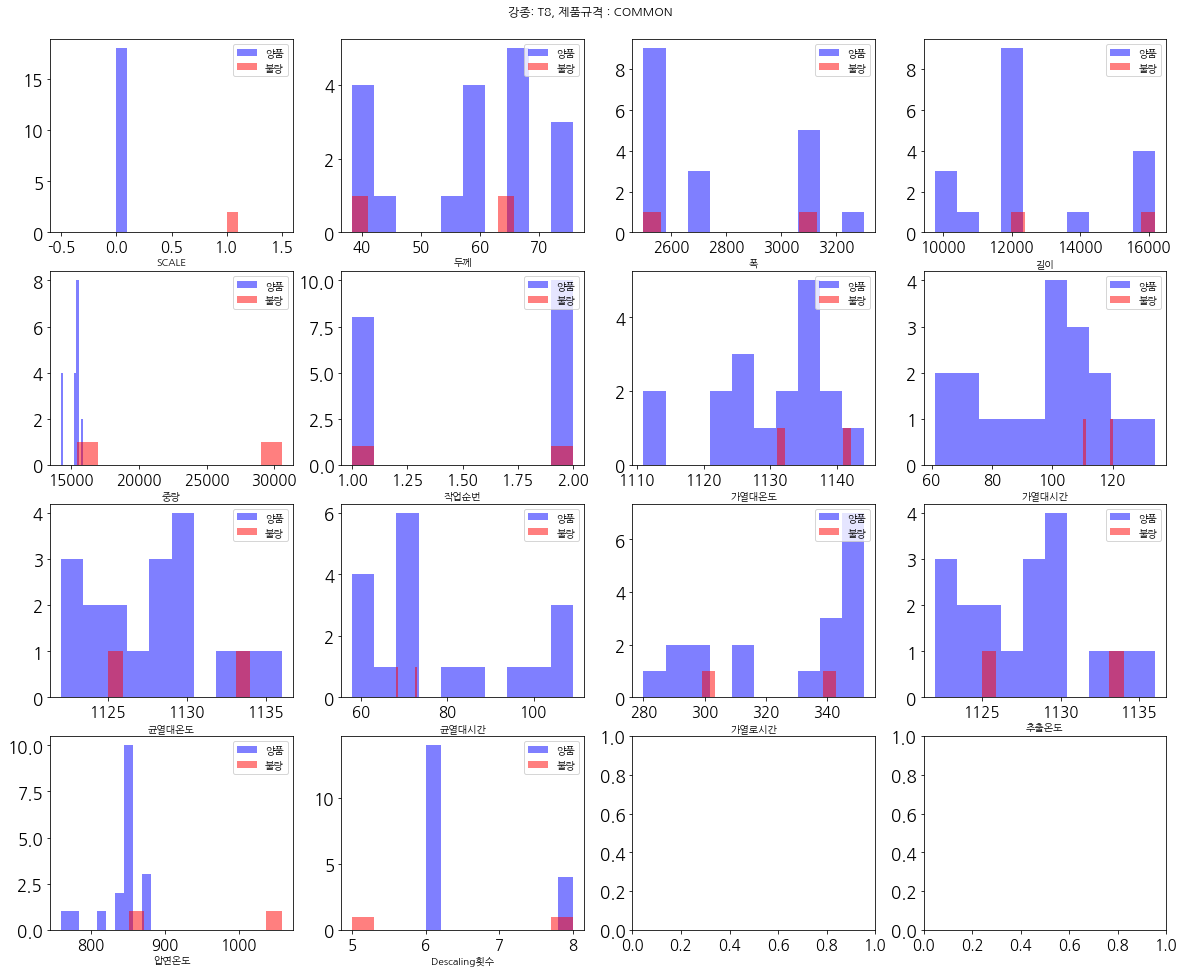

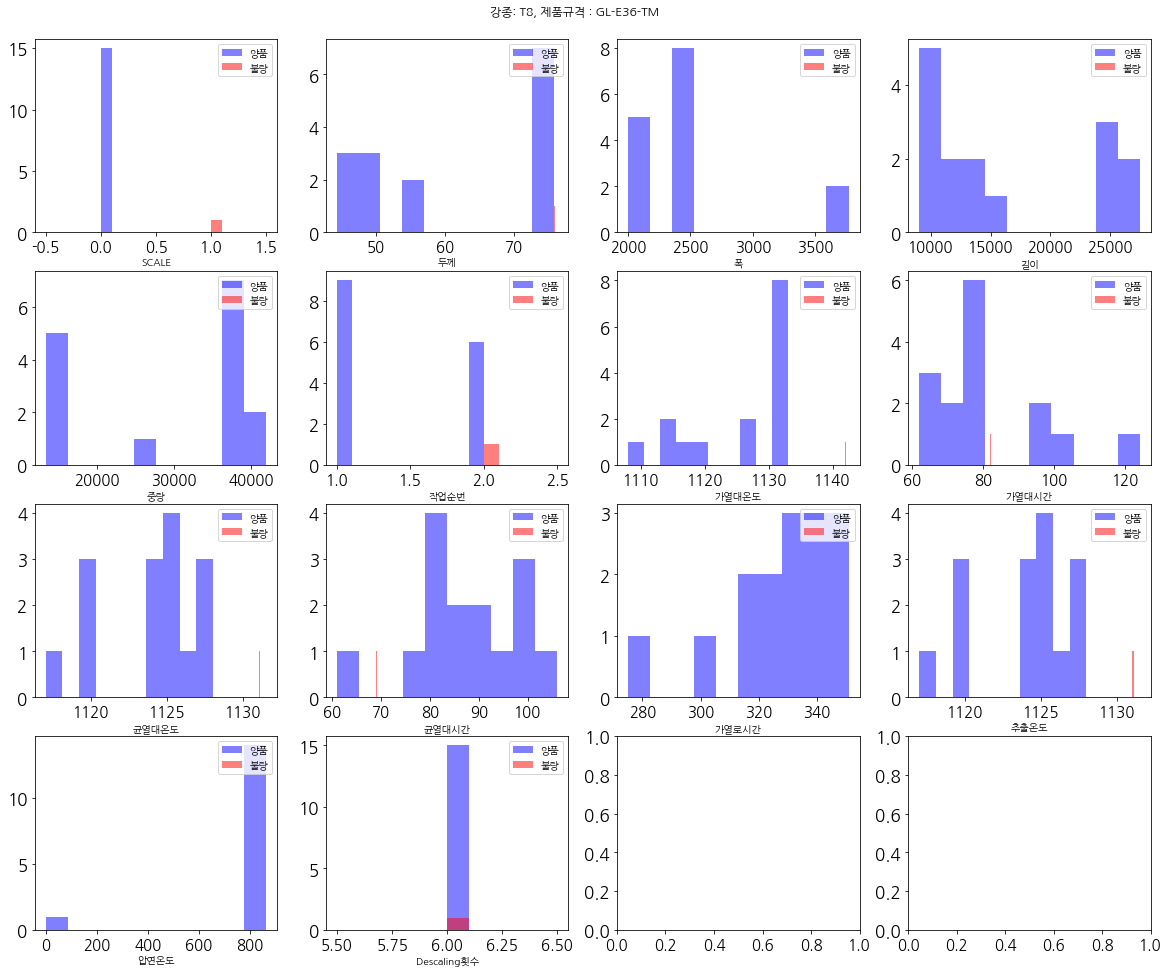

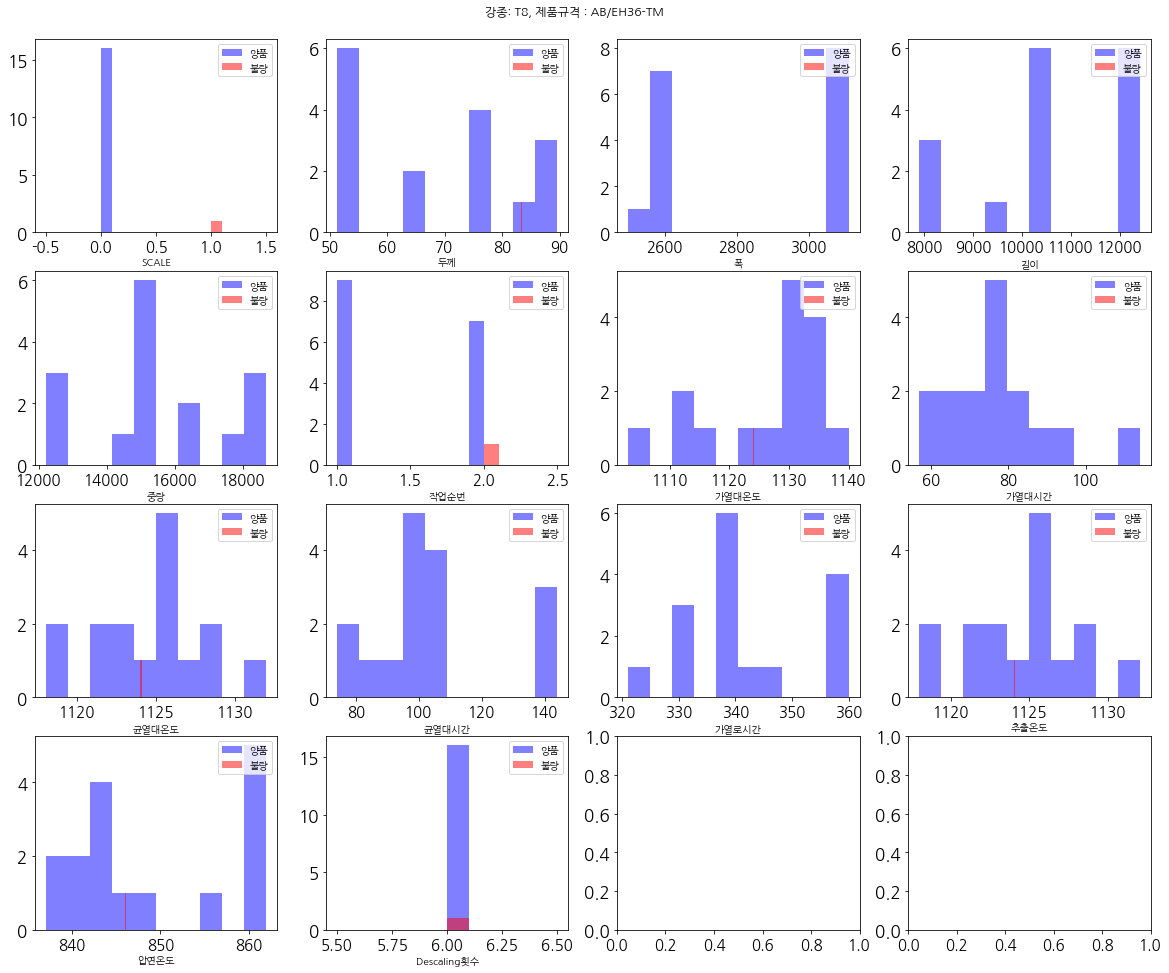

In [50]:
spec_draw(new_scale, 'T8', 5)

SCALE  PT_THK  PT_WDTH  PT_LTH  PT_WGT  FUR_HZ_TEMP  \
SCALE             1.00   -0.12    -0.21    0.10    0.22         0.25   
PT_THK           -0.12    1.00    -0.31   -0.86   -0.40        -0.52   
PT_WDTH          -0.21   -0.31     1.00    0.12    0.03         0.18   
PT_LTH            0.10   -0.86     0.12    1.00    0.45         0.47   
PT_WGT            0.22   -0.40     0.03    0.45    1.00         0.15   
FUR_HZ_TEMP       0.25   -0.52     0.18    0.47    0.15         1.00   
FUR_HZ_TIME       0.06    0.16    -0.12   -0.08    0.01        -0.11   
FUR_SZ_TEMP       0.37   -0.69     0.23    0.65    0.36         0.77   
FUR_SZ_TIME      -0.24    0.11     0.02   -0.07   -0.19        -0.22   
FUR_TIME         -0.05    0.41    -0.39   -0.25   -0.06        -0.35   
FUR_EXTEMP        0.37   -0.69     0.23    0.65    0.36         0.77   
ROLLING_TEMP_T5   0.38   -0.37    -0.02    0.31    0.26         0.27   
HSB              -0.32   -0.02    -0.04   -0.02    0.02        -0.04   

                 FUR_HZ_TIME  FUR_SZ_TEMP  FUR_SZ_TIME  FUR_TIME  FUR_EXTEMP  \
SCALE                   0.06         0.37        -0.24     -0.05        0.37   
PT_THK                  0.16        -0.69         0.11      0.41       -0.69   
PT_WDTH                -0.12         0.23         0.02     -0.39        0.23   
PT_LTH                 -0.08         0.65        -0.07     -0.25        0.65   
PT_WGT                  0.01         0.36        -0.19     -0.06        0.36   
FUR_HZ_TEMP            -0.11         0.77        -0.22     -0.35        0.77   
FUR_HZ_TIME             1.00        -0.20         0.18      0.47       -0.20   
FUR_SZ_TEMP            -0.20         1.00        -0.45     -0.48        1.00   
FUR_SZ_TIME             0.18        -0.45         1.00      0.44       -0.45   
FUR_TIME                0.47        -0.48         0.44      1.00       -0.48   
FUR_EXTEMP             -0.20         1.00        -0.45     -0.48        1.00   
ROLLING_TEMP_T5         0.01         0.45        -0.21     -0.20        0.45   
HSB                     0.01        -0.04        -0.01      0.00       -0.04   

                 ROLLING_TEMP_T5   HSB  
SCALE                       0.38 -0.32  
PT_THK                     -0.37 -0.02  
PT_WDTH                    -0.02 -0.04  
PT_LTH                      0.31 -0.02  
PT_WGT                      0.26  0.02  
FUR_HZ_TEMP                 0.27 -0.04  
FUR_HZ_TIME                 0.01  0.01  
FUR_SZ_TEMP                 0.45 -0.04  
FUR_SZ_TIME                -0.21 -0.01  
FUR_TIME                   -0.20  0.00  
FUR_EXTEMP                  0.45 -0.04  
ROLLING_TEMP_T5             1.00  0.01  
HSB                         0.01  1.00